# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

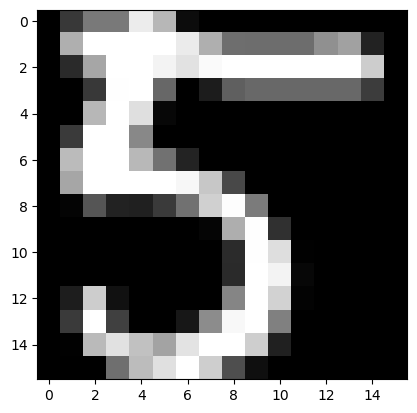

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

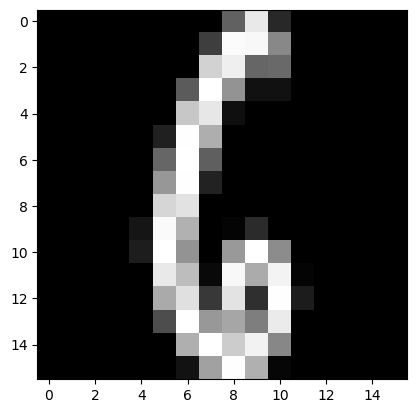

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

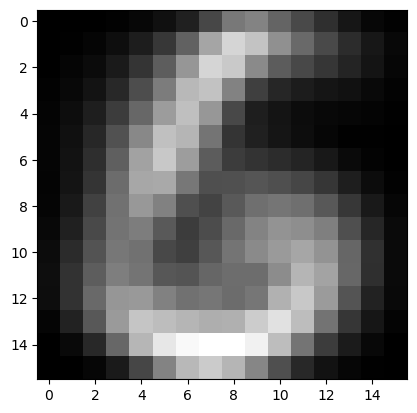

In [7]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

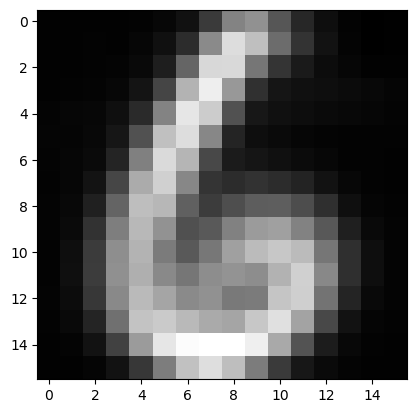

In [8]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


#### 1. Identification of input and output parameters as per the documentation

In [9]:
"""
Following the SK-learn documentation on PCA, we can say that the "Parameters" are considered as
input parameters and the "Attributes" are considered as output parameters.
Therefore, we can say that, the following are considered as input parameters:
- Number of components "n_components"
- Singular Value Decomposition solver "svd_solver"
- Tolerance for singular values computed by svd_solver "tol"
- Number of iterations for the power method computed by svd_solver "iterated_power"
- Additional number of random vectors to sample the range of X to ensure proper conditioning "n_oversamples"
- Power iteration normalizer for randomized SVD solver "power_iteration_normalizer"
- "random_state" for reproducibility of the results when the ‘arpack’ or ‘randomized’ solvers are used


And, the following are considered as output parameters:
- Principal axes in feature space "components_"
- Amount of variance explained by each of the selected components "explained_variance_"
- Percentage of variance explained by each of the selected components "explained_variance_ratio_"
- The singular values corresponding to each of the selected components "singular_values_"
- Per-feature empirical mean, estimated from the training set "mean_"
- The estimated number of components "n_components_"
- The estimated noise covariance following the Probabilistic PCA model "noise_variance_"

"""

'\nFollowing the SK-learn documentation on PCA, we can say that the "Parameters" are considered as\ninput parameters and the "Attributes" are considered as output parameters.\nTherefore, we can say that, the following are considered as input parameters:\n- Number of components "n_components"\n- Singular Value Decomposition solver "svd_solver"\n- Tolerance for singular values computed by svd_solver "tol"\n- Number of iterations for the power method computed by svd_solver "iterated_power"\n- Additional number of random vectors to sample the range of X to ensure proper conditioning "n_oversamples"\n- Power iteration normalizer for randomized SVD solver "power_iteration_normalizer"\n- "random_state" for reproducibility of the results when the ‘arpack’ or ‘randomized’ solvers are used\n\n\nAnd, the following are considered as output parameters:\n- Principal axes in feature space "components_"\n- Amount of variance explained by each of the selected components "explained_variance_"\n- Percent

#### 2. Progressive reconstruction of an image of digit 5

#### Adding the successive contribution of principal components

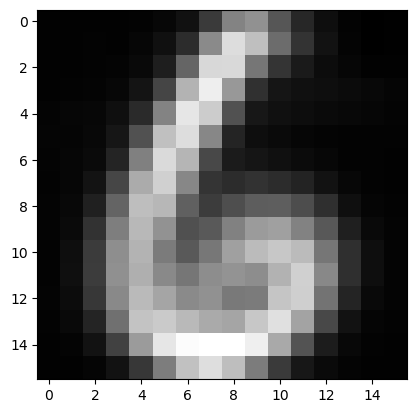

The reconstruction of digit 5 adding  1  principal components


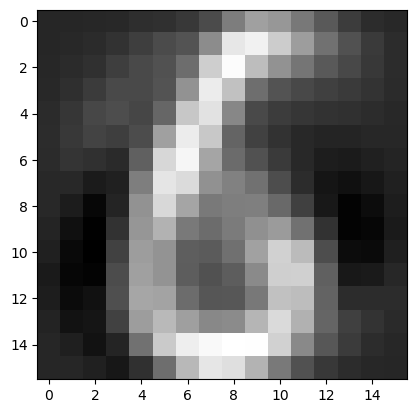

The reconstruction of digit 5 adding  2  principal components


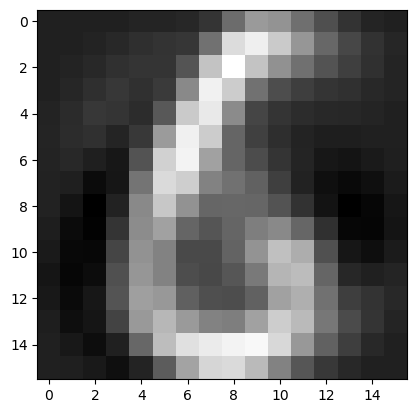

The reconstruction of digit 5 adding  3  principal components


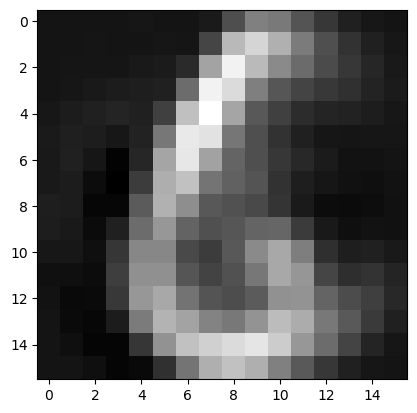

The reconstruction of digit 5 adding  4  principal components


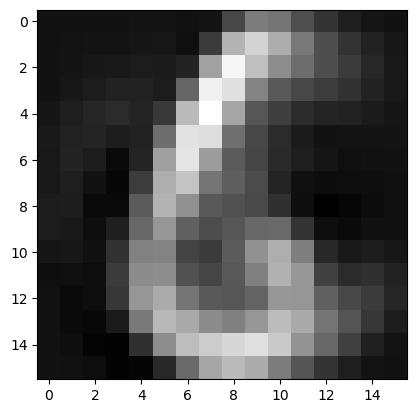

The reconstruction of digit 5 adding  5  principal components


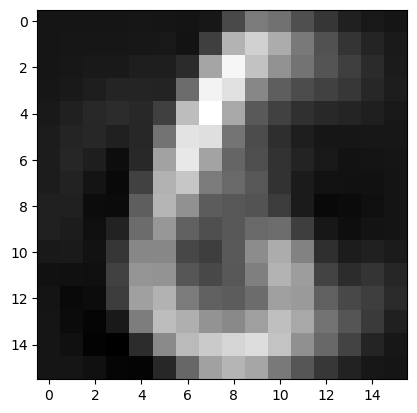

The reconstruction of digit 5 adding  6  principal components


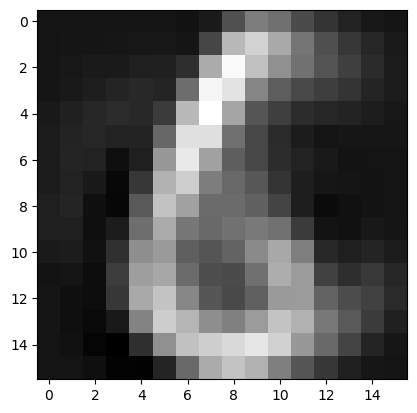

The reconstruction of digit 5 adding  7  principal components


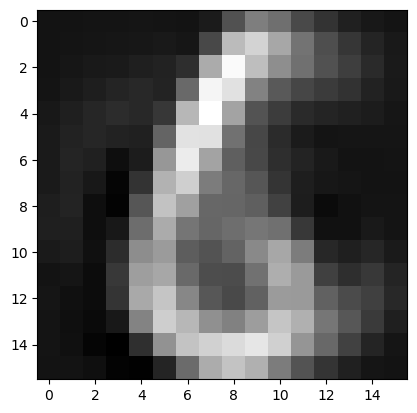

The reconstruction of digit 5 adding  8  principal components


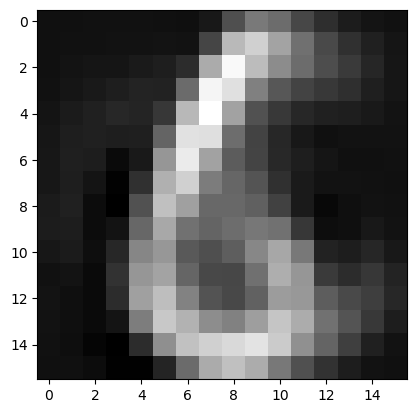

The reconstruction of digit 5 adding  9  principal components


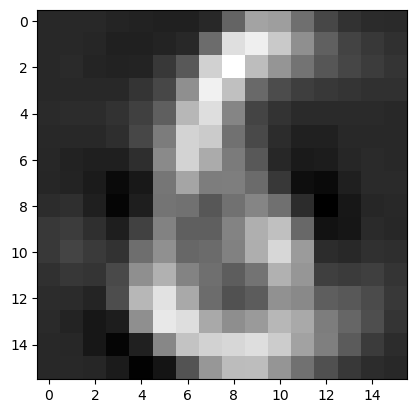

The reconstruction of digit 5 adding  10  principal components


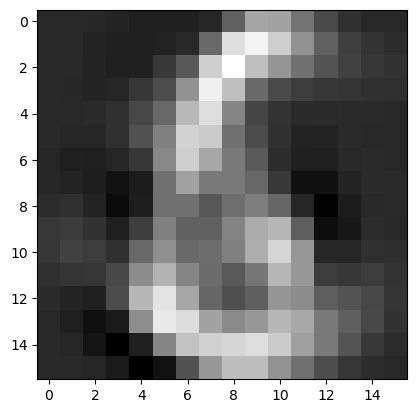

The reconstruction of digit 5 adding  11  principal components


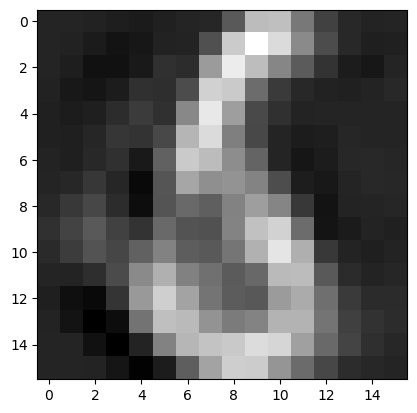

The reconstruction of digit 5 adding  12  principal components


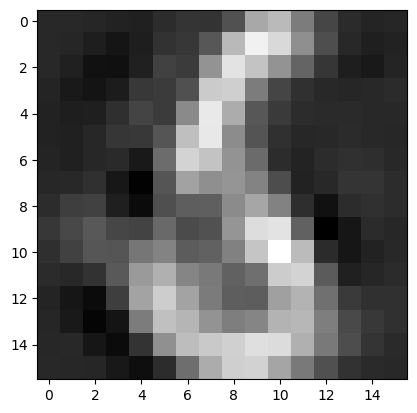

The reconstruction of digit 5 adding  13  principal components


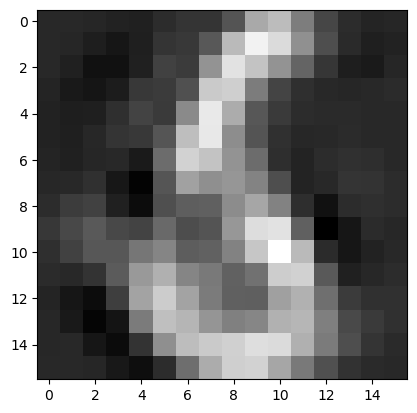

The reconstruction of digit 5 adding  14  principal components


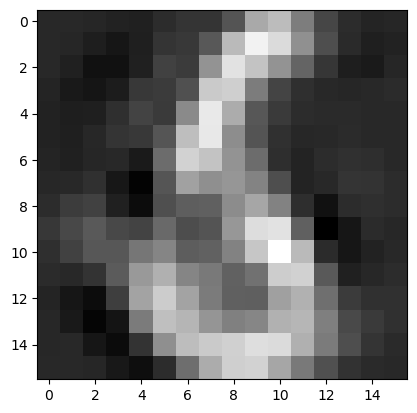

The reconstruction of digit 5 adding  15  principal components


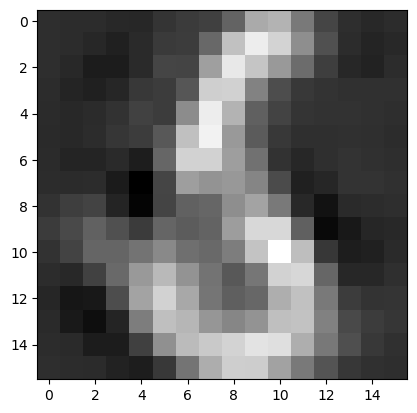

The reconstruction of digit 5 adding  16  principal components


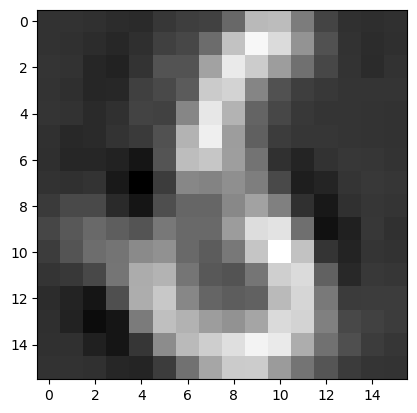

The reconstruction of digit 5 adding  17  principal components


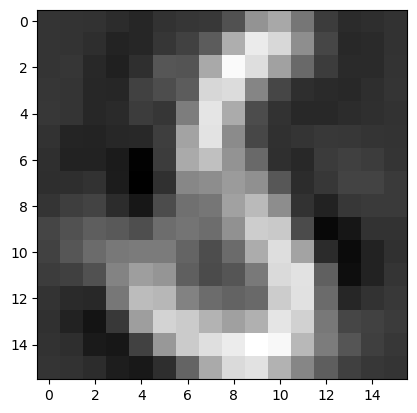

The reconstruction of digit 5 adding  18  principal components


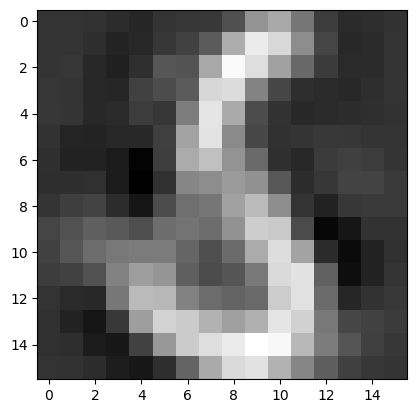

The reconstruction of digit 5 adding  19  principal components


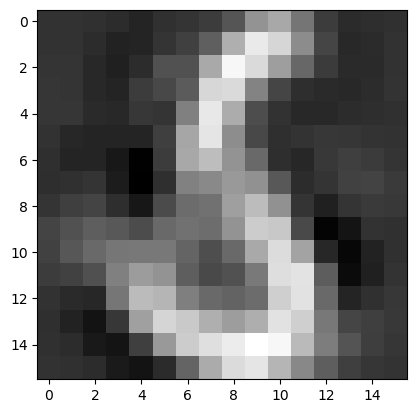

The reconstruction of digit 5 adding  20  principal components


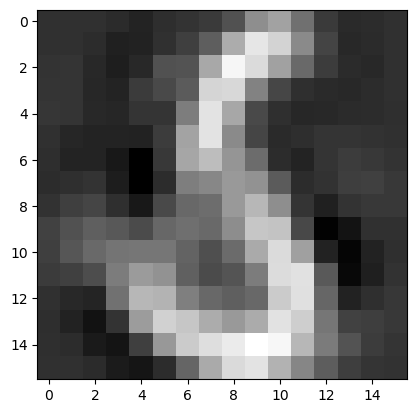

The reconstruction of digit 5 adding  21  principal components


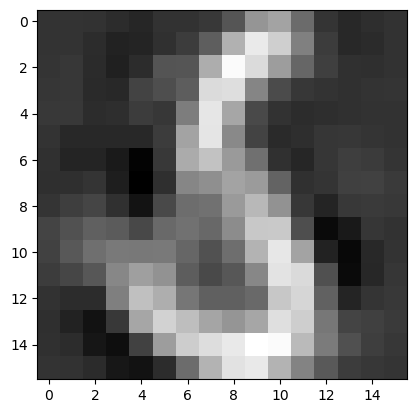

The reconstruction of digit 5 adding  22  principal components


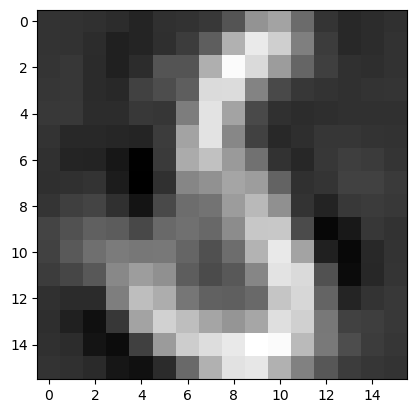

The reconstruction of digit 5 adding  23  principal components


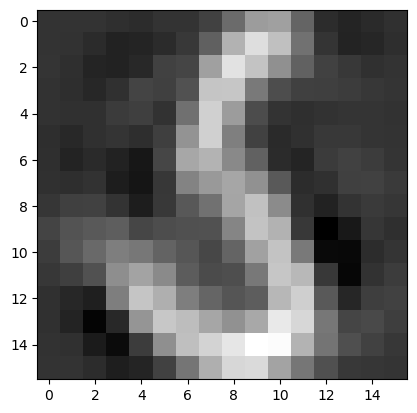

The reconstruction of digit 5 adding  24  principal components


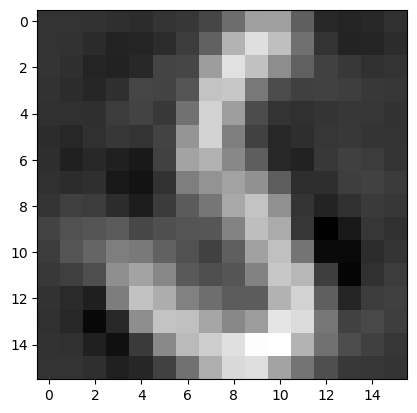

The reconstruction of digit 5 adding  25  principal components


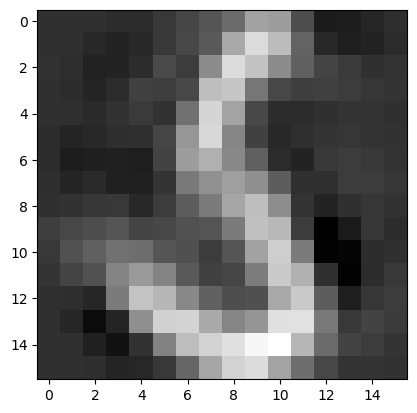

The reconstruction of digit 5 adding  26  principal components


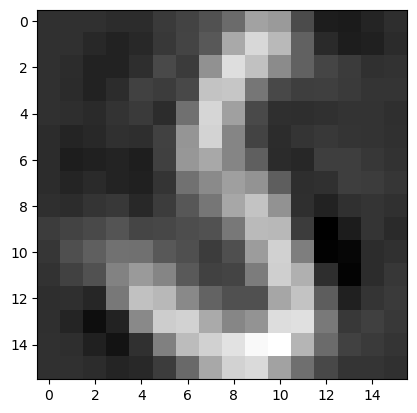

The reconstruction of digit 5 adding  27  principal components


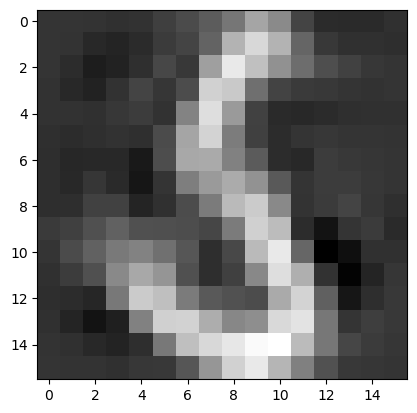

The reconstruction of digit 5 adding  28  principal components


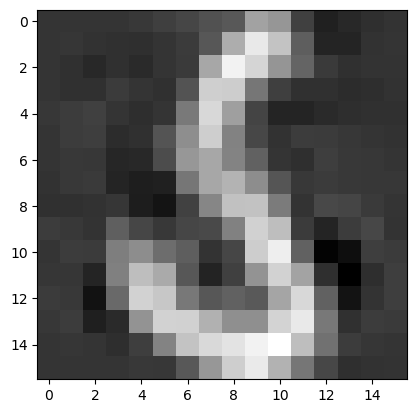

The reconstruction of digit 5 adding  29  principal components


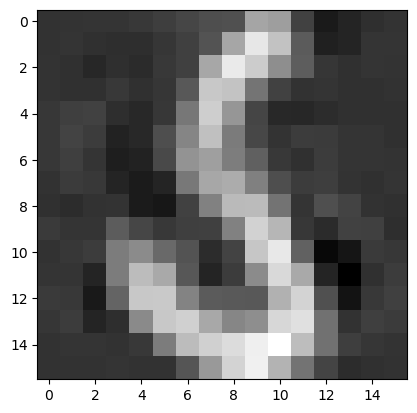

The reconstruction of digit 5 adding  30  principal components


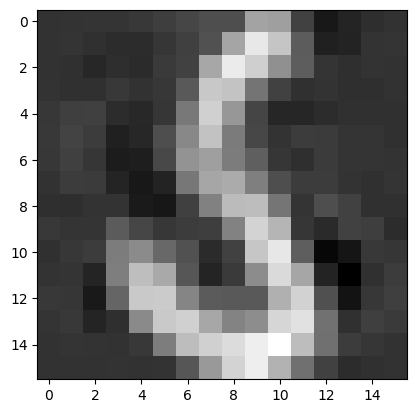

The reconstruction of digit 5 adding  31  principal components


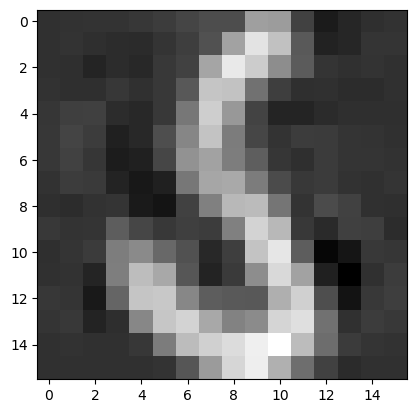

The reconstruction of digit 5 adding  32  principal components


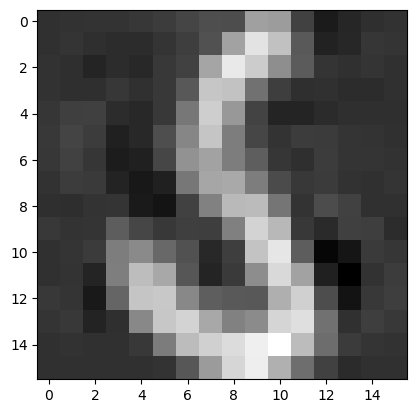

The reconstruction of digit 5 adding  33  principal components


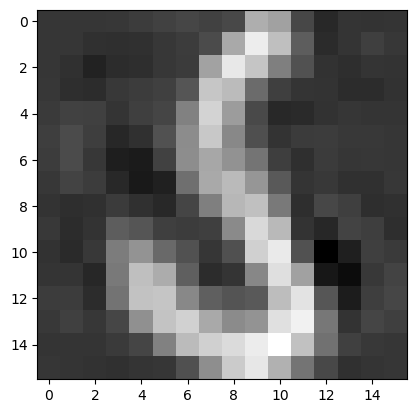

The reconstruction of digit 5 adding  34  principal components


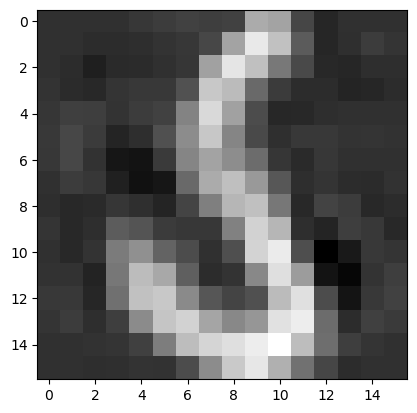

The reconstruction of digit 5 adding  35  principal components


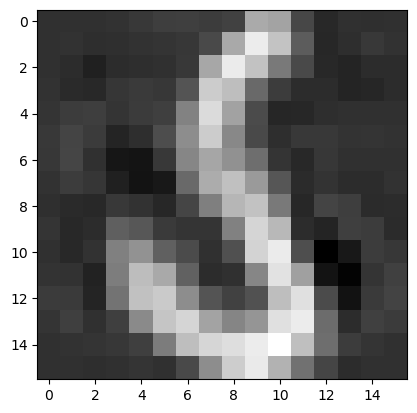

The reconstruction of digit 5 adding  36  principal components


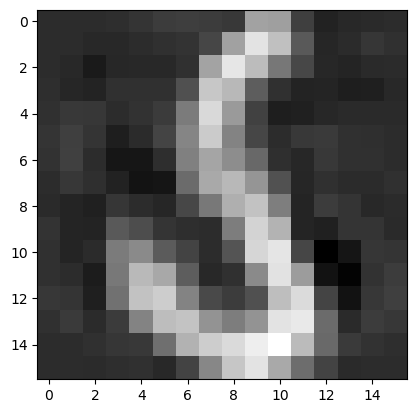

The reconstruction of digit 5 adding  37  principal components


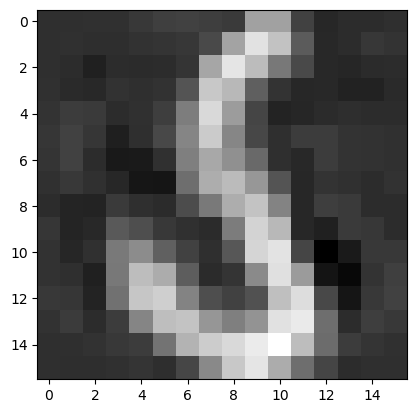

The reconstruction of digit 5 adding  38  principal components


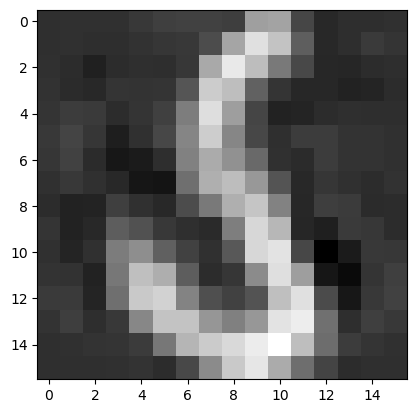

The reconstruction of digit 5 adding  39  principal components


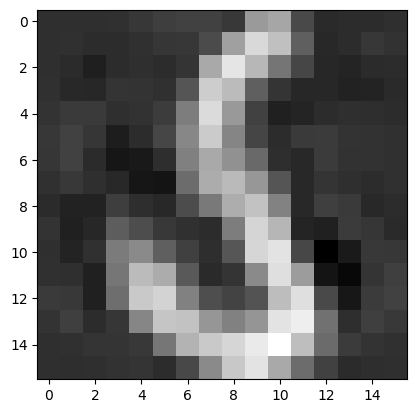

The reconstruction of digit 5 adding  40  principal components


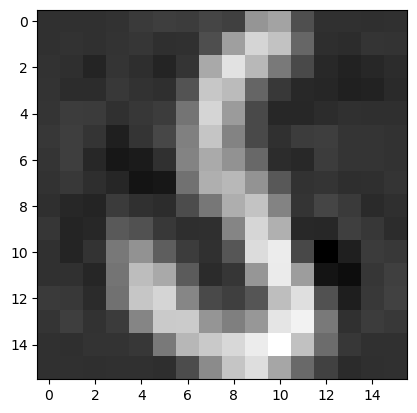

The reconstruction of digit 5 adding  41  principal components


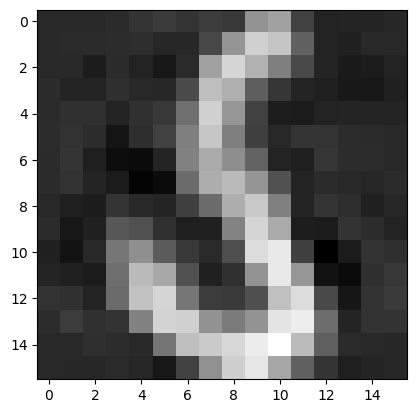

The reconstruction of digit 5 adding  42  principal components


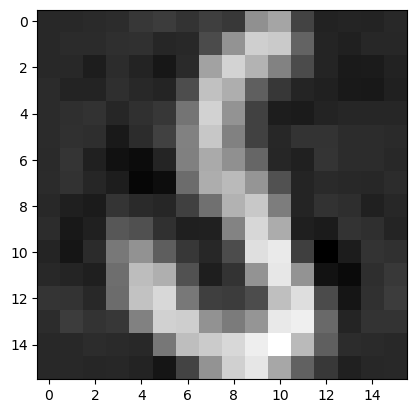

The reconstruction of digit 5 adding  43  principal components


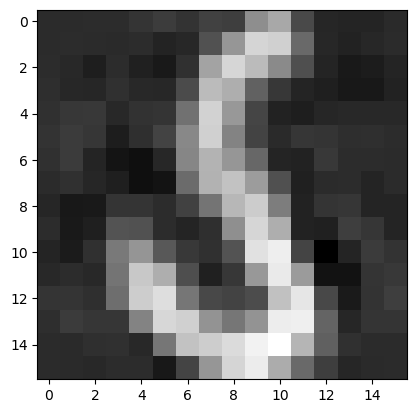

The reconstruction of digit 5 adding  44  principal components


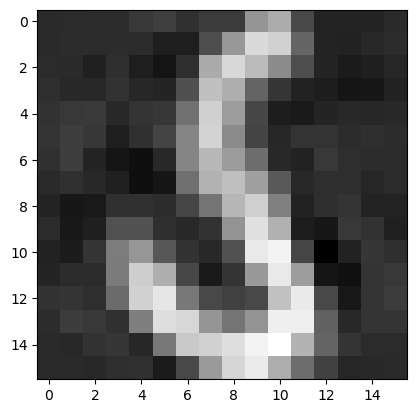

The reconstruction of digit 5 adding  45  principal components


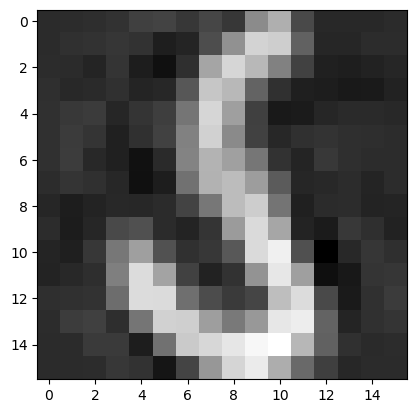

The reconstruction of digit 5 adding  46  principal components


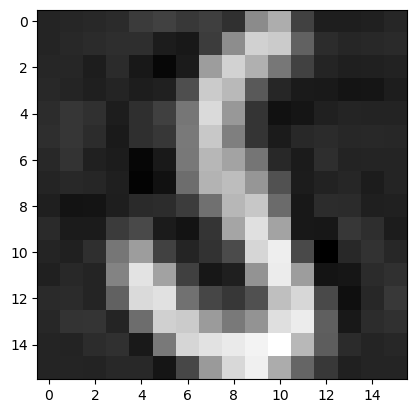

The reconstruction of digit 5 adding  47  principal components


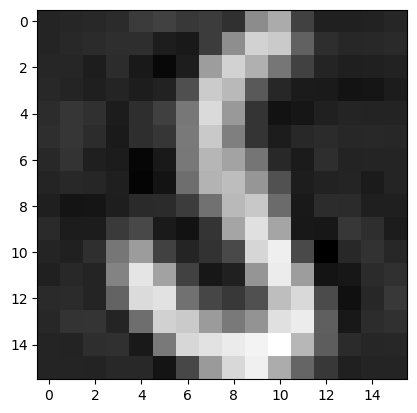

The reconstruction of digit 5 adding  48  principal components


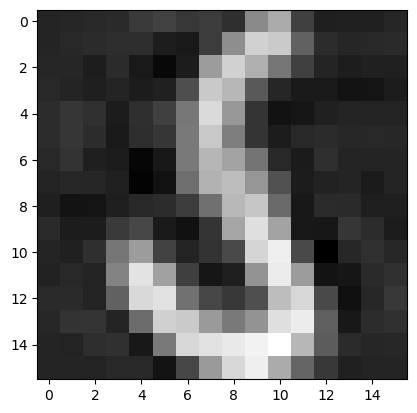

The reconstruction of digit 5 adding  49  principal components


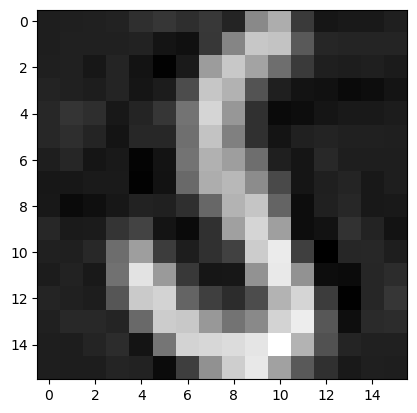

The reconstruction of digit 5 adding  50  principal components


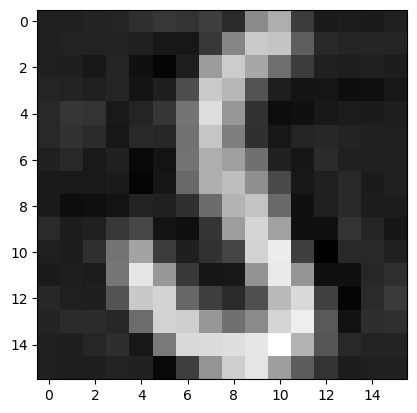

The reconstruction of digit 5 adding  51  principal components


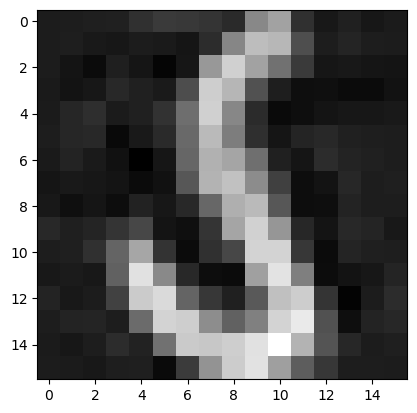

The reconstruction of digit 5 adding  52  principal components


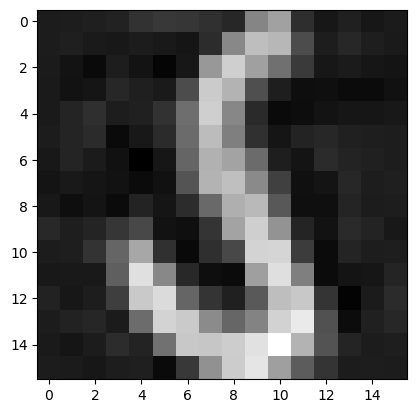

The reconstruction of digit 5 adding  53  principal components


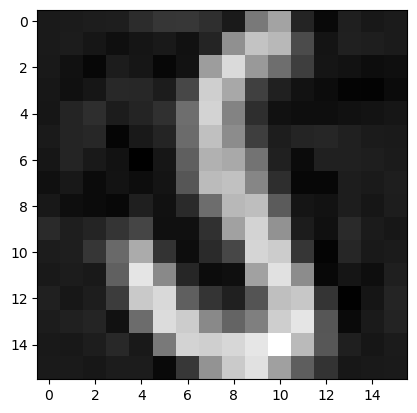

The reconstruction of digit 5 adding  54  principal components


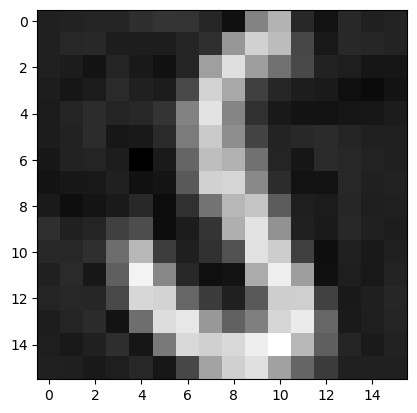

The reconstruction of digit 5 adding  55  principal components


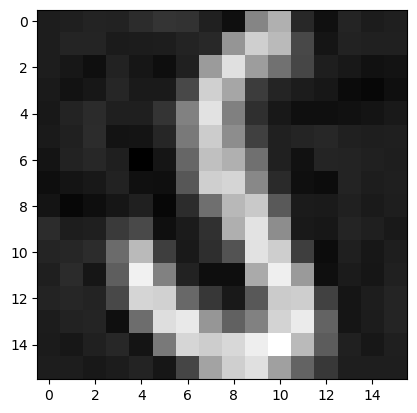

The reconstruction of digit 5 adding  56  principal components


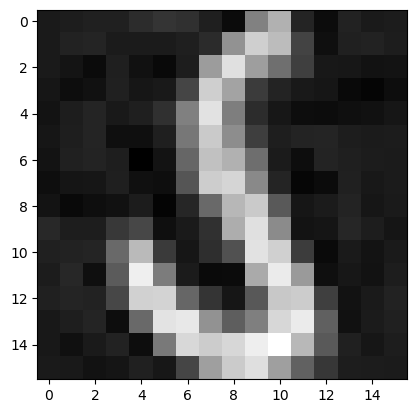

The reconstruction of digit 5 adding  57  principal components


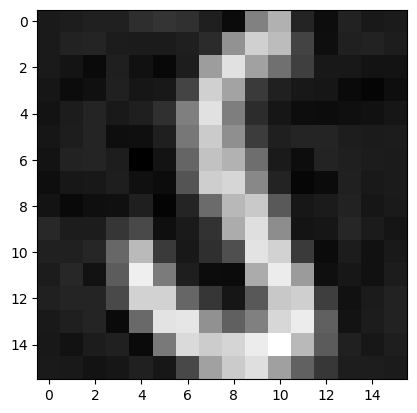

The reconstruction of digit 5 adding  58  principal components


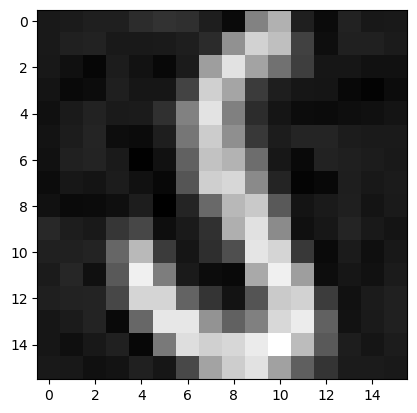

The reconstruction of digit 5 adding  59  principal components


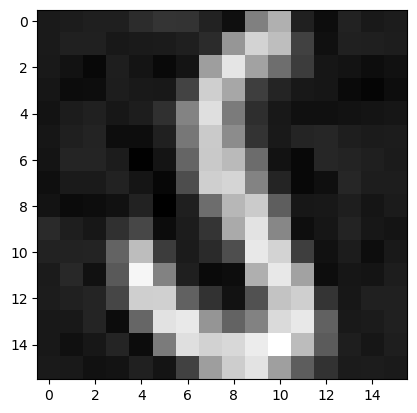

The reconstruction of digit 5 adding  60  principal components


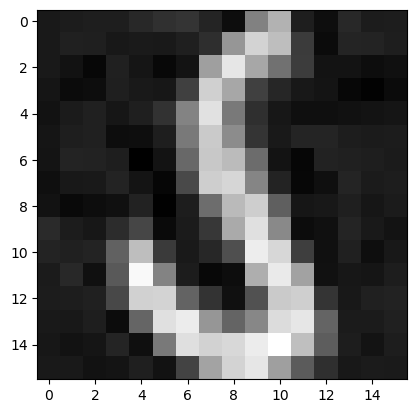

The reconstruction of digit 5 adding  61  principal components


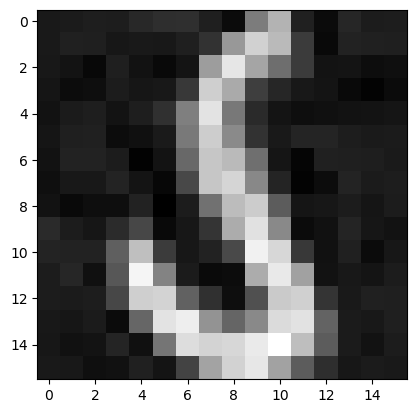

The reconstruction of digit 5 adding  62  principal components


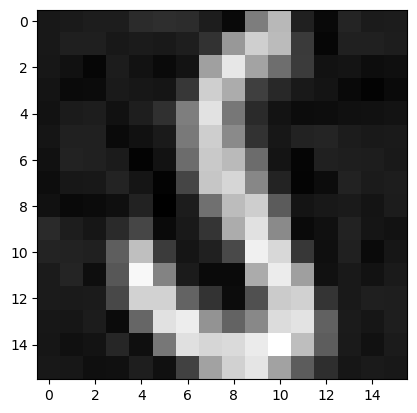

The reconstruction of digit 5 adding  63  principal components


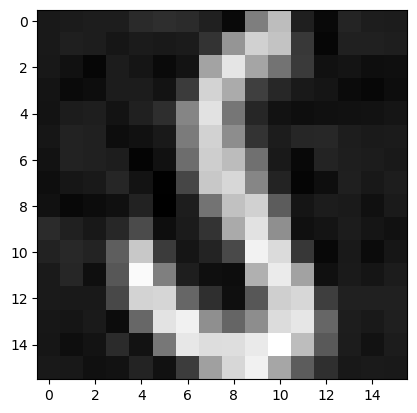

The reconstruction of digit 5 adding  64  principal components


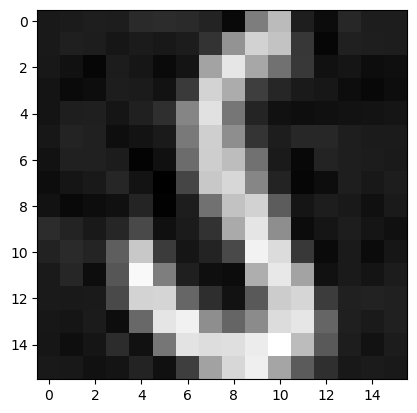

The reconstruction of digit 5 adding  65  principal components


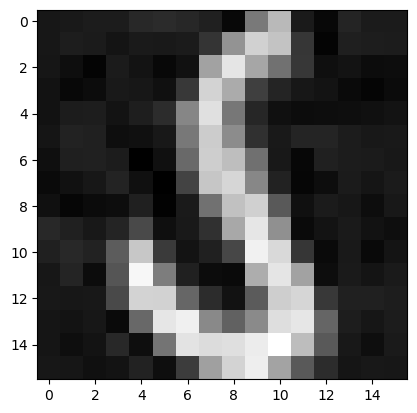

The reconstruction of digit 5 adding  66  principal components


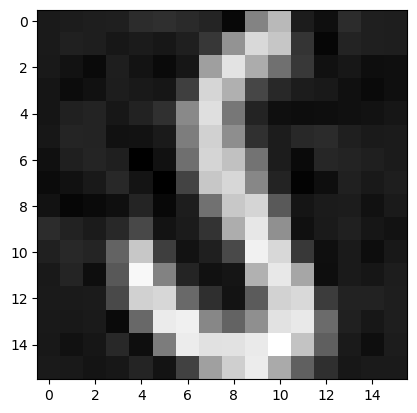

The reconstruction of digit 5 adding  67  principal components


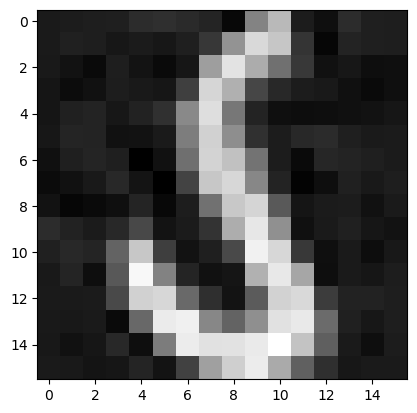

The reconstruction of digit 5 adding  68  principal components


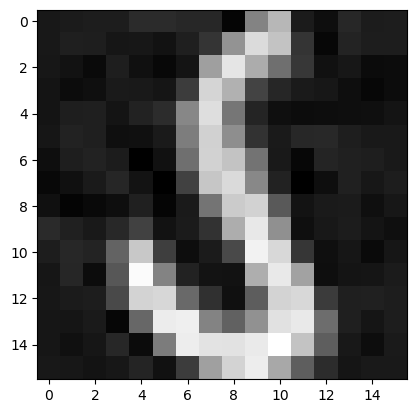

The reconstruction of digit 5 adding  69  principal components


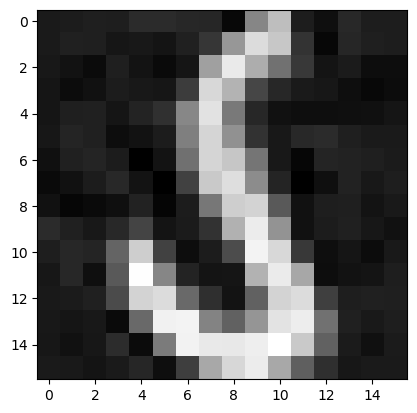

The reconstruction of digit 5 adding  70  principal components


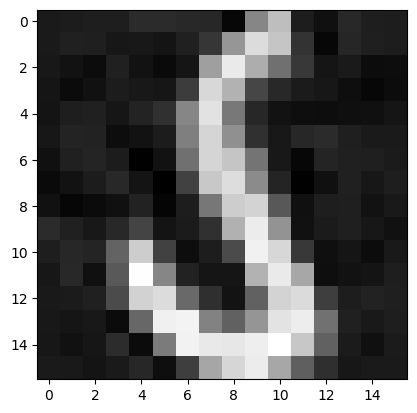

The reconstruction of digit 5 adding  71  principal components


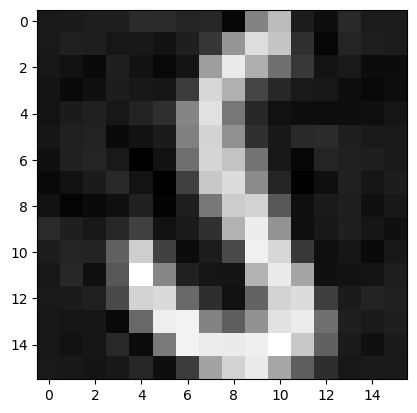

The reconstruction of digit 5 adding  72  principal components


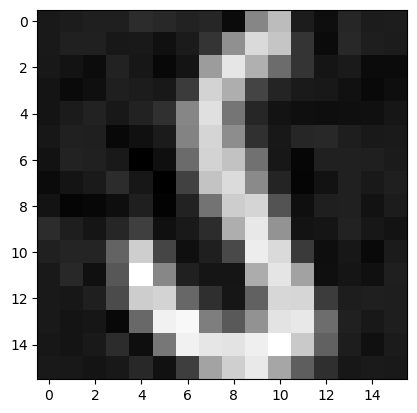

The reconstruction of digit 5 adding  73  principal components


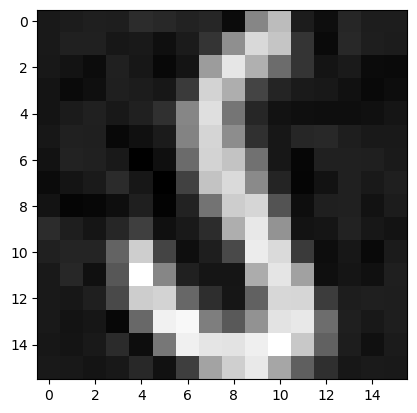

The reconstruction of digit 5 adding  74  principal components


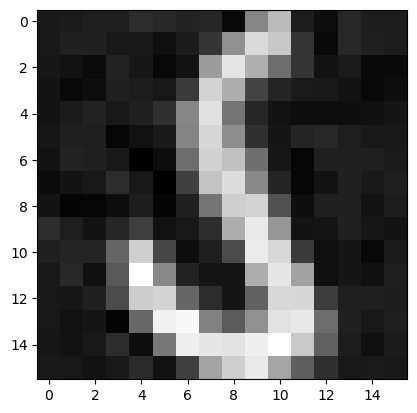

The reconstruction of digit 5 adding  75  principal components


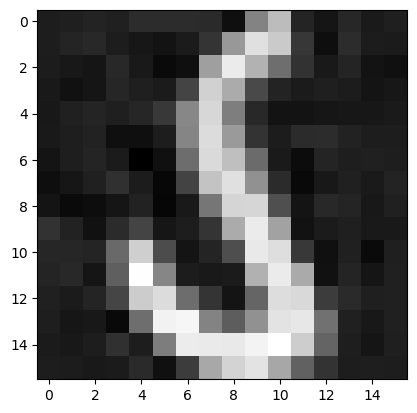

The reconstruction of digit 5 adding  76  principal components


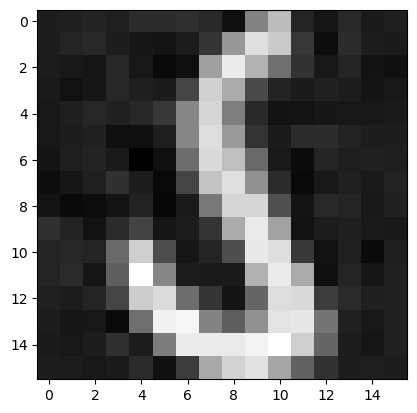

The reconstruction of digit 5 adding  77  principal components


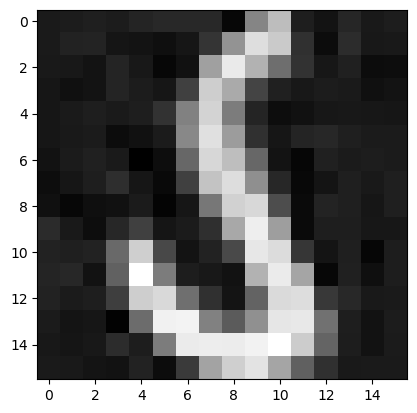

The reconstruction of digit 5 adding  78  principal components


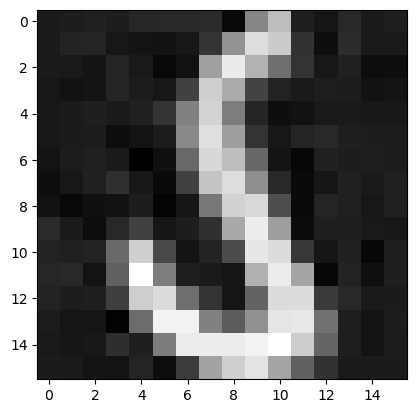

The reconstruction of digit 5 adding  79  principal components


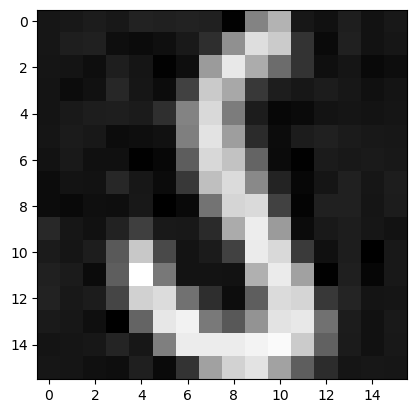

The reconstruction of digit 5 adding  80  principal components


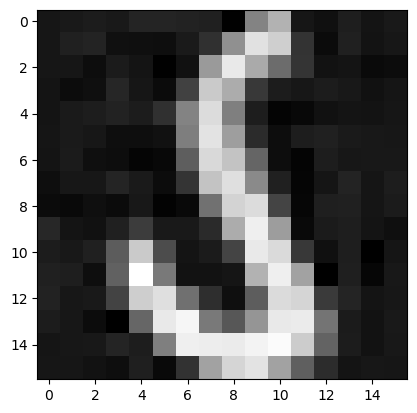

The reconstruction of digit 5 adding  81  principal components


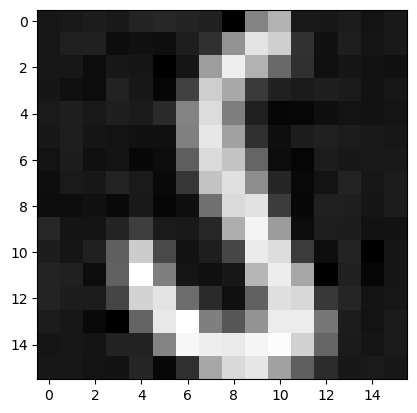

The reconstruction of digit 5 adding  82  principal components


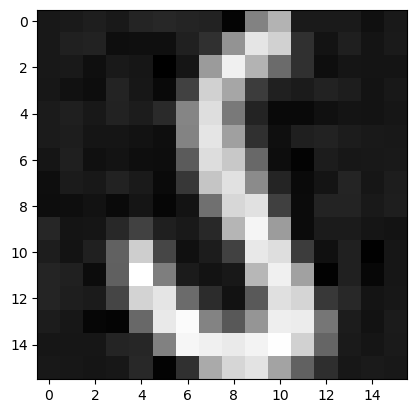

The reconstruction of digit 5 adding  83  principal components


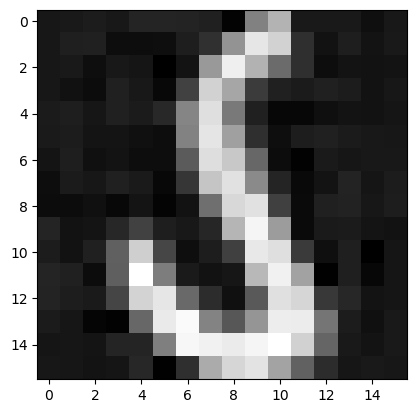

The reconstruction of digit 5 adding  84  principal components


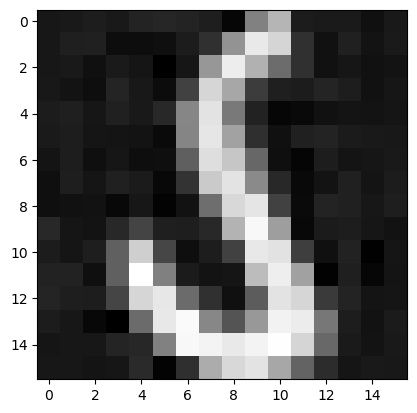

The reconstruction of digit 5 adding  85  principal components


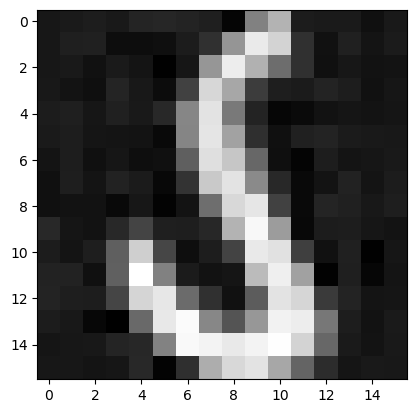

The reconstruction of digit 5 adding  86  principal components


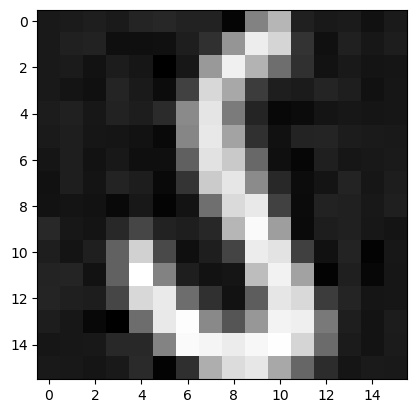

The reconstruction of digit 5 adding  87  principal components


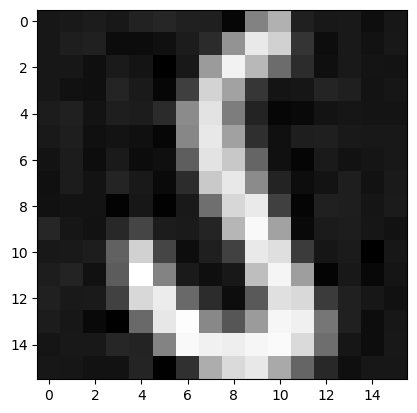

The reconstruction of digit 5 adding  88  principal components


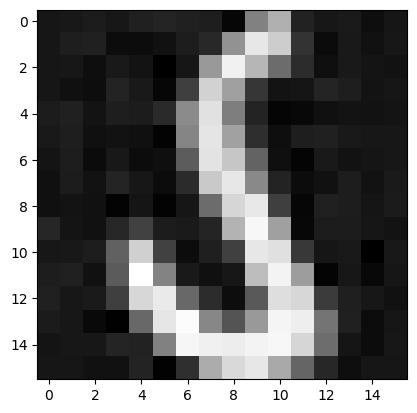

The reconstruction of digit 5 adding  89  principal components


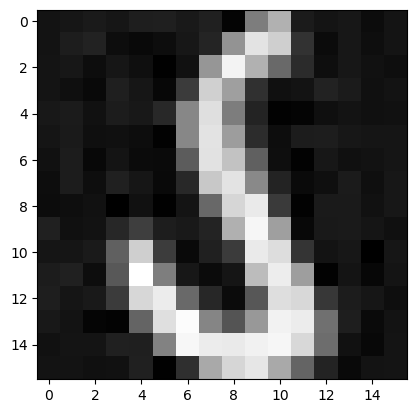

The reconstruction of digit 5 adding  90  principal components


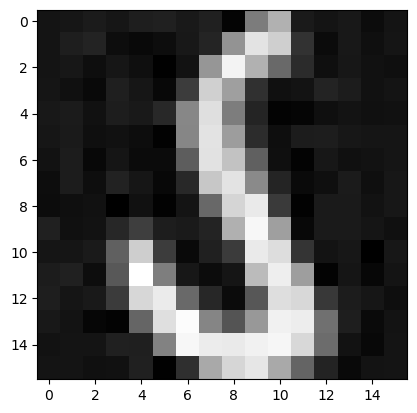

The reconstruction of digit 5 adding  91  principal components


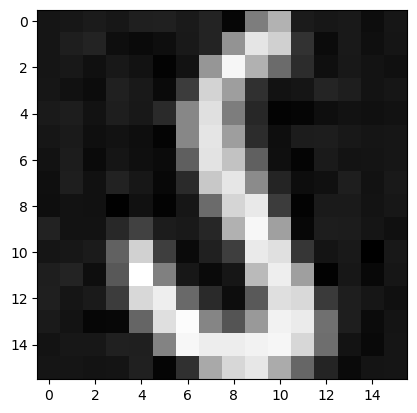

The reconstruction of digit 5 adding  92  principal components


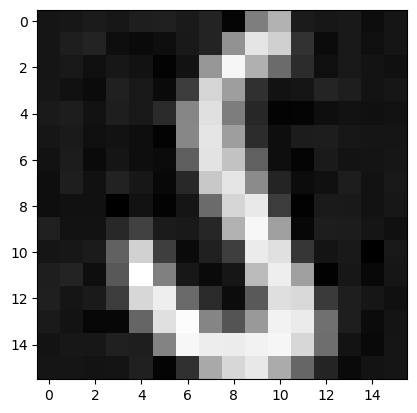

The reconstruction of digit 5 adding  93  principal components


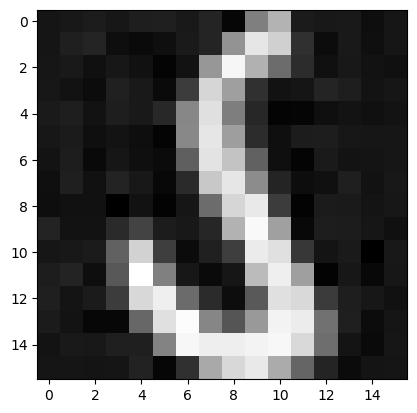

The reconstruction of digit 5 adding  94  principal components


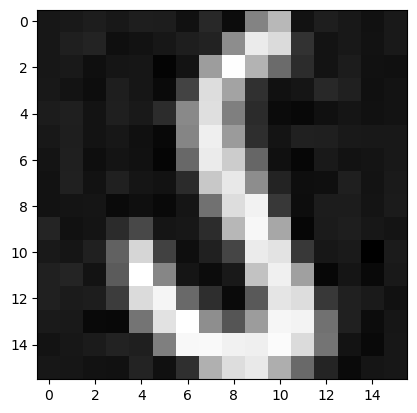

The reconstruction of digit 5 adding  95  principal components


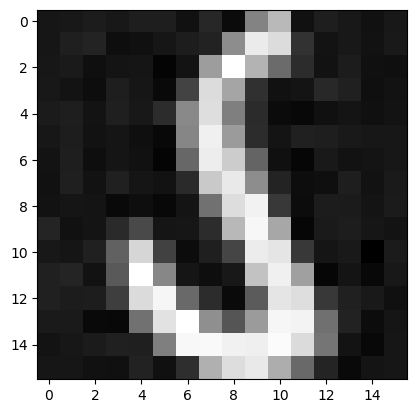

The reconstruction of digit 5 adding  96  principal components


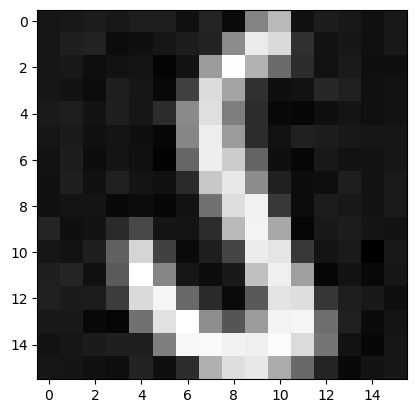

The reconstruction of digit 5 adding  97  principal components


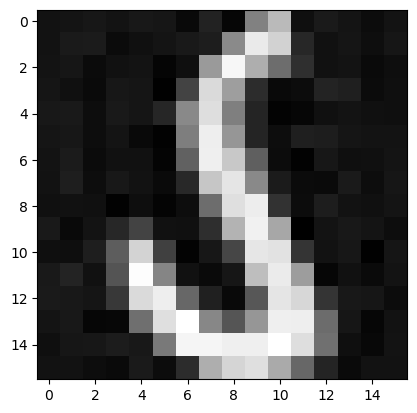

The reconstruction of digit 5 adding  98  principal components


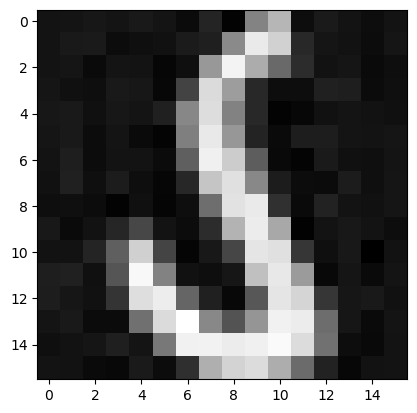

The reconstruction of digit 5 adding  99  principal components


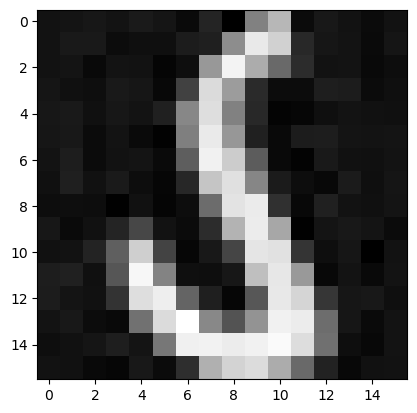

The reconstruction of digit 5 adding  100  principal components


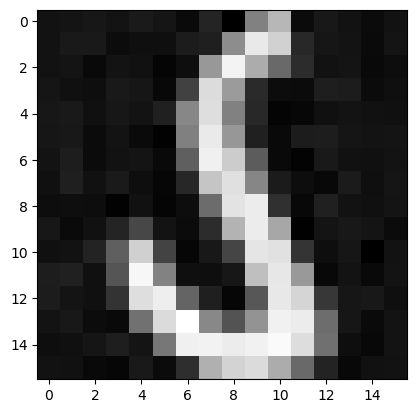

The reconstruction of digit 5 adding  101  principal components


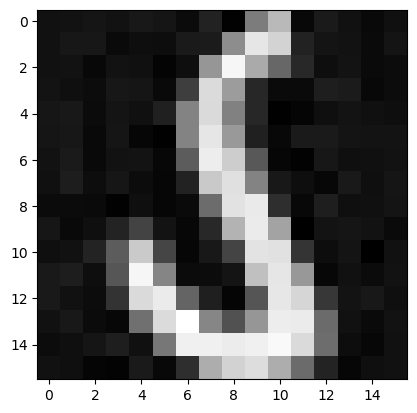

The reconstruction of digit 5 adding  102  principal components


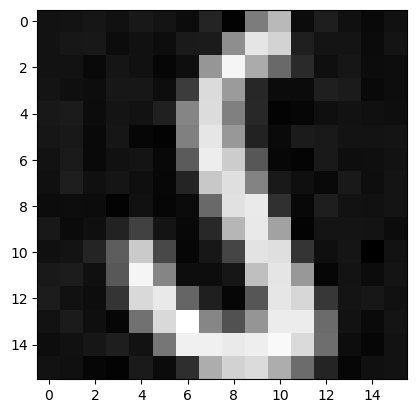

The reconstruction of digit 5 adding  103  principal components


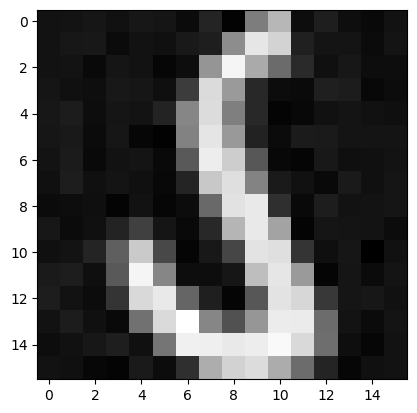

The reconstruction of digit 5 adding  104  principal components


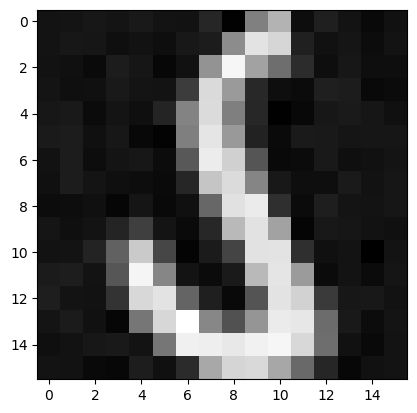

The reconstruction of digit 5 adding  105  principal components


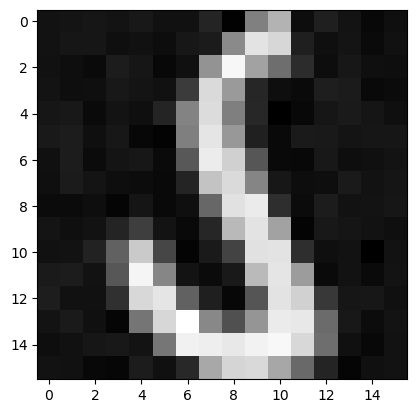

The reconstruction of digit 5 adding  106  principal components


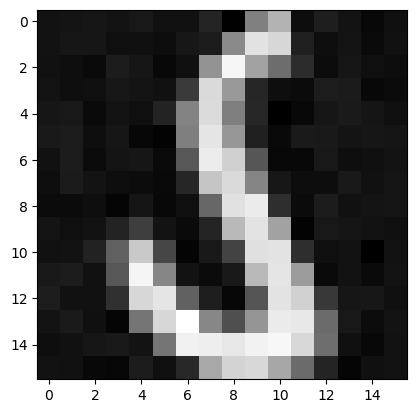

The reconstruction of digit 5 adding  107  principal components


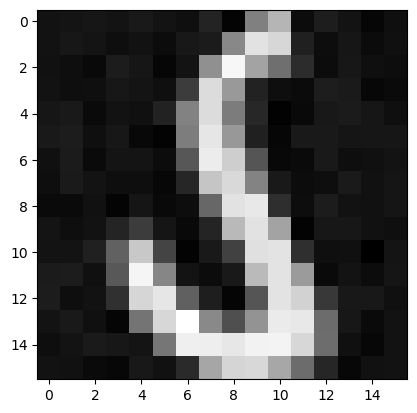

The reconstruction of digit 5 adding  108  principal components


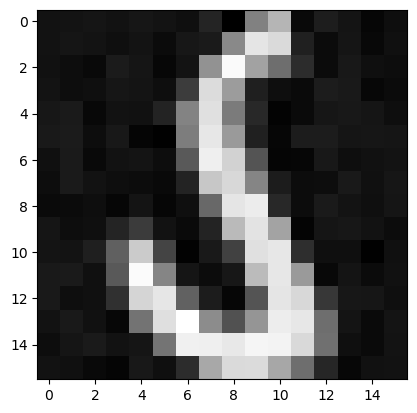

The reconstruction of digit 5 adding  109  principal components


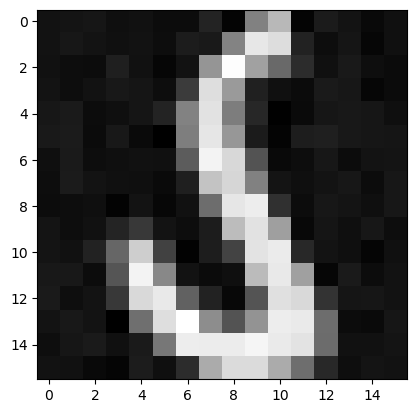

The reconstruction of digit 5 adding  110  principal components


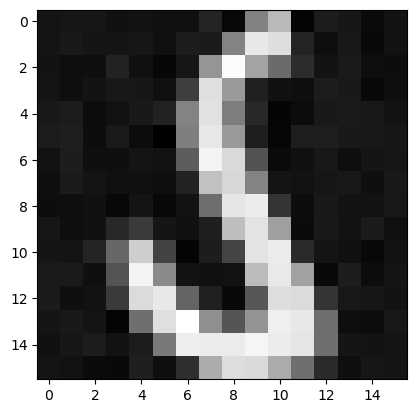

The reconstruction of digit 5 adding  111  principal components


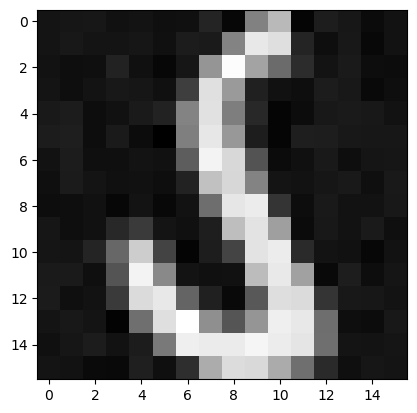

The reconstruction of digit 5 adding  112  principal components


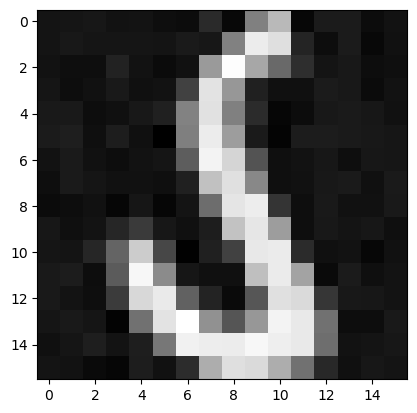

The reconstruction of digit 5 adding  113  principal components


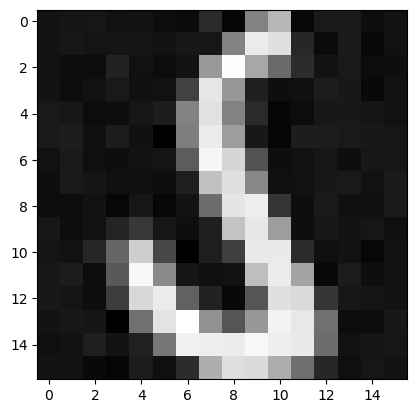

The reconstruction of digit 5 adding  114  principal components


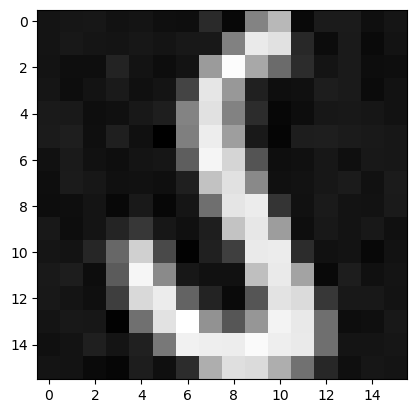

The reconstruction of digit 5 adding  115  principal components


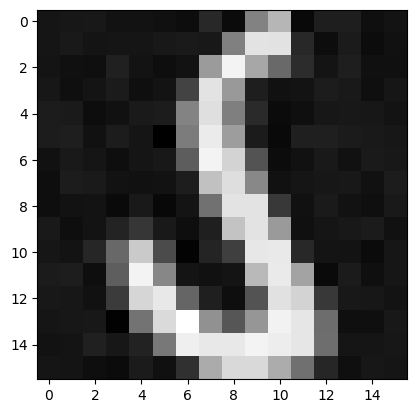

The reconstruction of digit 5 adding  116  principal components


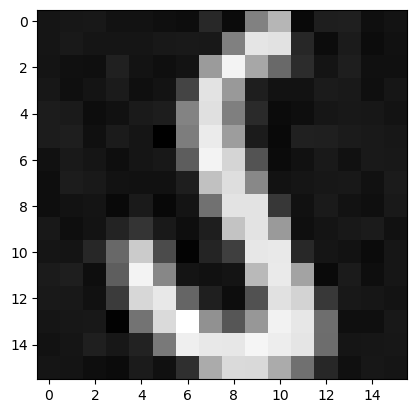

The reconstruction of digit 5 adding  117  principal components


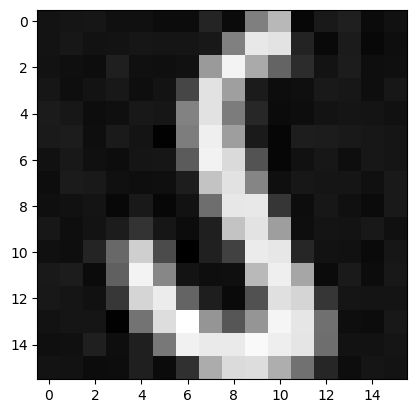

The reconstruction of digit 5 adding  118  principal components


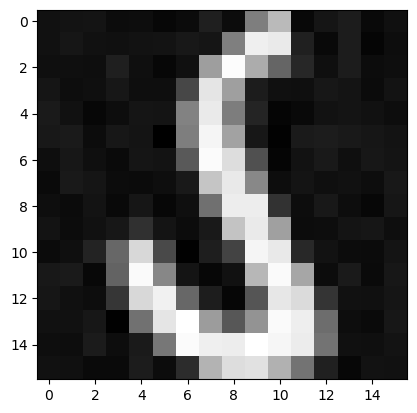

The reconstruction of digit 5 adding  119  principal components


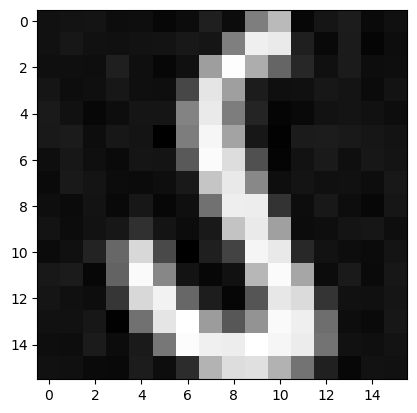

The reconstruction of digit 5 adding  120  principal components


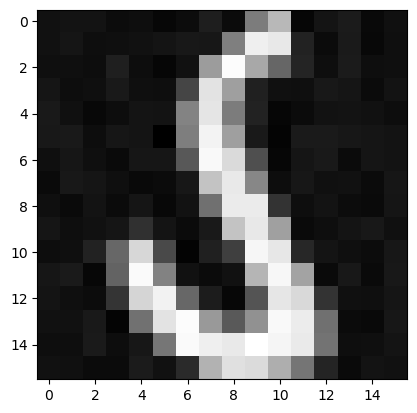

The reconstruction of digit 5 adding  121  principal components


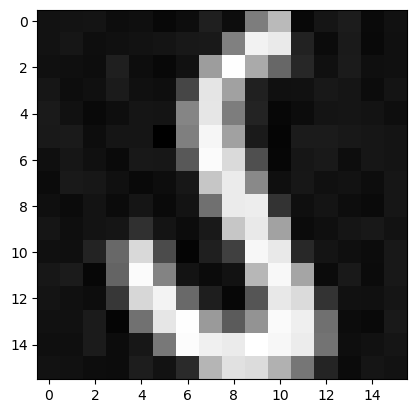

The reconstruction of digit 5 adding  122  principal components


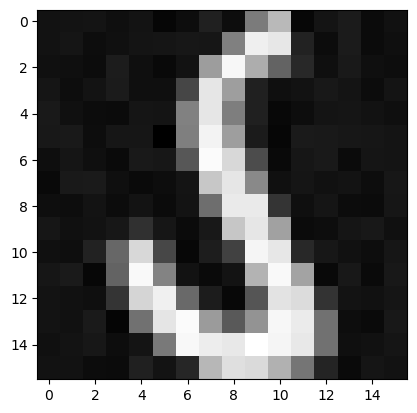

The reconstruction of digit 5 adding  123  principal components


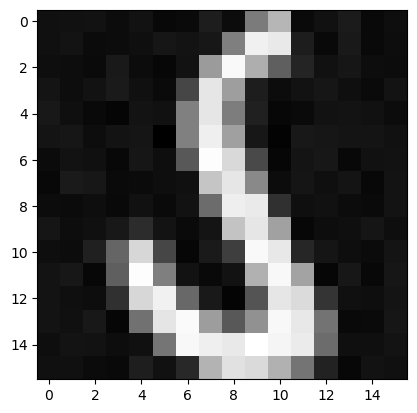

The reconstruction of digit 5 adding  124  principal components


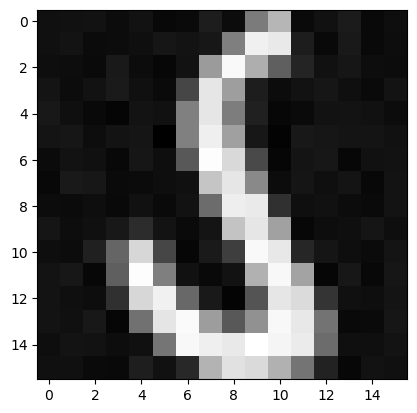

The reconstruction of digit 5 adding  125  principal components


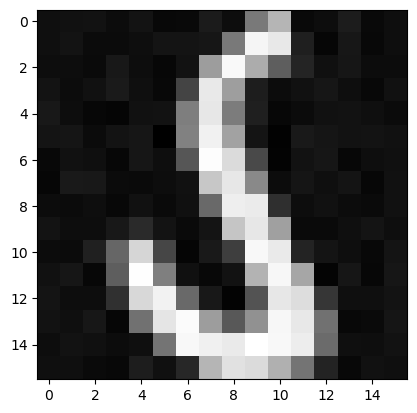

The reconstruction of digit 5 adding  126  principal components


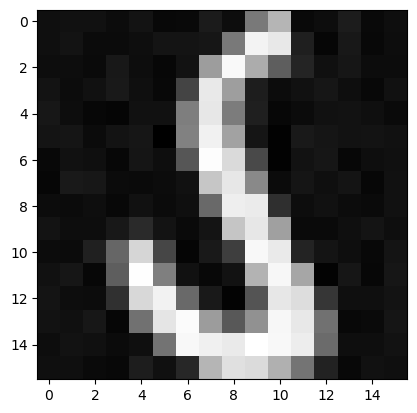

The reconstruction of digit 5 adding  127  principal components


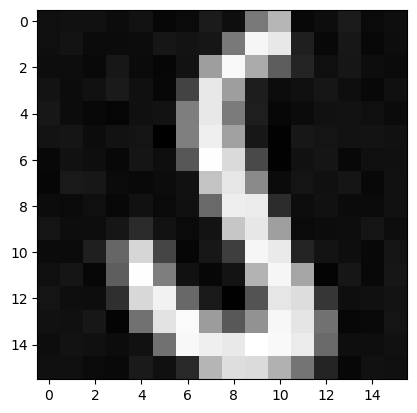

The reconstruction of digit 5 adding  128  principal components


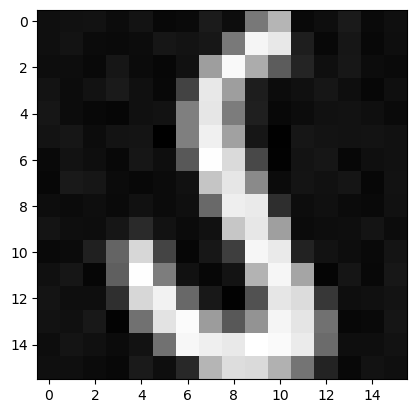

The reconstruction of digit 5 adding  129  principal components


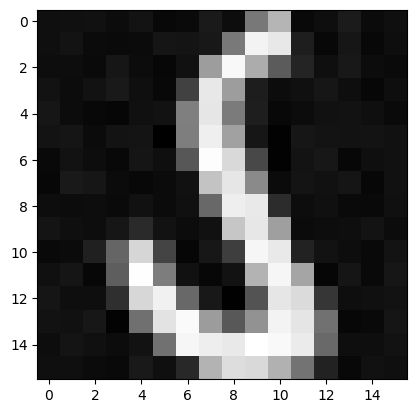

The reconstruction of digit 5 adding  130  principal components


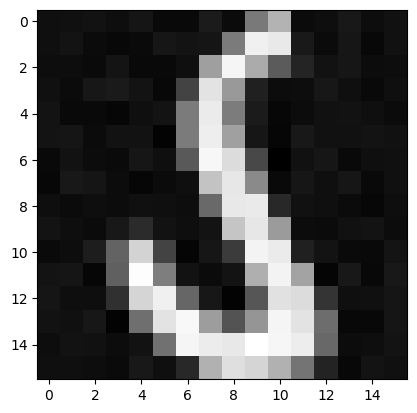

The reconstruction of digit 5 adding  131  principal components


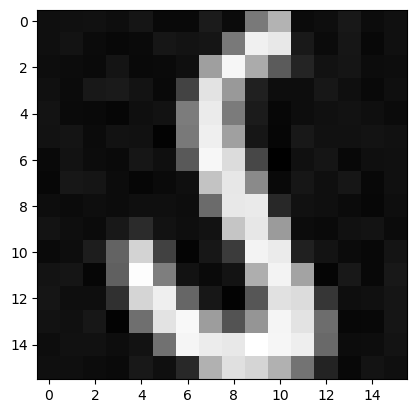

The reconstruction of digit 5 adding  132  principal components


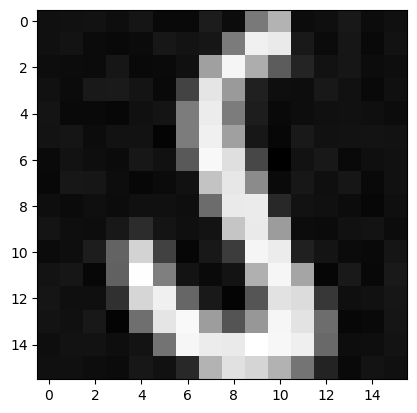

The reconstruction of digit 5 adding  133  principal components


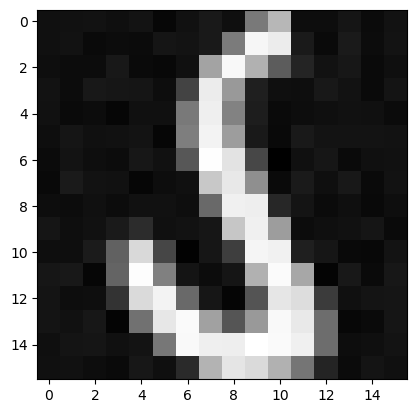

The reconstruction of digit 5 adding  134  principal components


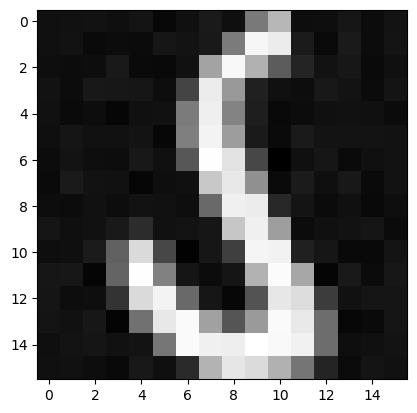

The reconstruction of digit 5 adding  135  principal components


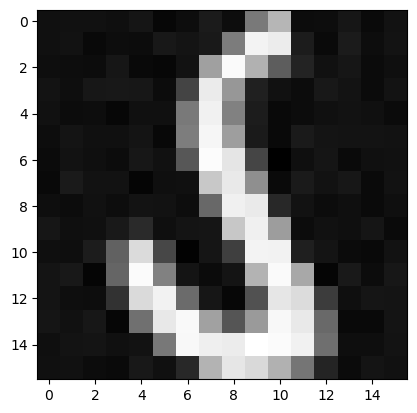

The reconstruction of digit 5 adding  136  principal components


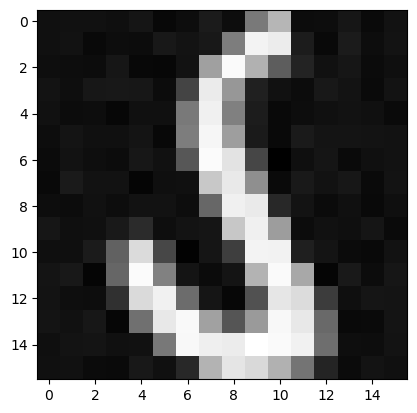

The reconstruction of digit 5 adding  137  principal components


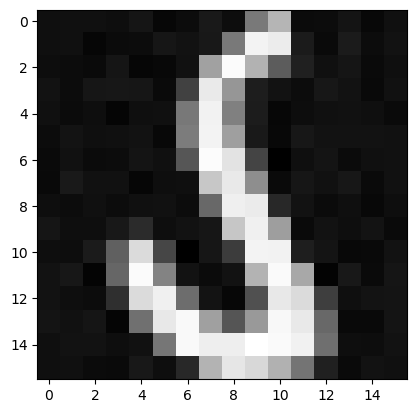

The reconstruction of digit 5 adding  138  principal components


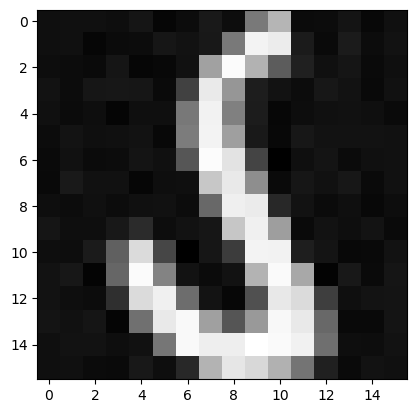

The reconstruction of digit 5 adding  139  principal components


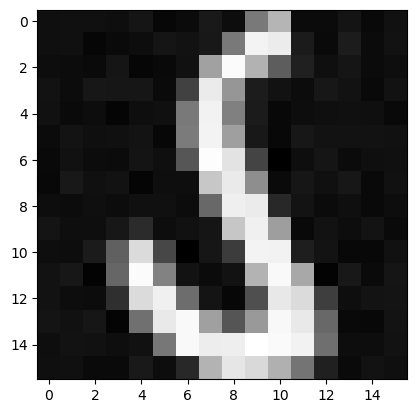

The reconstruction of digit 5 adding  140  principal components


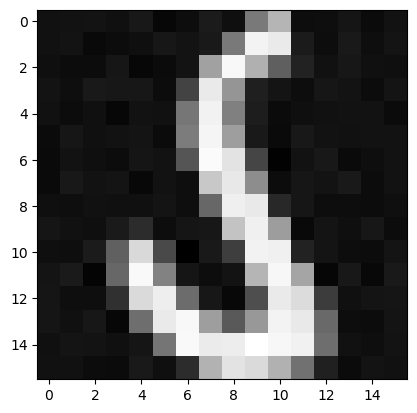

The reconstruction of digit 5 adding  141  principal components


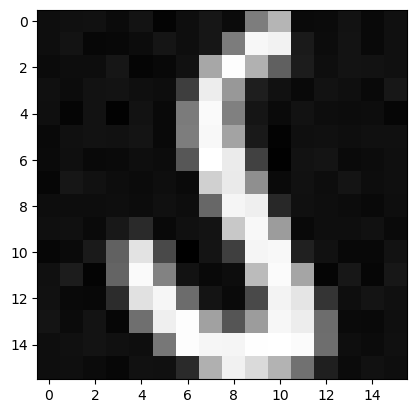

The reconstruction of digit 5 adding  142  principal components


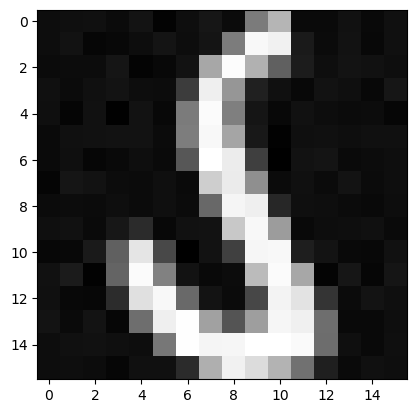

The reconstruction of digit 5 adding  143  principal components


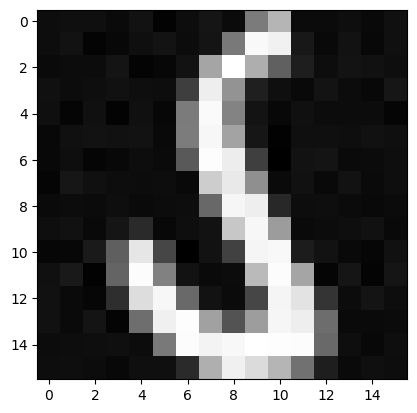

The reconstruction of digit 5 adding  144  principal components


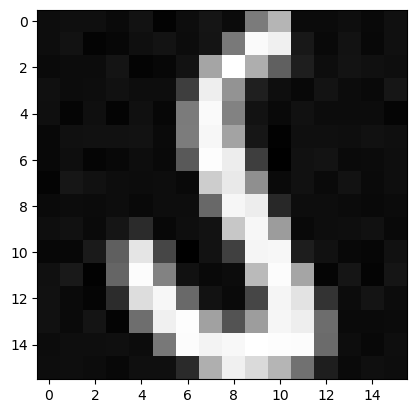

The reconstruction of digit 5 adding  145  principal components


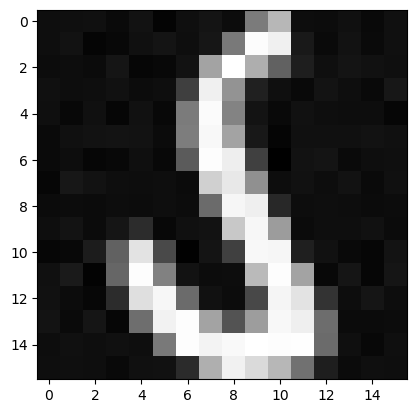

The reconstruction of digit 5 adding  146  principal components


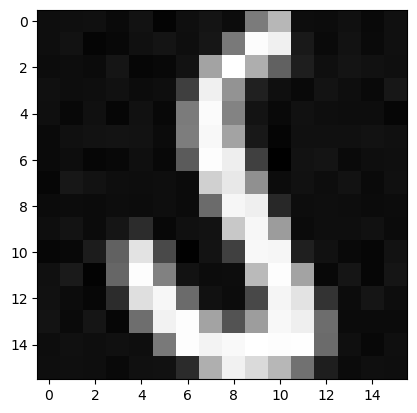

The reconstruction of digit 5 adding  147  principal components


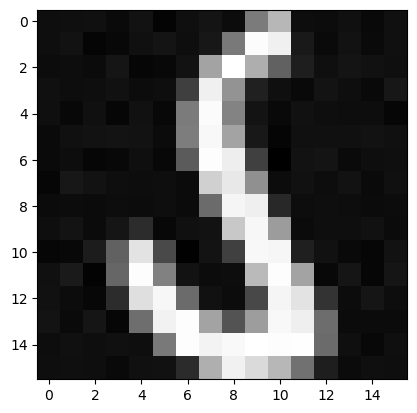

The reconstruction of digit 5 adding  148  principal components


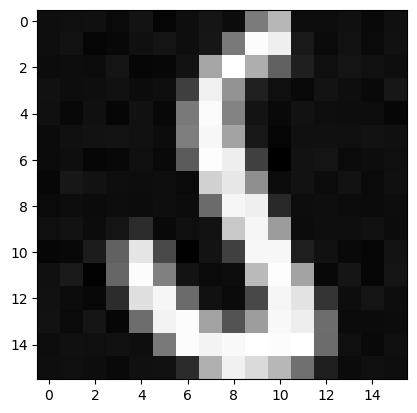

The reconstruction of digit 5 adding  149  principal components


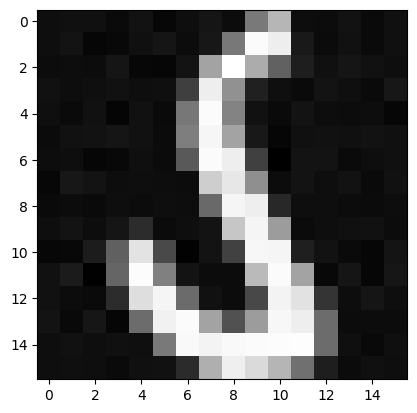

The reconstruction of digit 5 adding  150  principal components


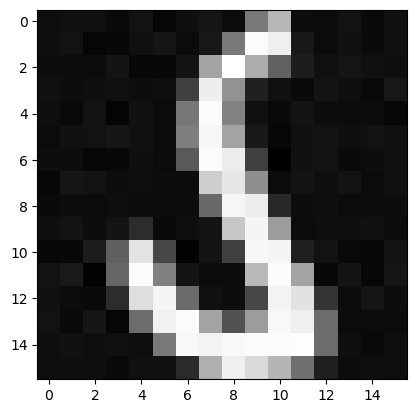

The reconstruction of digit 5 adding  151  principal components


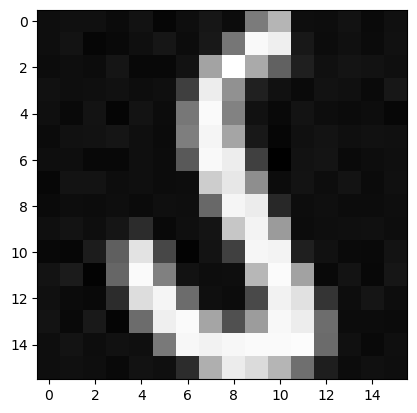

The reconstruction of digit 5 adding  152  principal components


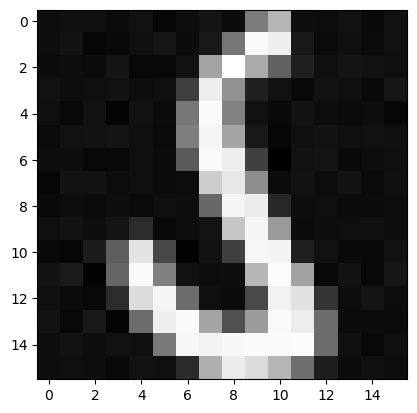

The reconstruction of digit 5 adding  153  principal components


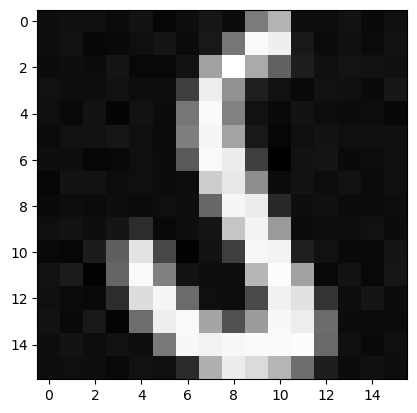

The reconstruction of digit 5 adding  154  principal components


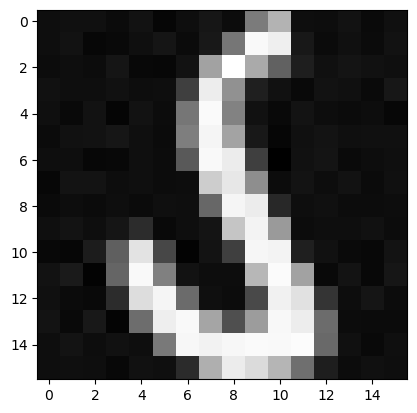

The reconstruction of digit 5 adding  155  principal components


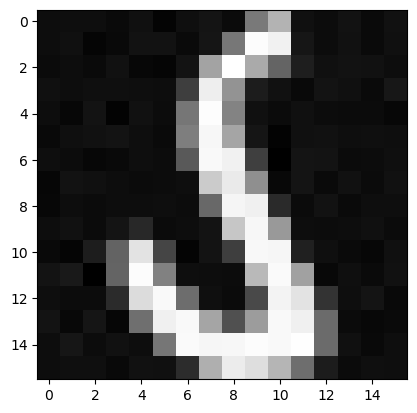

The reconstruction of digit 5 adding  156  principal components


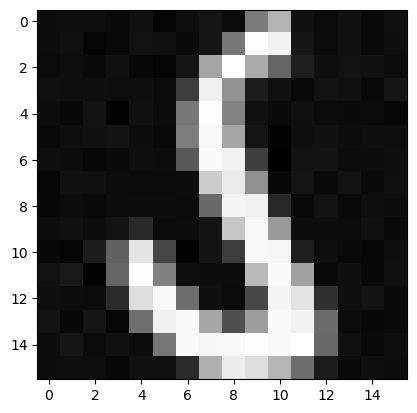

The reconstruction of digit 5 adding  157  principal components


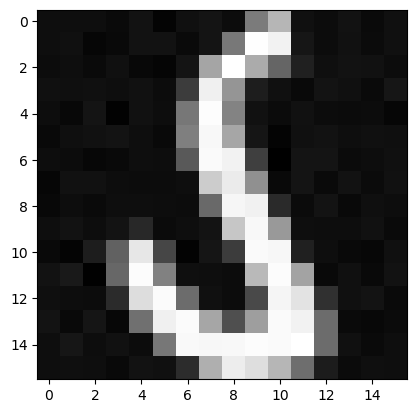

The reconstruction of digit 5 adding  158  principal components


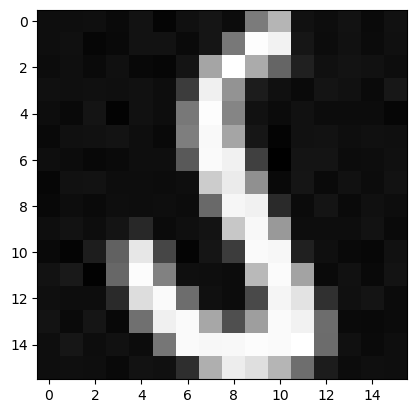

The reconstruction of digit 5 adding  159  principal components


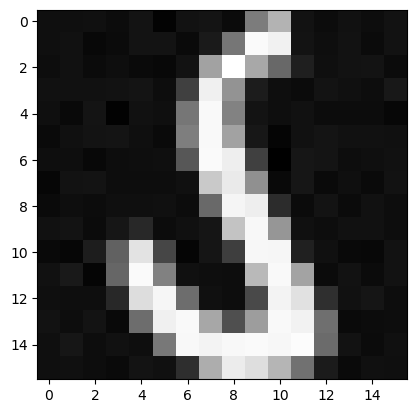

The reconstruction of digit 5 adding  160  principal components


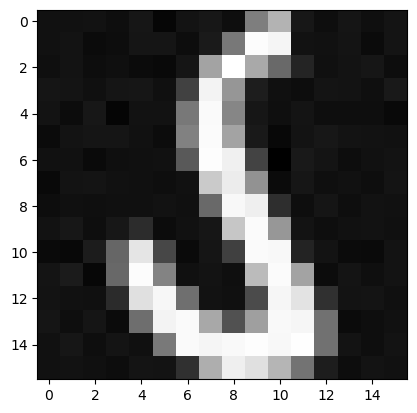

The reconstruction of digit 5 adding  161  principal components


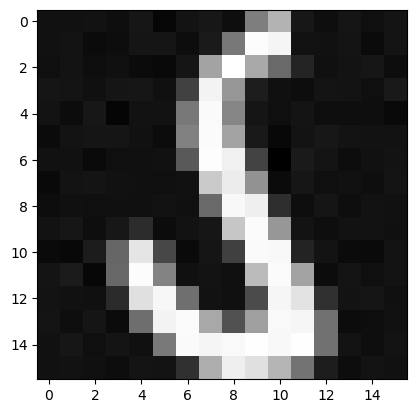

The reconstruction of digit 5 adding  162  principal components


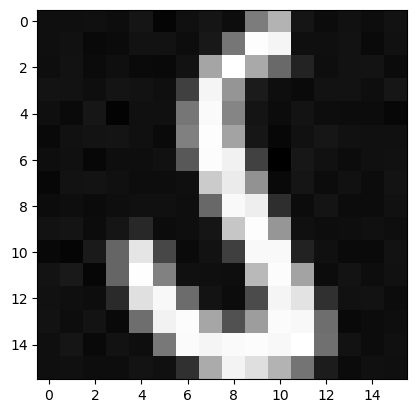

The reconstruction of digit 5 adding  163  principal components


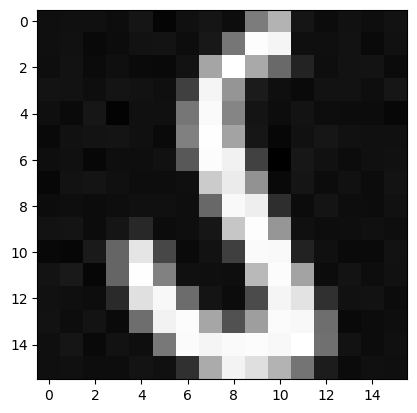

The reconstruction of digit 5 adding  164  principal components


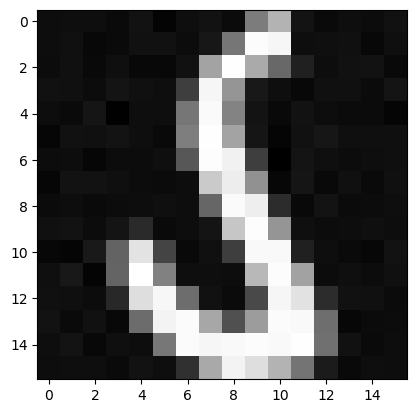

The reconstruction of digit 5 adding  165  principal components


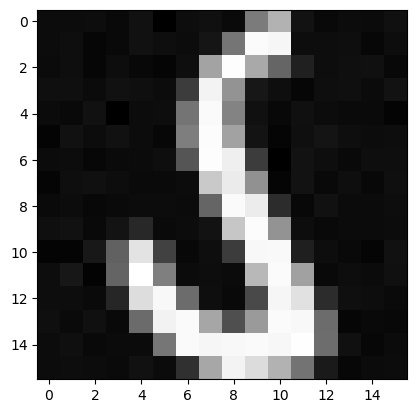

The reconstruction of digit 5 adding  166  principal components


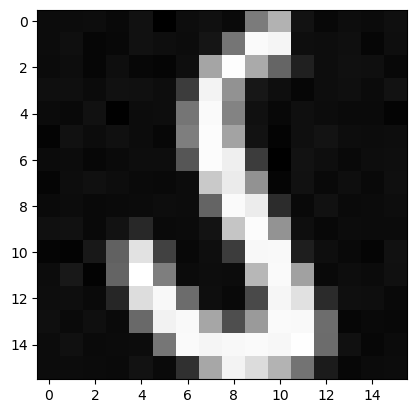

The reconstruction of digit 5 adding  167  principal components


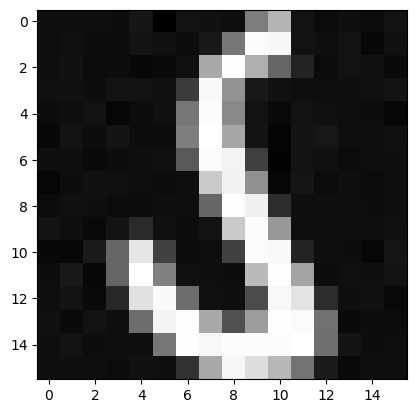

The reconstruction of digit 5 adding  168  principal components


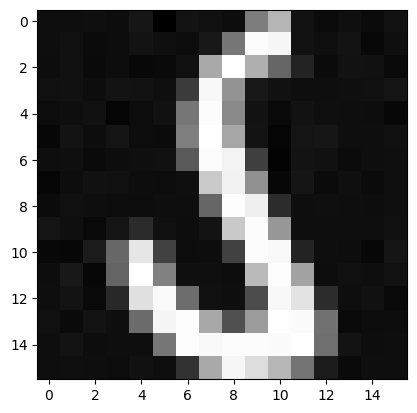

The reconstruction of digit 5 adding  169  principal components


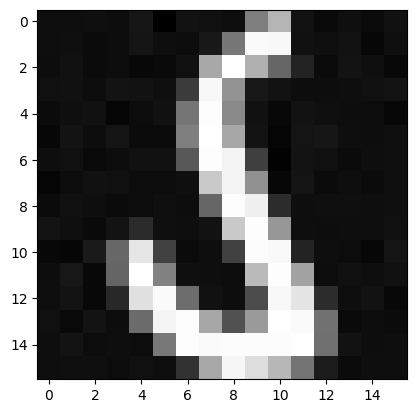

The reconstruction of digit 5 adding  170  principal components


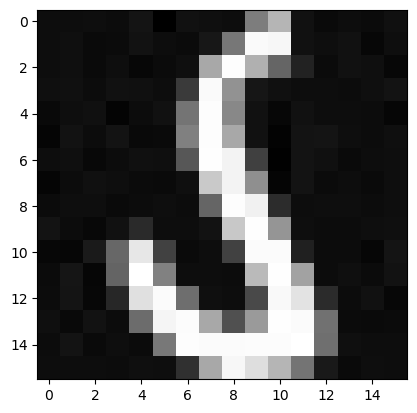

The reconstruction of digit 5 adding  171  principal components


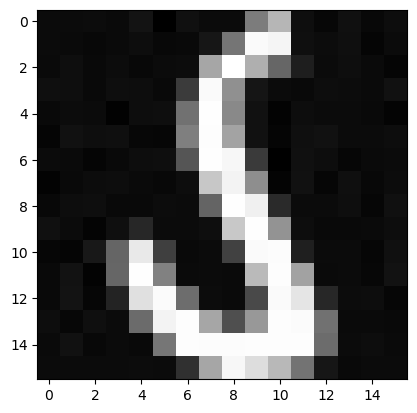

The reconstruction of digit 5 adding  172  principal components


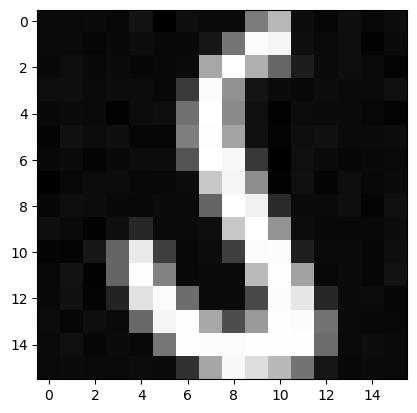

The reconstruction of digit 5 adding  173  principal components


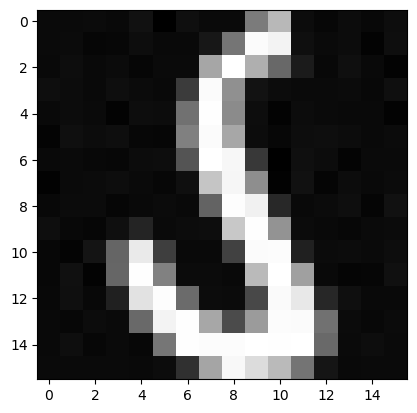

The reconstruction of digit 5 adding  174  principal components


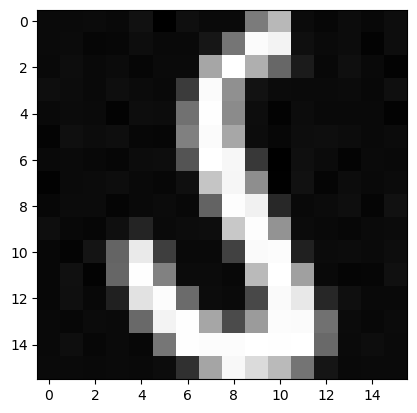

The reconstruction of digit 5 adding  175  principal components


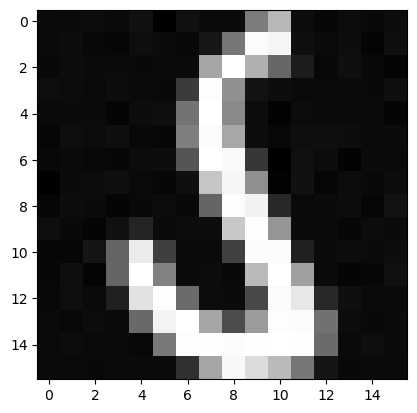

The reconstruction of digit 5 adding  176  principal components


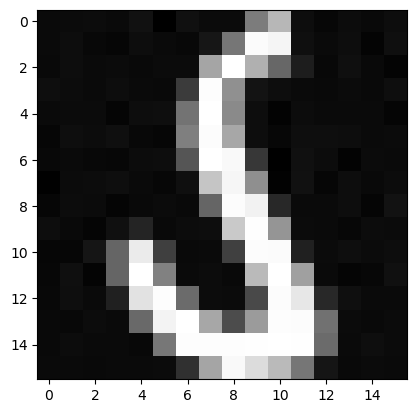

The reconstruction of digit 5 adding  177  principal components


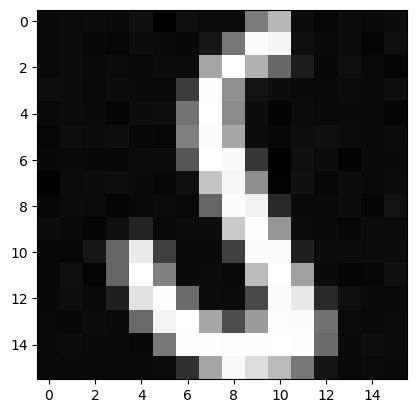

The reconstruction of digit 5 adding  178  principal components


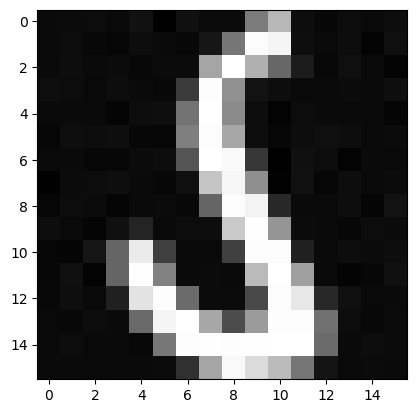

The reconstruction of digit 5 adding  179  principal components


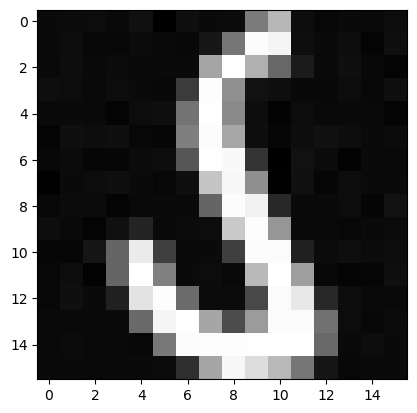

The reconstruction of digit 5 adding  180  principal components


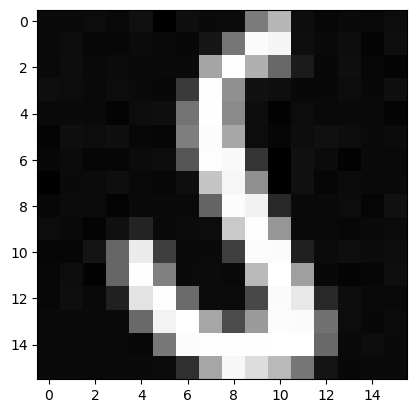

The reconstruction of digit 5 adding  181  principal components


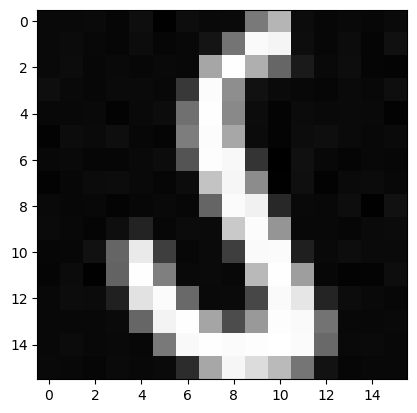

The reconstruction of digit 5 adding  182  principal components


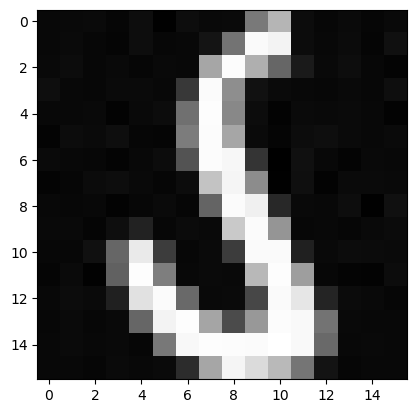

The reconstruction of digit 5 adding  183  principal components


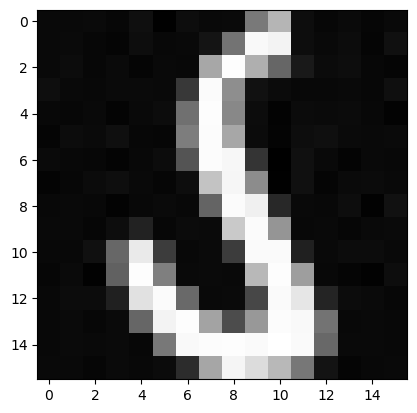

The reconstruction of digit 5 adding  184  principal components


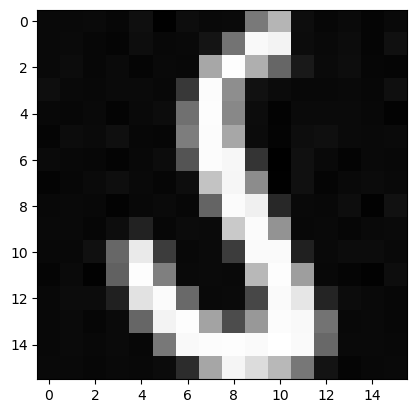

The reconstruction of digit 5 adding  185  principal components


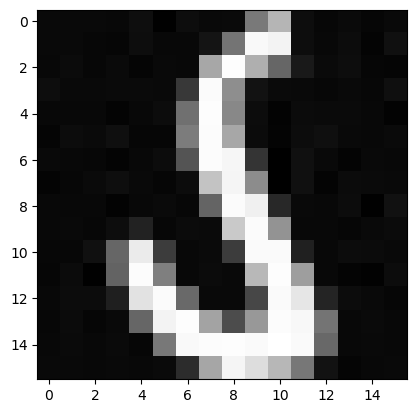

The reconstruction of digit 5 adding  186  principal components


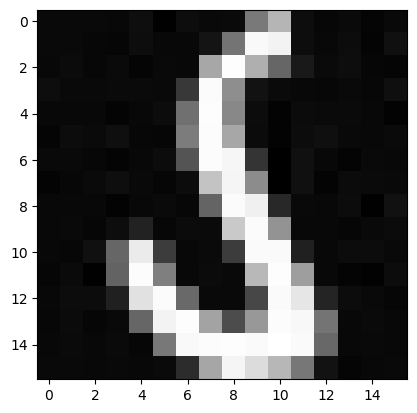

The reconstruction of digit 5 adding  187  principal components


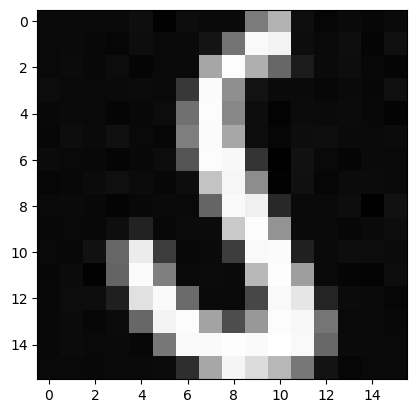

The reconstruction of digit 5 adding  188  principal components


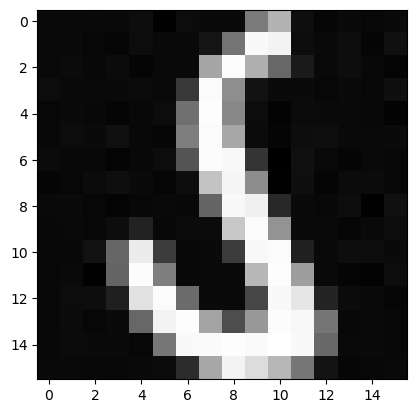

The reconstruction of digit 5 adding  189  principal components


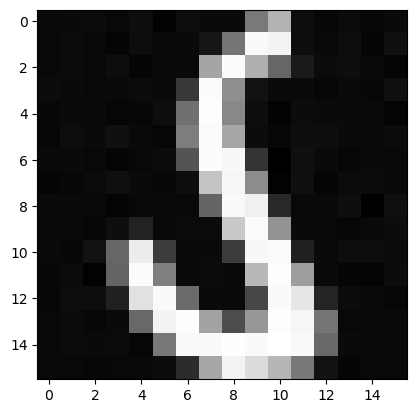

The reconstruction of digit 5 adding  190  principal components


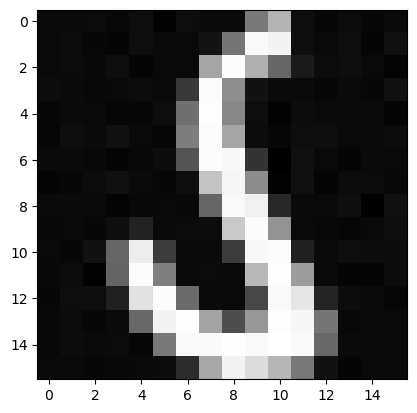

The reconstruction of digit 5 adding  191  principal components


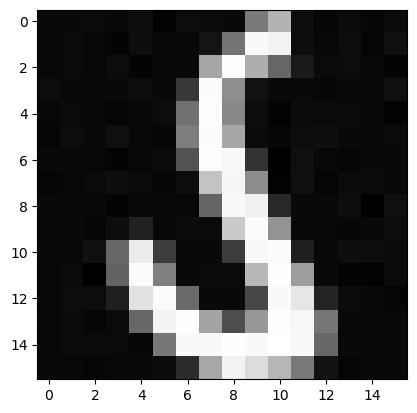

The reconstruction of digit 5 adding  192  principal components


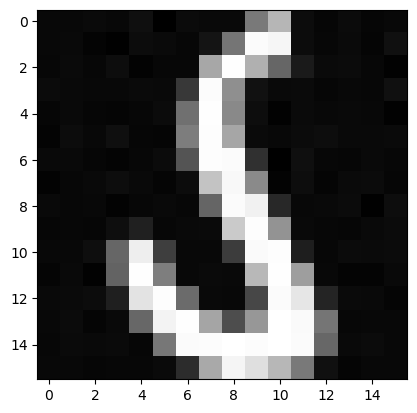

The reconstruction of digit 5 adding  193  principal components


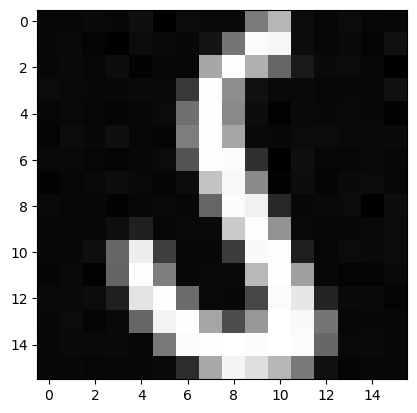

The reconstruction of digit 5 adding  194  principal components


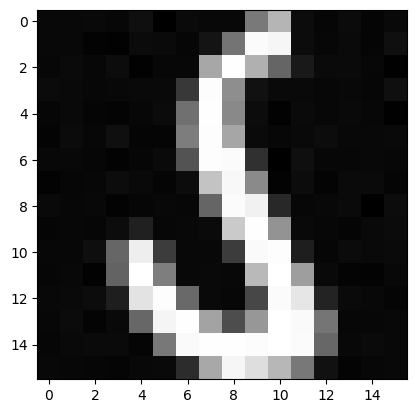

The reconstruction of digit 5 adding  195  principal components


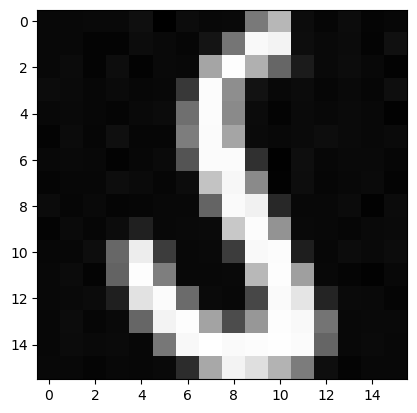

The reconstruction of digit 5 adding  196  principal components


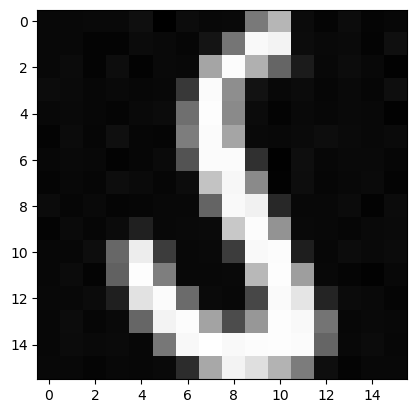

The reconstruction of digit 5 adding  197  principal components


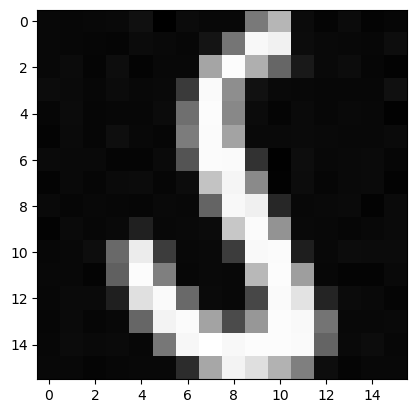

The reconstruction of digit 5 adding  198  principal components


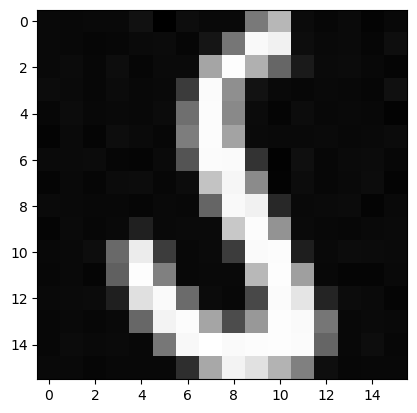

The reconstruction of digit 5 adding  199  principal components


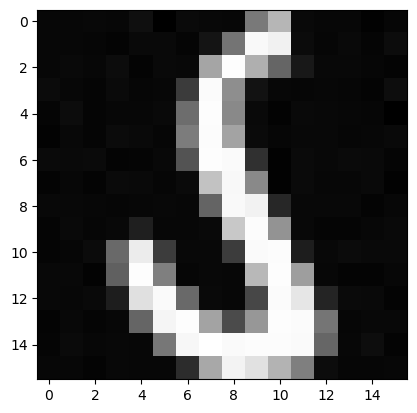

The reconstruction of digit 5 adding  200  principal components


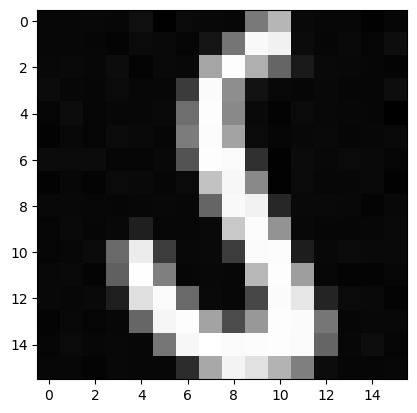

The reconstruction of digit 5 adding  201  principal components


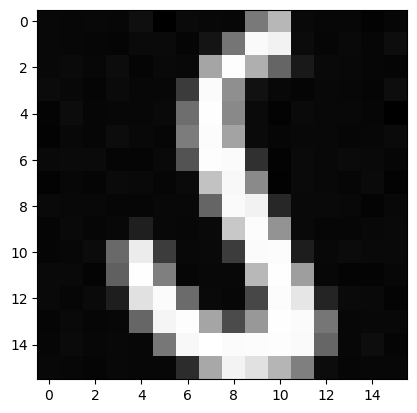

The reconstruction of digit 5 adding  202  principal components


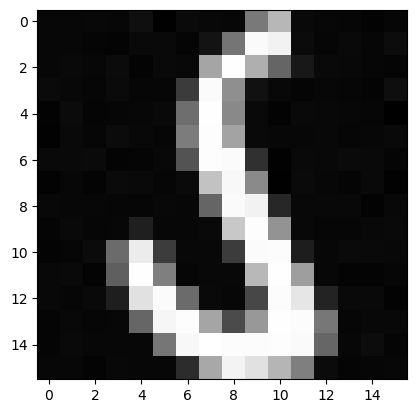

The reconstruction of digit 5 adding  203  principal components


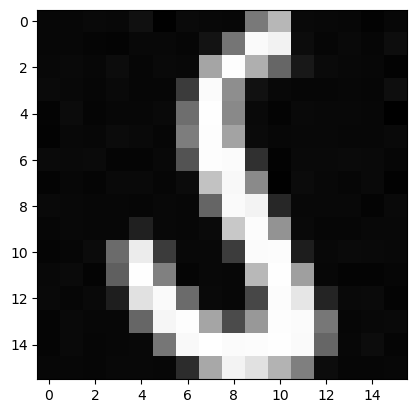

The reconstruction of digit 5 adding  204  principal components


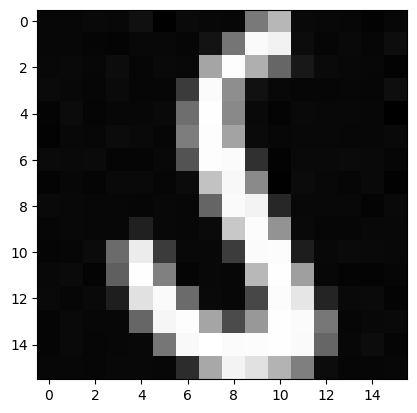

The reconstruction of digit 5 adding  205  principal components


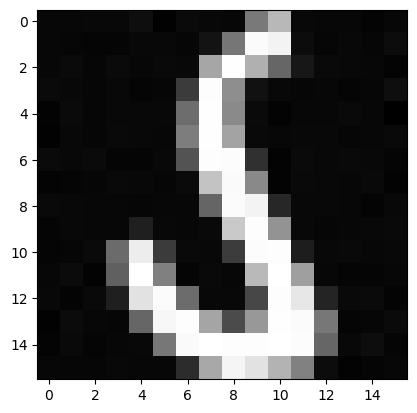

The reconstruction of digit 5 adding  206  principal components


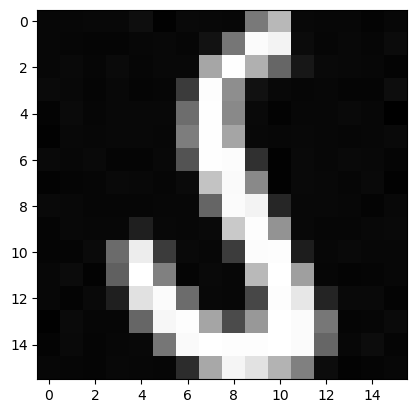

The reconstruction of digit 5 adding  207  principal components


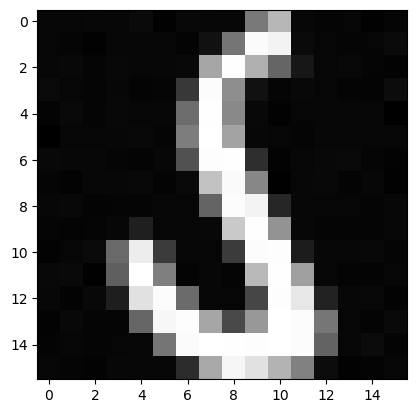

The reconstruction of digit 5 adding  208  principal components


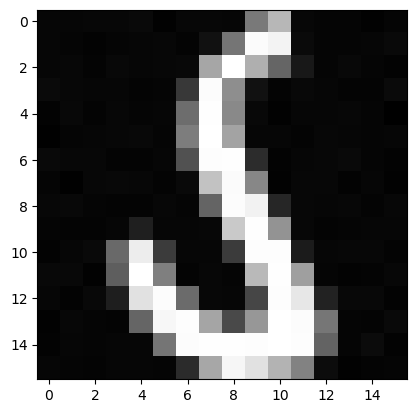

The reconstruction of digit 5 adding  209  principal components


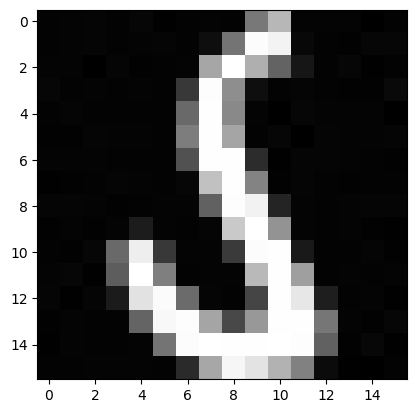

The reconstruction of digit 5 adding  210  principal components


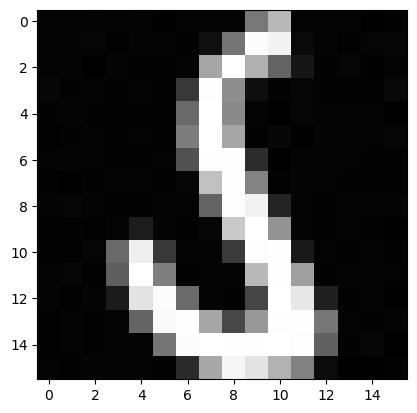

The reconstruction of digit 5 adding  211  principal components


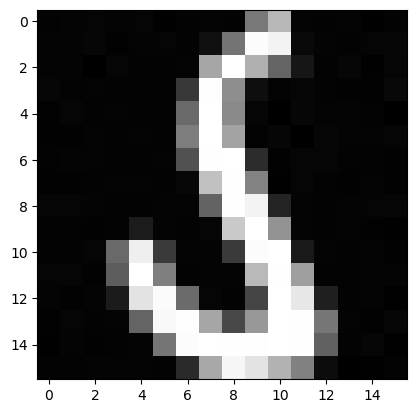

The reconstruction of digit 5 adding  212  principal components


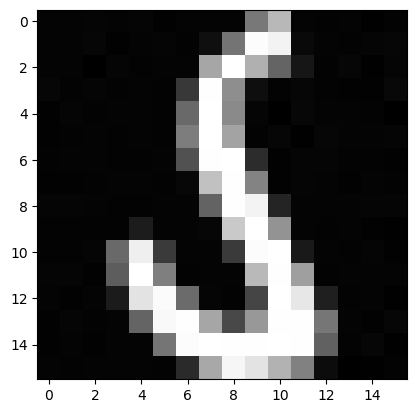

The reconstruction of digit 5 adding  213  principal components


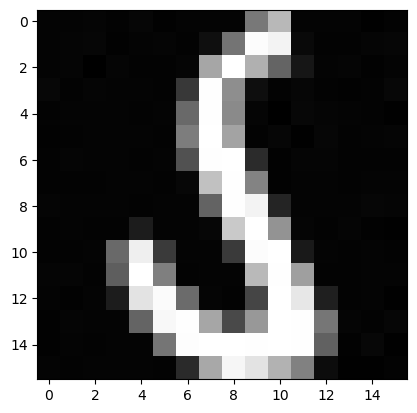

The reconstruction of digit 5 adding  214  principal components


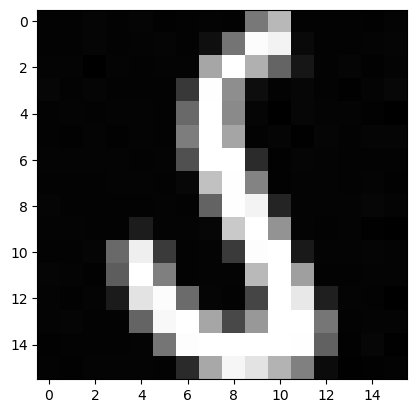

The reconstruction of digit 5 adding  215  principal components


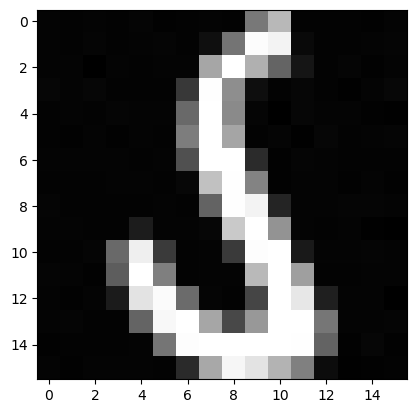

The reconstruction of digit 5 adding  216  principal components


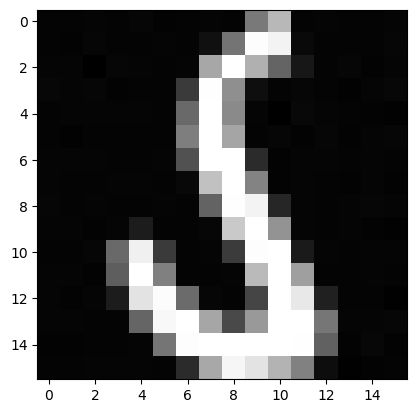

The reconstruction of digit 5 adding  217  principal components


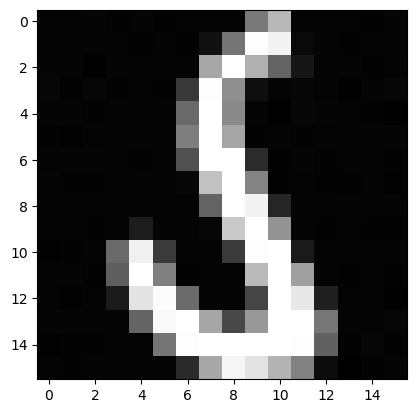

The reconstruction of digit 5 adding  218  principal components


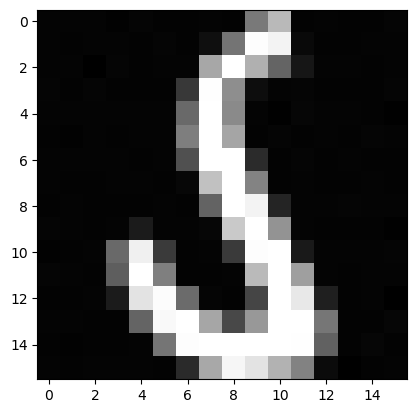

The reconstruction of digit 5 adding  219  principal components


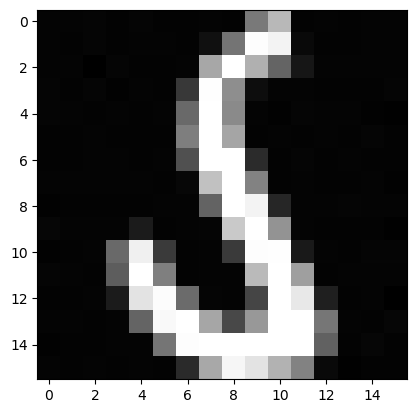

The reconstruction of digit 5 adding  220  principal components


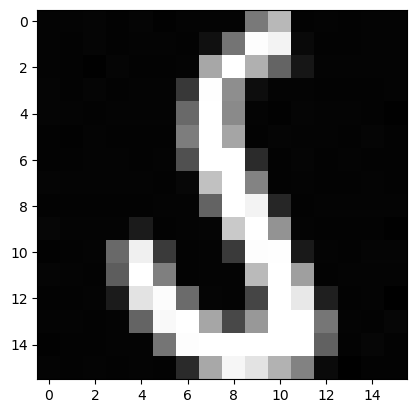

The reconstruction of digit 5 adding  221  principal components


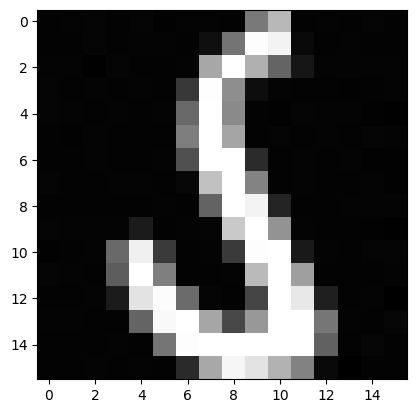

The reconstruction of digit 5 adding  222  principal components


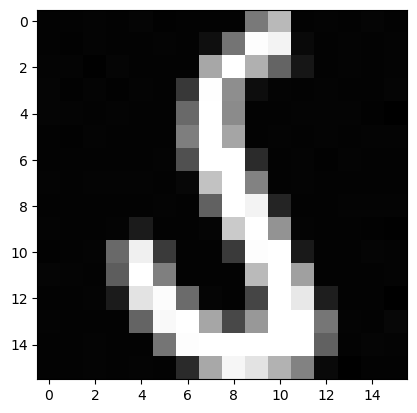

The reconstruction of digit 5 adding  223  principal components


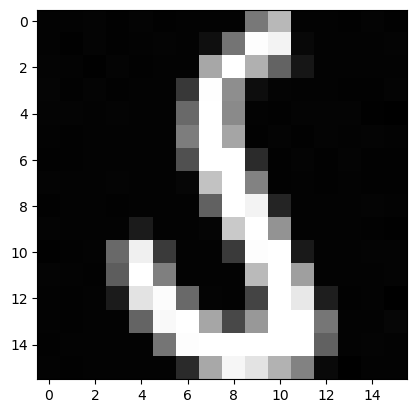

The reconstruction of digit 5 adding  224  principal components


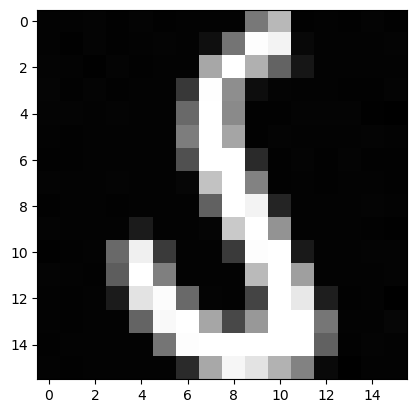

The reconstruction of digit 5 adding  225  principal components


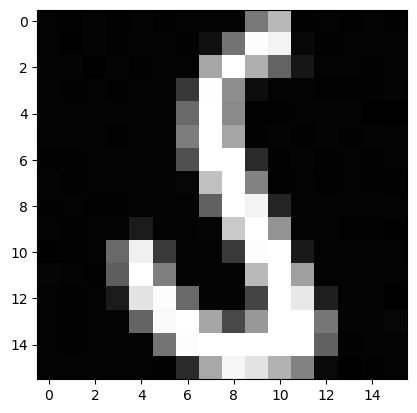

The reconstruction of digit 5 adding  226  principal components


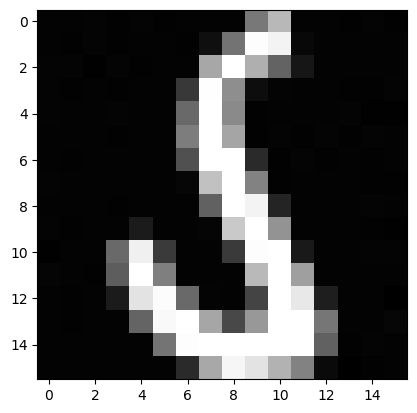

The reconstruction of digit 5 adding  227  principal components


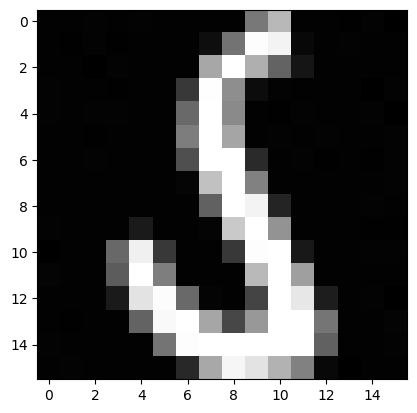

The reconstruction of digit 5 adding  228  principal components


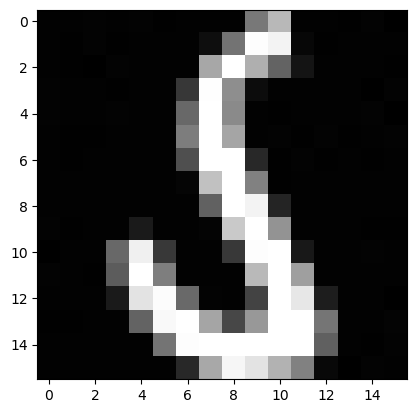

The reconstruction of digit 5 adding  229  principal components


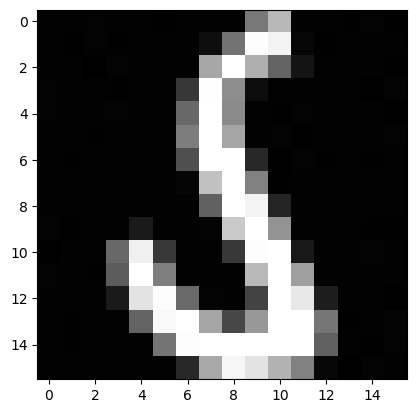

The reconstruction of digit 5 adding  230  principal components


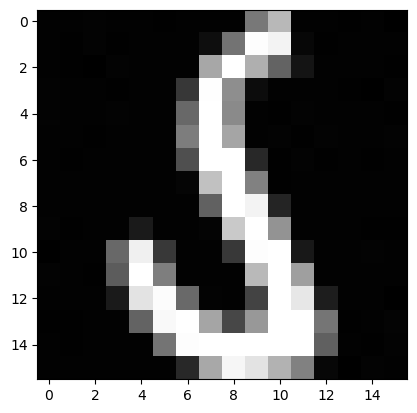

The reconstruction of digit 5 adding  231  principal components


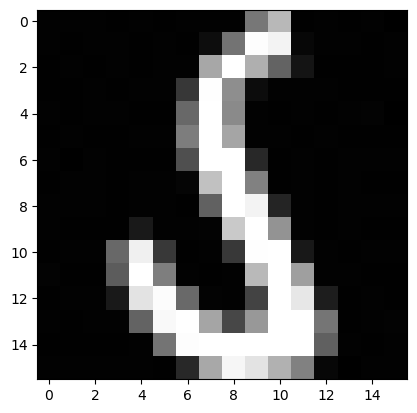

The reconstruction of digit 5 adding  232  principal components


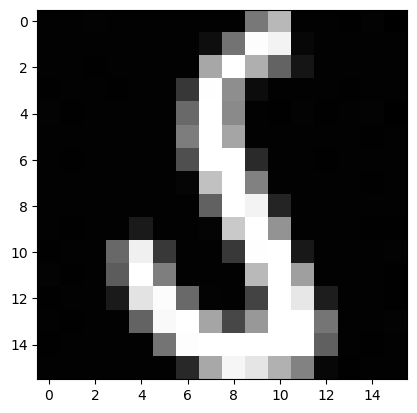

The reconstruction of digit 5 adding  233  principal components


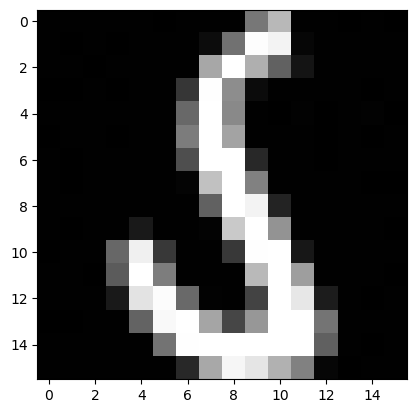

The reconstruction of digit 5 adding  234  principal components


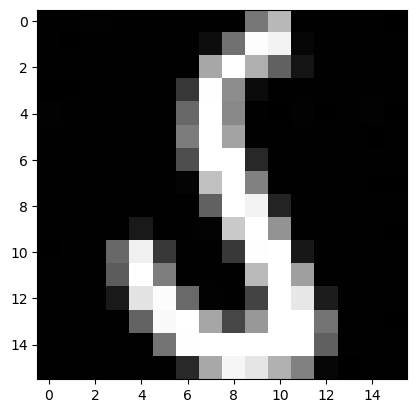

The reconstruction of digit 5 adding  235  principal components


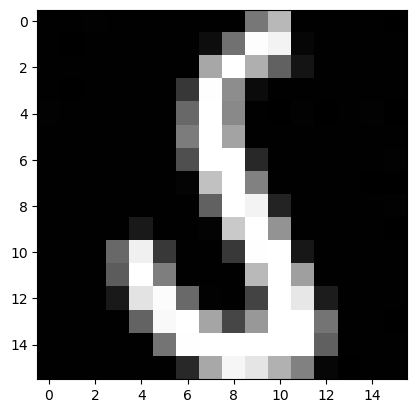

The reconstruction of digit 5 adding  236  principal components


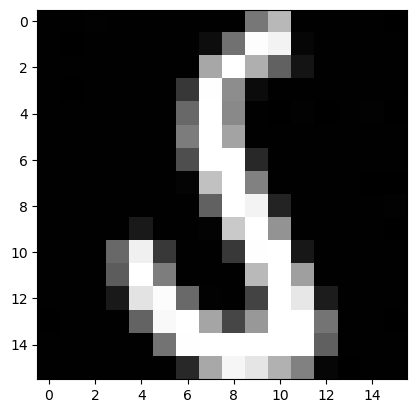

The reconstruction of digit 5 adding  237  principal components


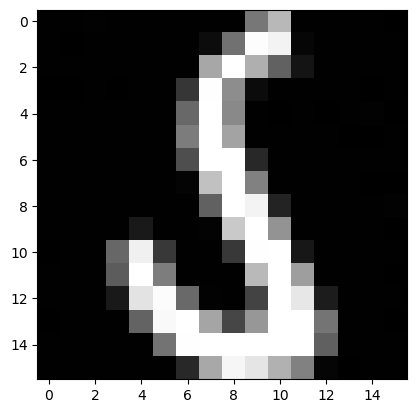

The reconstruction of digit 5 adding  238  principal components


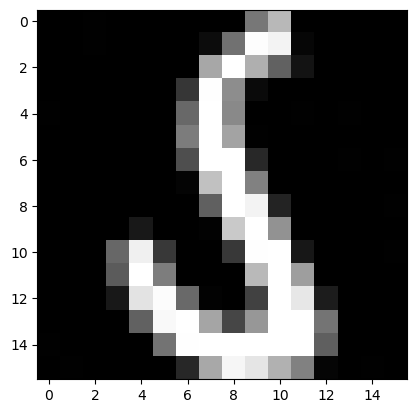

The reconstruction of digit 5 adding  239  principal components


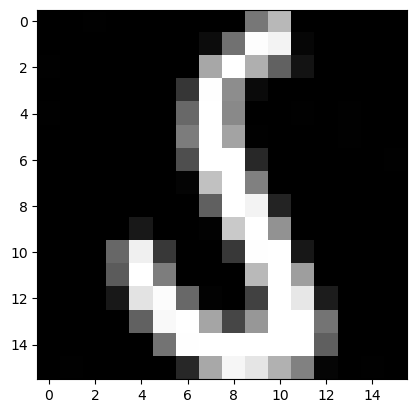

The reconstruction of digit 5 adding  240  principal components


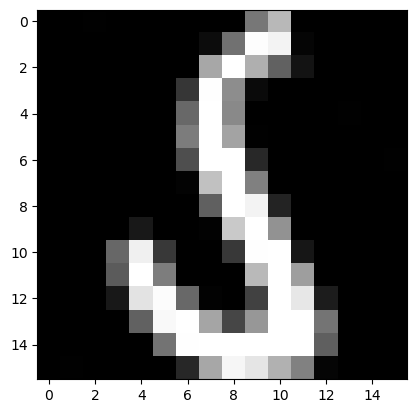

The reconstruction of digit 5 adding  241  principal components


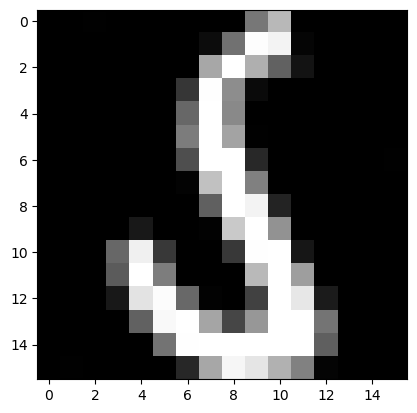

The reconstruction of digit 5 adding  242  principal components


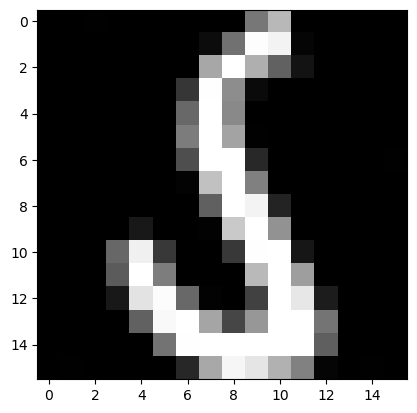

The reconstruction of digit 5 adding  243  principal components


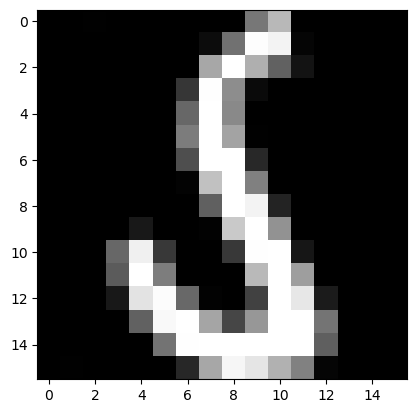

The reconstruction of digit 5 adding  244  principal components


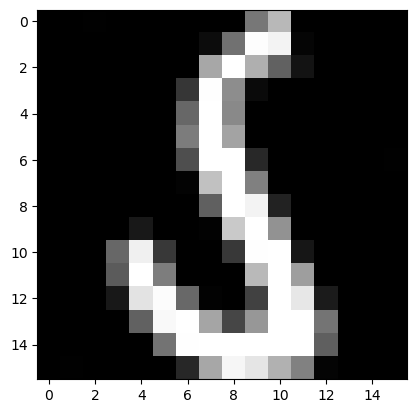

The reconstruction of digit 5 adding  245  principal components


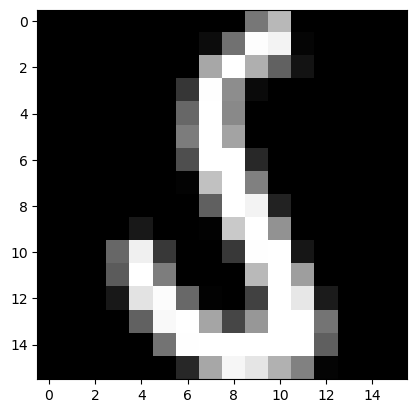

The reconstruction of digit 5 adding  246  principal components


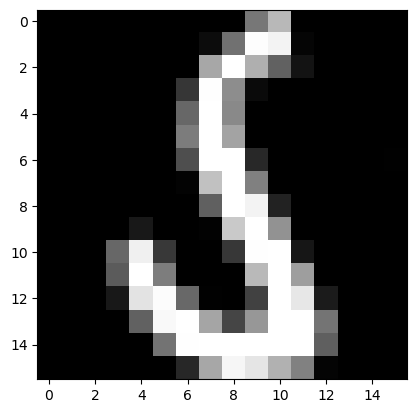

The reconstruction of digit 5 adding  247  principal components


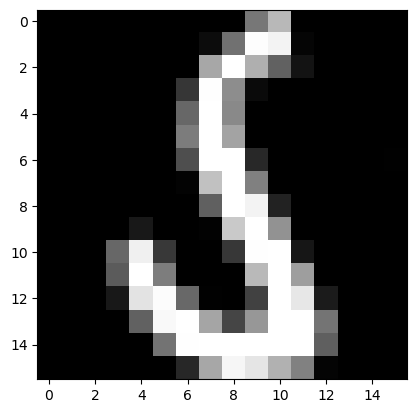

The reconstruction of digit 5 adding  248  principal components


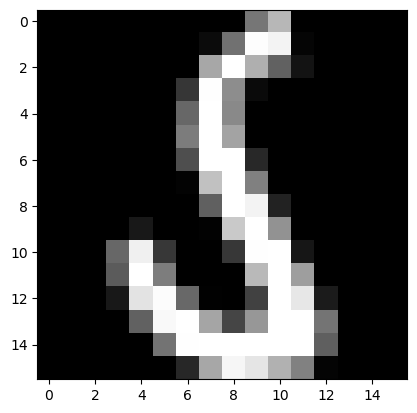

The reconstruction of digit 5 adding  249  principal components


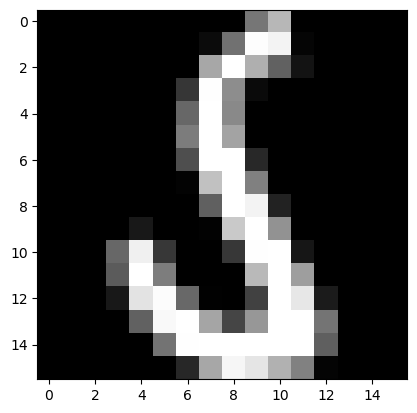

The reconstruction of digit 5 adding  250  principal components


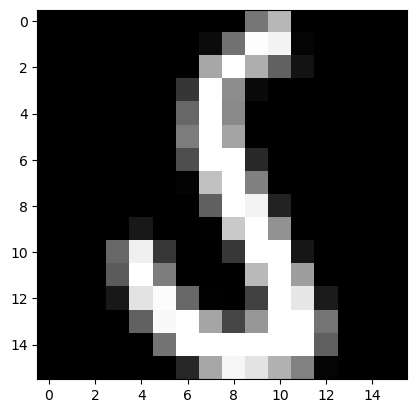

The reconstruction of digit 5 adding  251  principal components


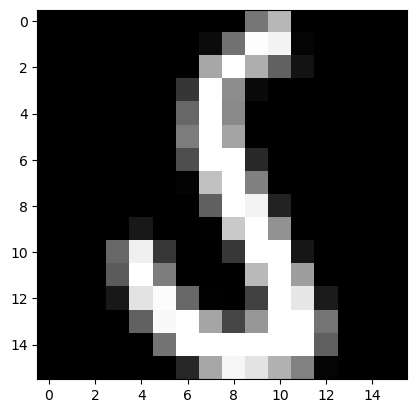

The reconstruction of digit 5 adding  252  principal components


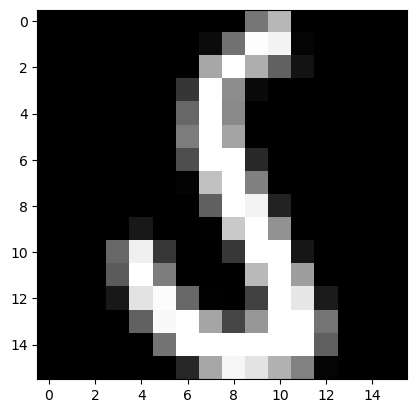

The reconstruction of digit 5 adding  253  principal components


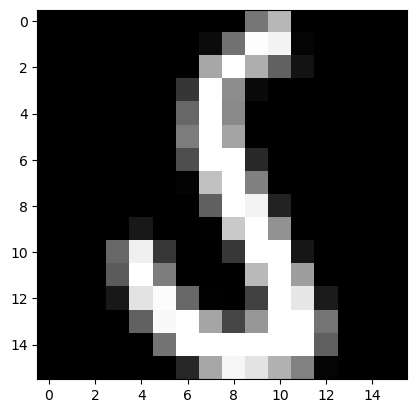

The reconstruction of digit 5 adding  254  principal components


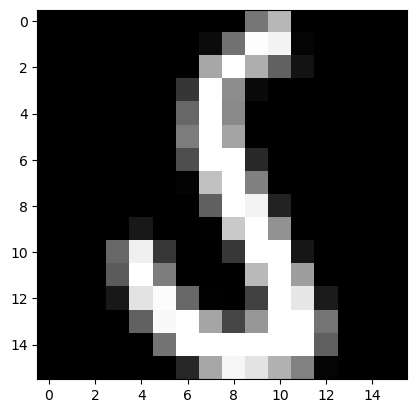

The reconstruction of digit 5 adding  255  principal components


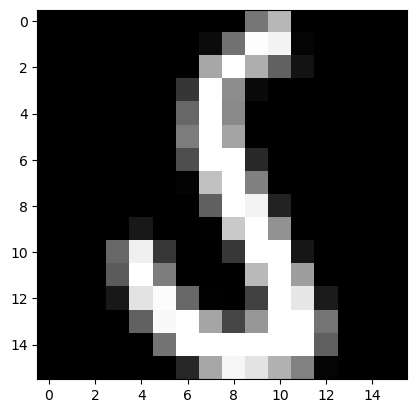

The reconstruction of digit 5 adding  256  principal components


In [10]:
n=12   # choice of image no 12
kmax= 255  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax+1):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
    plt.imshow(I_moy + update,cmap='gray')
    plt.show()
    print("The reconstruction of digit 5 adding ", k+1," principal components")
    
    


#### 3.1. How many components are necessary to obtain a reconstruction considered as acceptable?

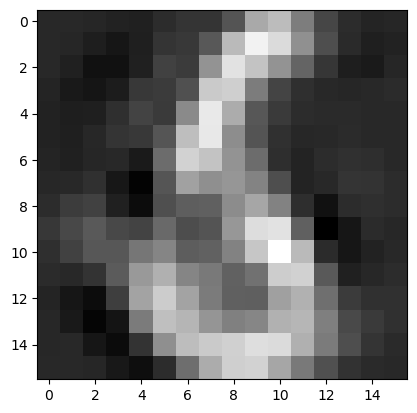

The reconstruction of digit 5 adding  15  principal components


'\nAdding 15 principal components is giving an acceptable reconstruction of the digit 5.\n'

In [13]:
n=12   # choice of image no 12
kmax= 15  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 5 adding ", k+1," principal components")
    
"""
Adding 15 principal components is giving an acceptable reconstruction of the digit 5.
"""

#### 3.2. How many components are necessary to obtain a reconstruction considered as nice?

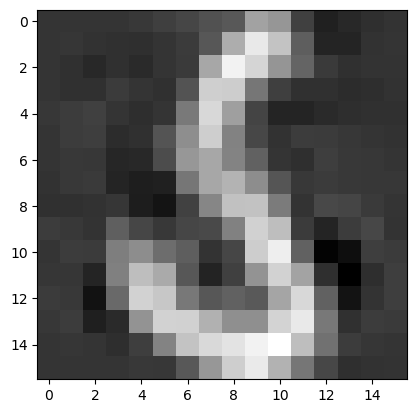

The reconstruction of digit 5 adding  29  principal components


'\nAdding 29 principal components is already giving  a nice reconstruction of the digit 5.\n'

In [14]:
n=12   # choice of image no 12
kmax= 29  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 5 adding ", k+1," principal components")
    
"""
Adding 29 principal components is already giving  a nice reconstruction of the digit 5.
"""

#### 3.3. How many components are necessary to obtain a reconstruction considered as very nice?

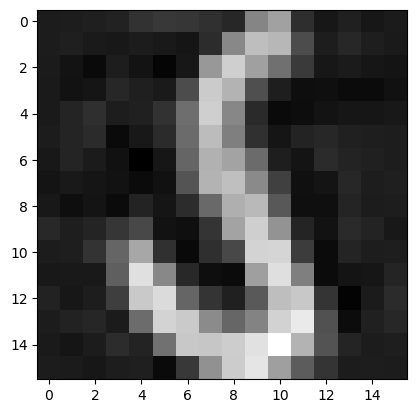

The reconstruction of digit 5 adding  53  principal components


'\nAdding 53 principal components is giving a very nice reconstruction of the digit 5.\n'

In [15]:
n=12   # choice of image no 12
kmax= 53  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 5 adding ", k+1," principal components")
    
"""
Adding 53 principal components is giving a very nice reconstruction of the digit 5.
"""

#### 4. The same analysis for 6

#### 4.1. Adding the successive contribution of principal components

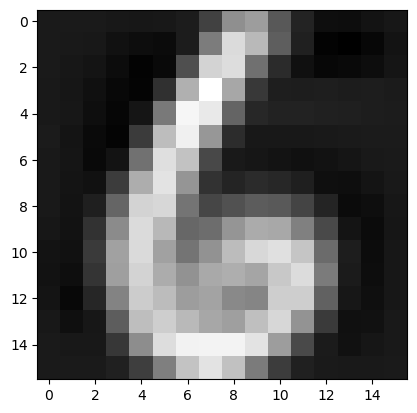

The reconstruction of digit 6 adding  1  principal components


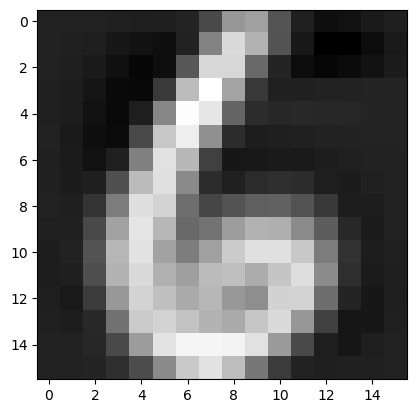

The reconstruction of digit 6 adding  2  principal components


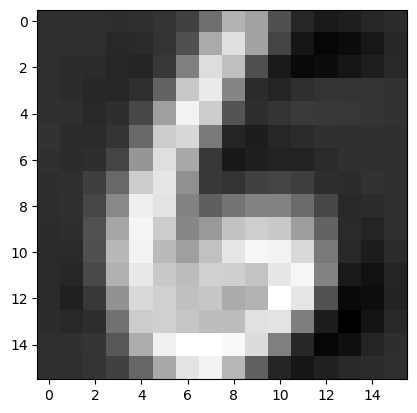

The reconstruction of digit 6 adding  3  principal components


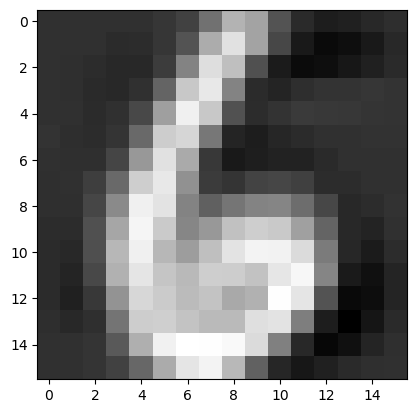

The reconstruction of digit 6 adding  4  principal components


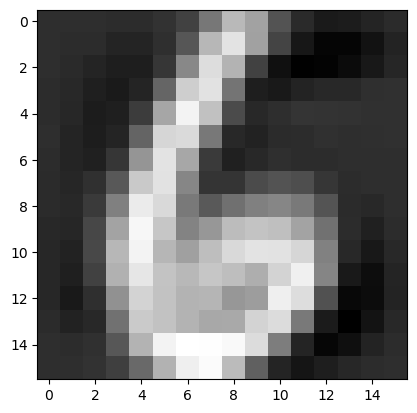

The reconstruction of digit 6 adding  5  principal components


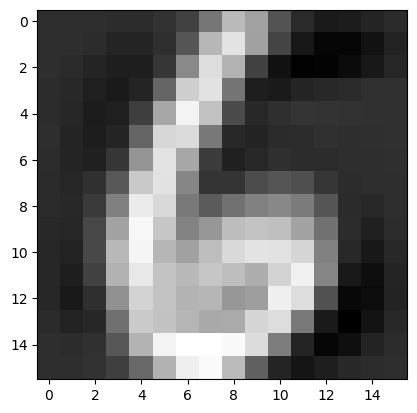

The reconstruction of digit 6 adding  6  principal components


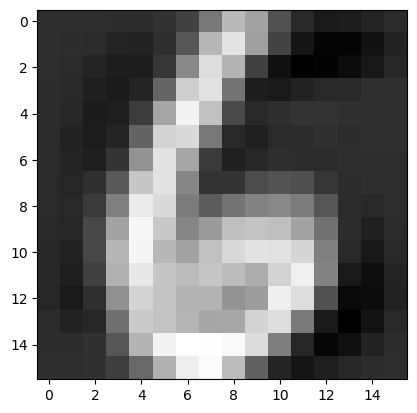

The reconstruction of digit 6 adding  7  principal components


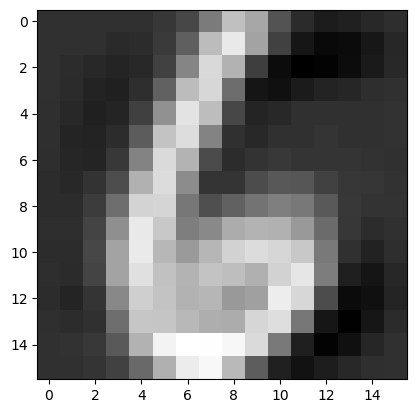

The reconstruction of digit 6 adding  8  principal components


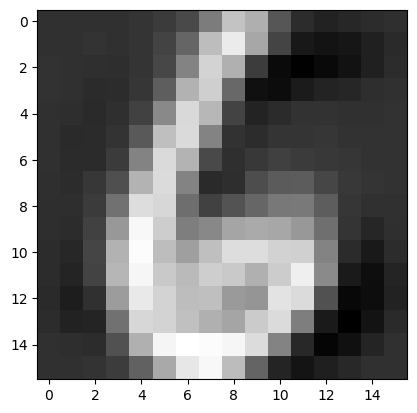

The reconstruction of digit 6 adding  9  principal components


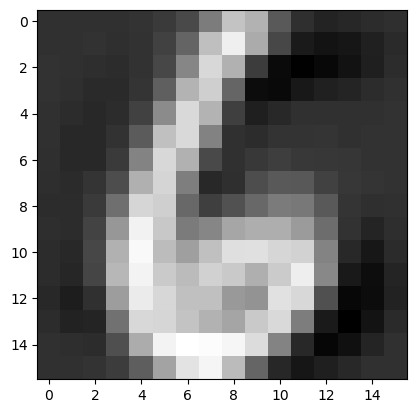

The reconstruction of digit 6 adding  10  principal components


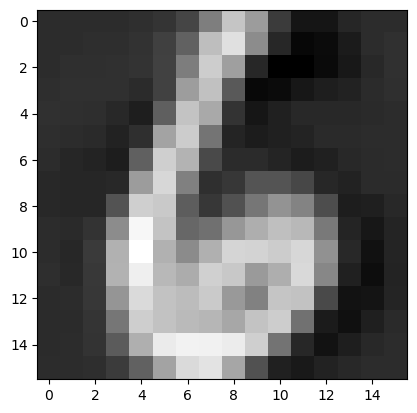

The reconstruction of digit 6 adding  11  principal components


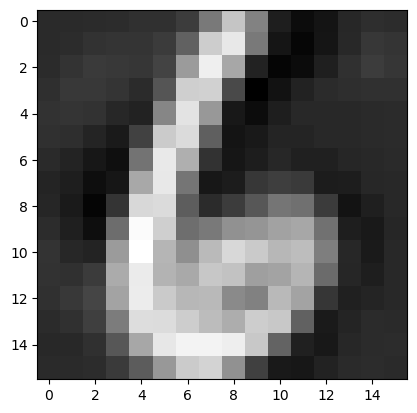

The reconstruction of digit 6 adding  12  principal components


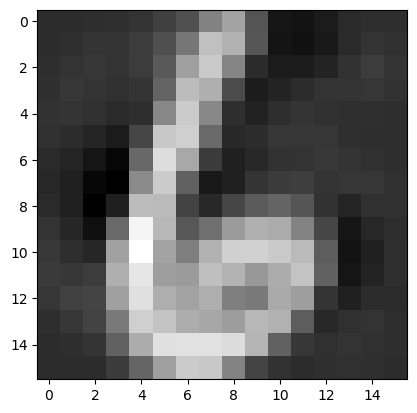

The reconstruction of digit 6 adding  13  principal components


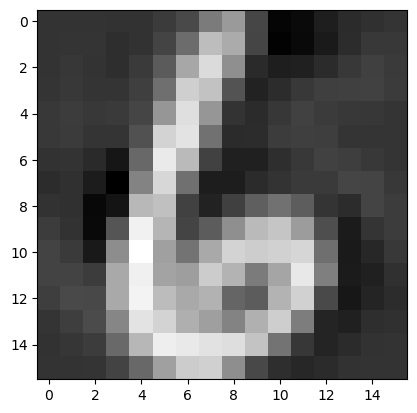

The reconstruction of digit 6 adding  14  principal components


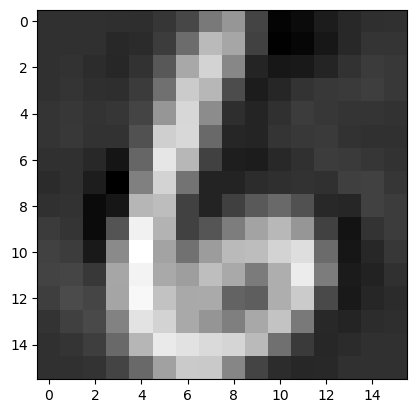

The reconstruction of digit 6 adding  15  principal components


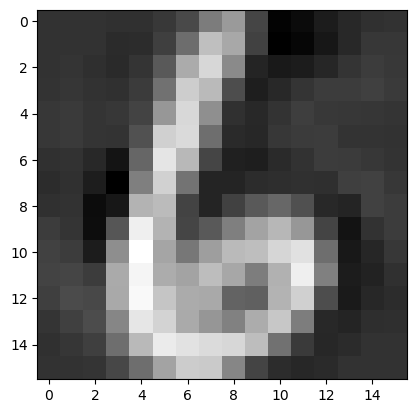

The reconstruction of digit 6 adding  16  principal components


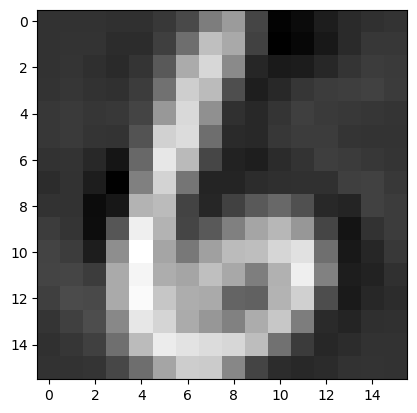

The reconstruction of digit 6 adding  17  principal components


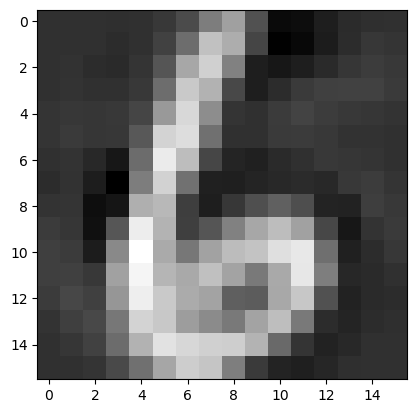

The reconstruction of digit 6 adding  18  principal components


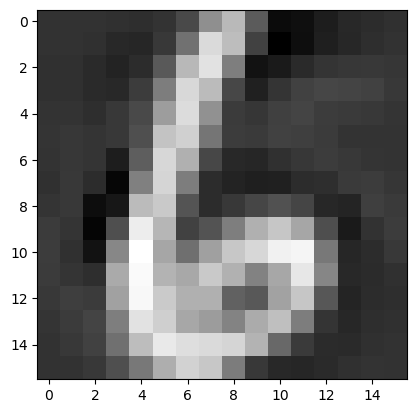

The reconstruction of digit 6 adding  19  principal components


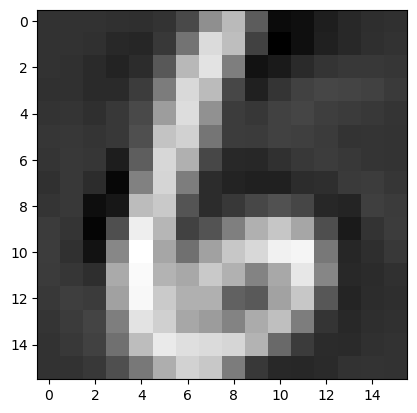

The reconstruction of digit 6 adding  20  principal components


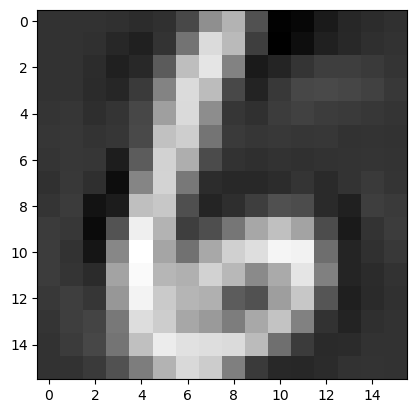

The reconstruction of digit 6 adding  21  principal components


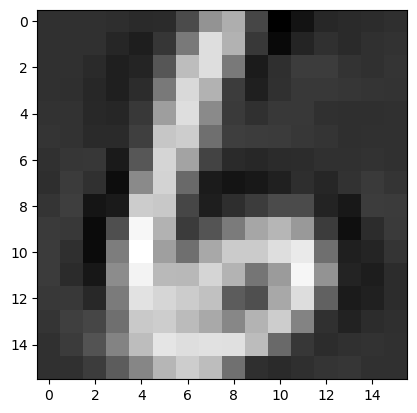

The reconstruction of digit 6 adding  22  principal components


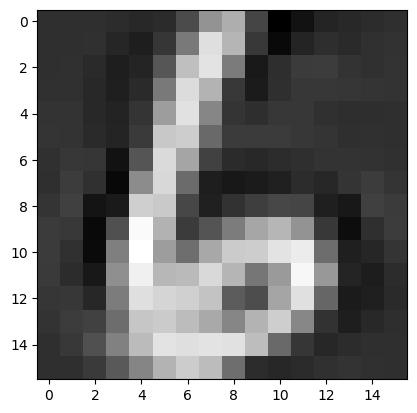

The reconstruction of digit 6 adding  23  principal components


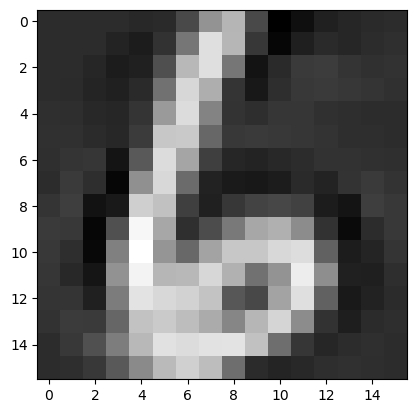

The reconstruction of digit 6 adding  24  principal components


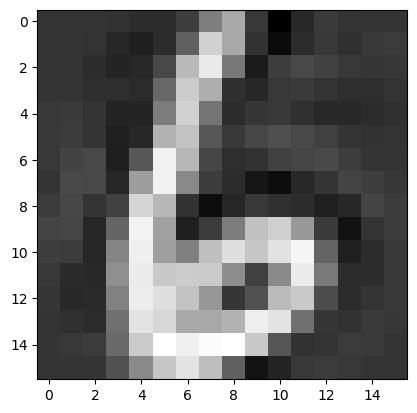

The reconstruction of digit 6 adding  25  principal components


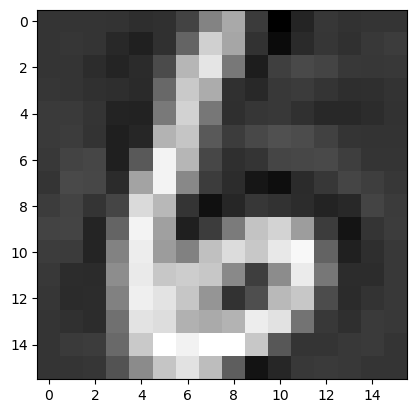

The reconstruction of digit 6 adding  26  principal components


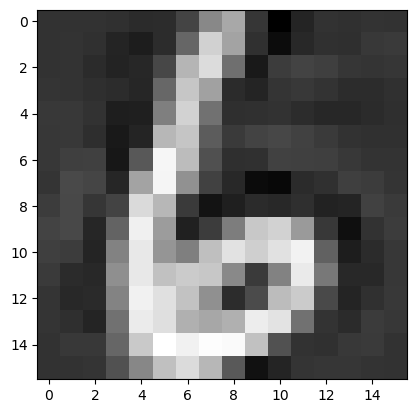

The reconstruction of digit 6 adding  27  principal components


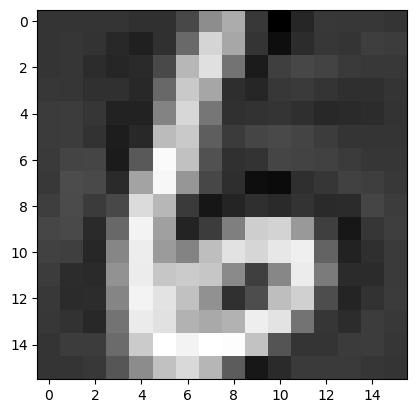

The reconstruction of digit 6 adding  28  principal components


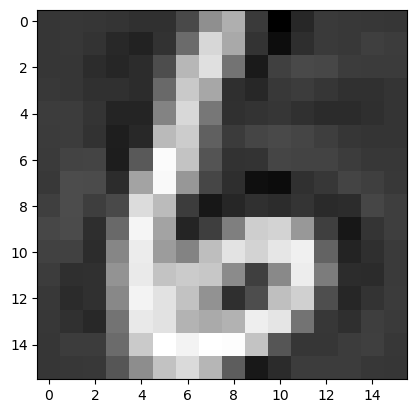

The reconstruction of digit 6 adding  29  principal components


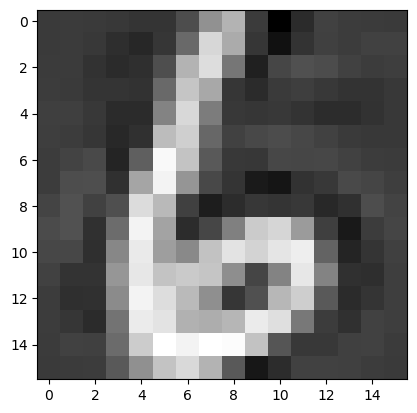

The reconstruction of digit 6 adding  30  principal components


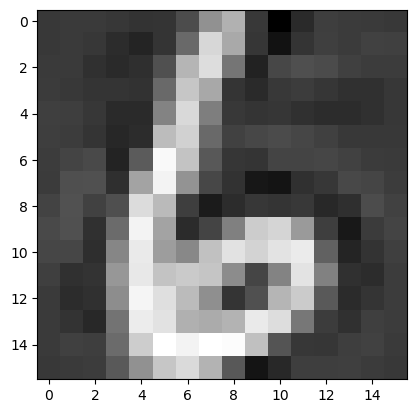

The reconstruction of digit 6 adding  31  principal components


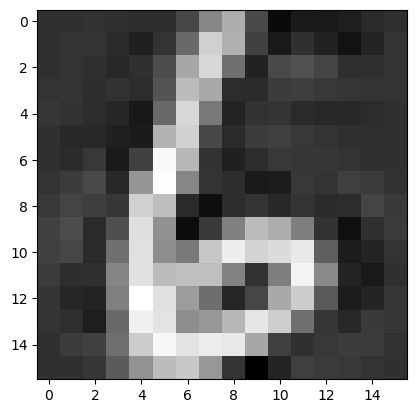

The reconstruction of digit 6 adding  32  principal components


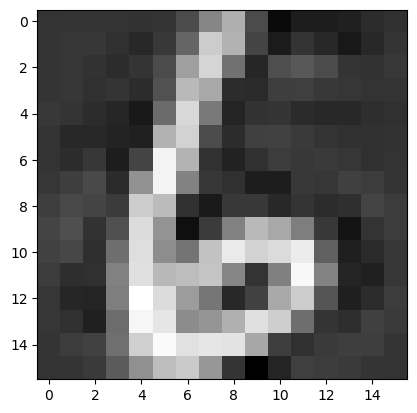

The reconstruction of digit 6 adding  33  principal components


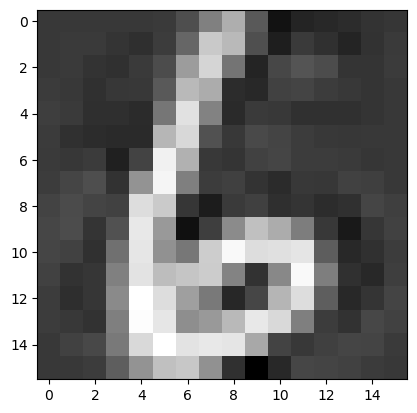

The reconstruction of digit 6 adding  34  principal components


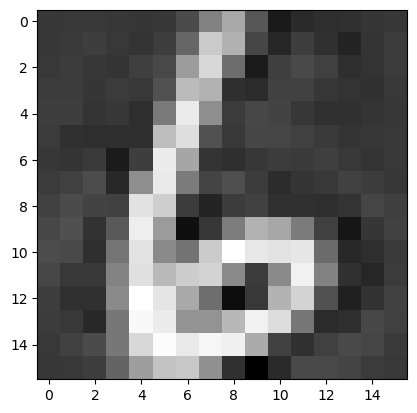

The reconstruction of digit 6 adding  35  principal components


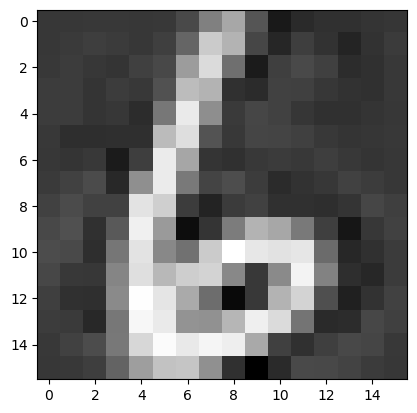

The reconstruction of digit 6 adding  36  principal components


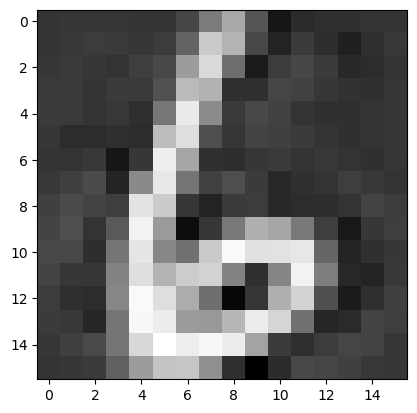

The reconstruction of digit 6 adding  37  principal components


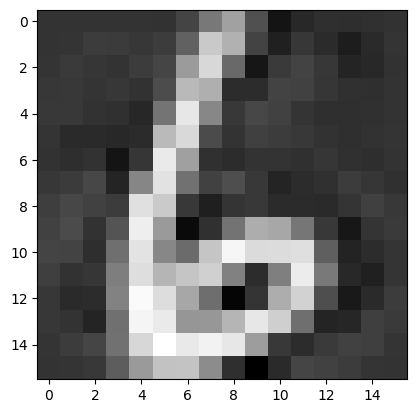

The reconstruction of digit 6 adding  38  principal components


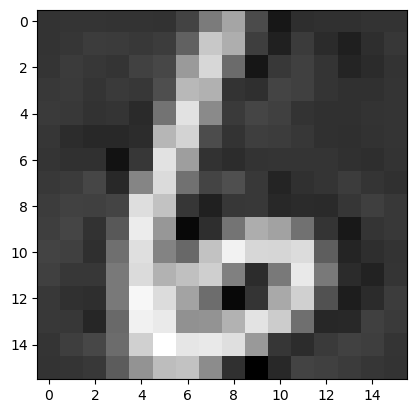

The reconstruction of digit 6 adding  39  principal components


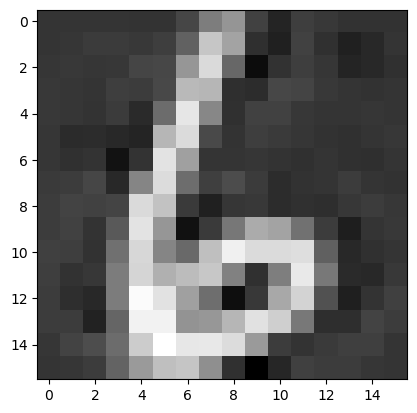

The reconstruction of digit 6 adding  40  principal components


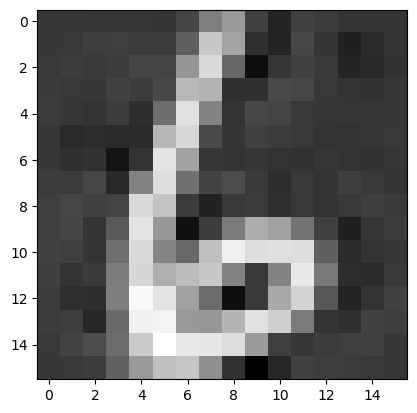

The reconstruction of digit 6 adding  41  principal components


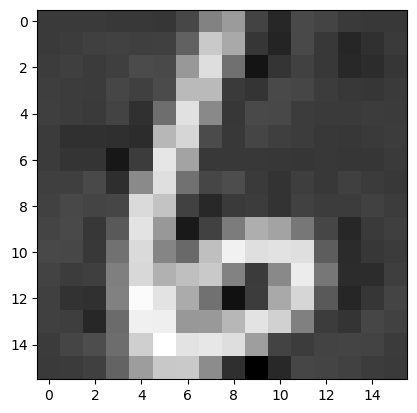

The reconstruction of digit 6 adding  42  principal components


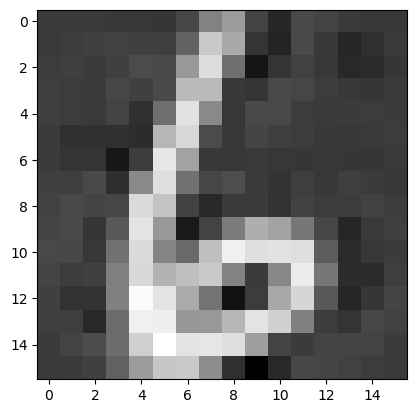

The reconstruction of digit 6 adding  43  principal components


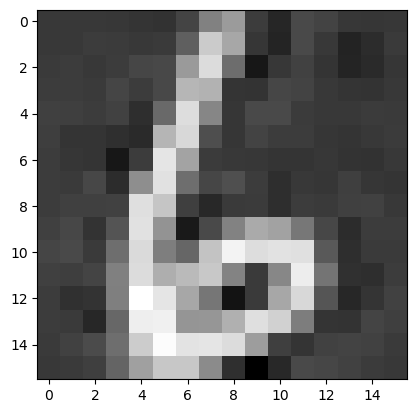

The reconstruction of digit 6 adding  44  principal components


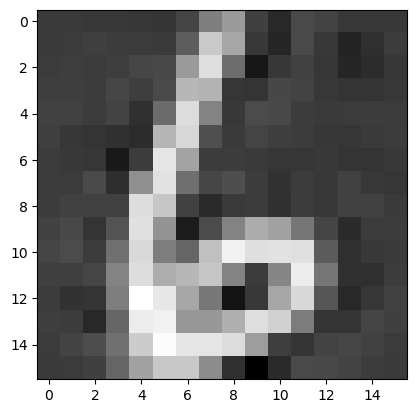

The reconstruction of digit 6 adding  45  principal components


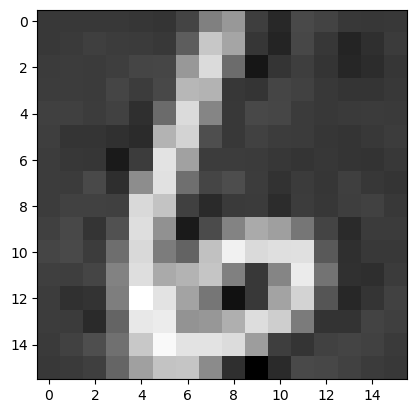

The reconstruction of digit 6 adding  46  principal components


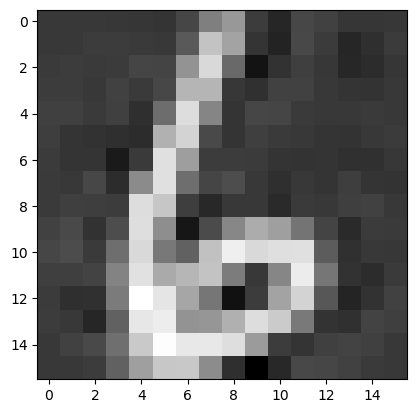

The reconstruction of digit 6 adding  47  principal components


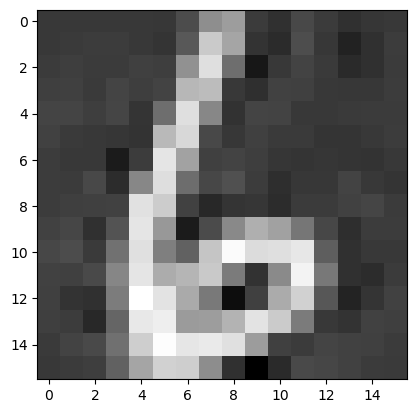

The reconstruction of digit 6 adding  48  principal components


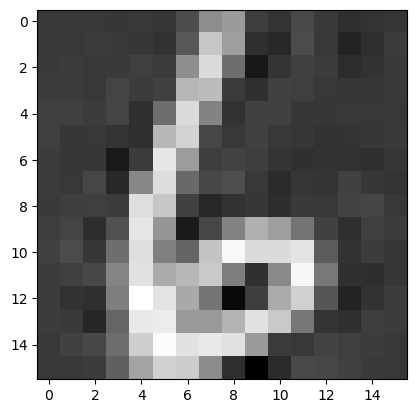

The reconstruction of digit 6 adding  49  principal components


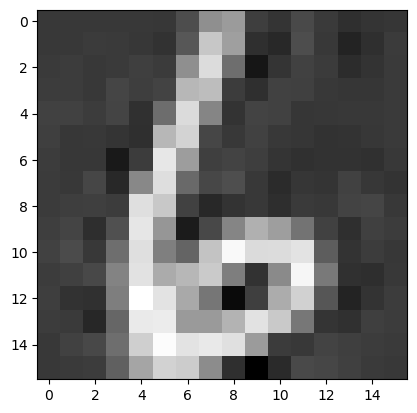

The reconstruction of digit 6 adding  50  principal components


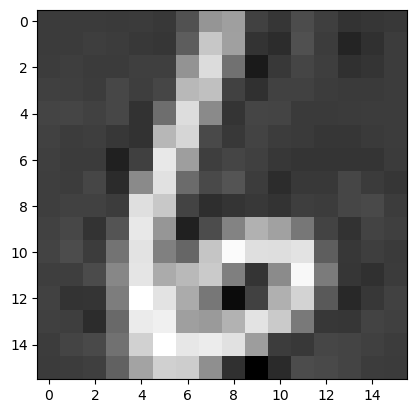

The reconstruction of digit 6 adding  51  principal components


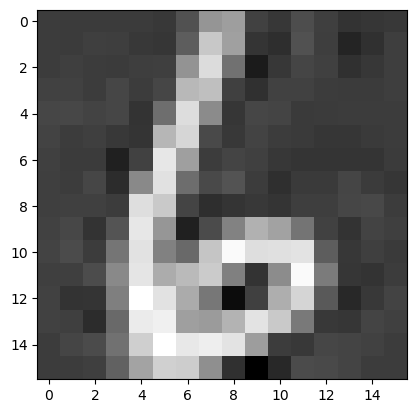

The reconstruction of digit 6 adding  52  principal components


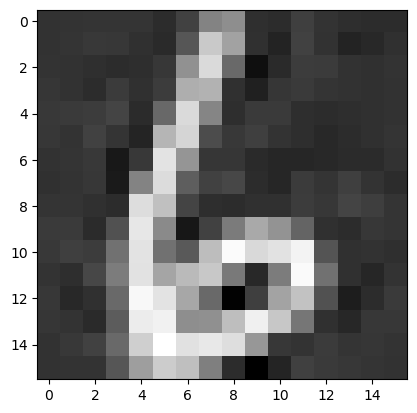

The reconstruction of digit 6 adding  53  principal components


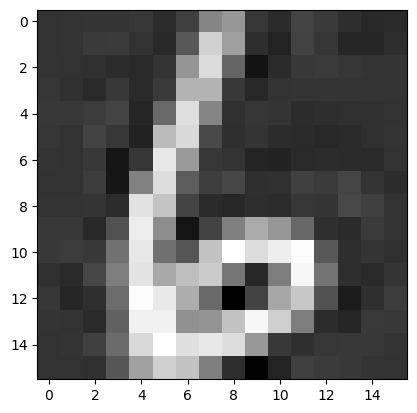

The reconstruction of digit 6 adding  54  principal components


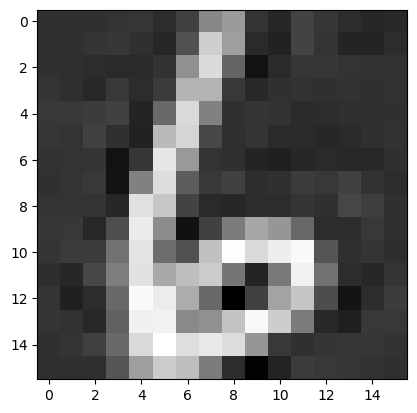

The reconstruction of digit 6 adding  55  principal components


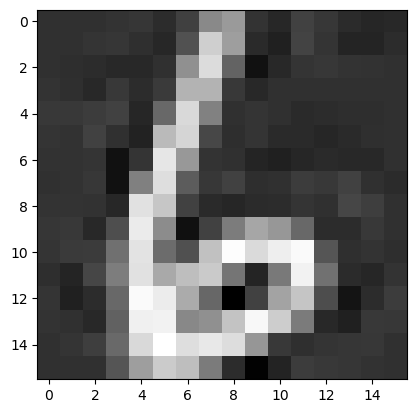

The reconstruction of digit 6 adding  56  principal components


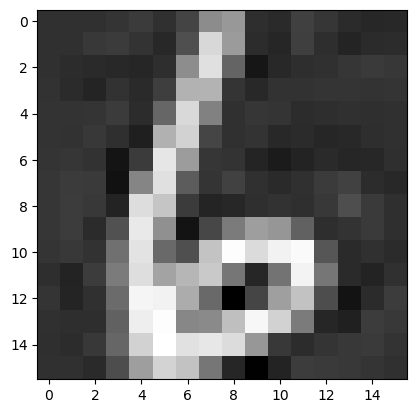

The reconstruction of digit 6 adding  57  principal components


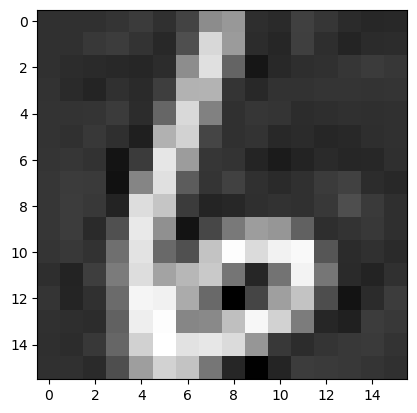

The reconstruction of digit 6 adding  58  principal components


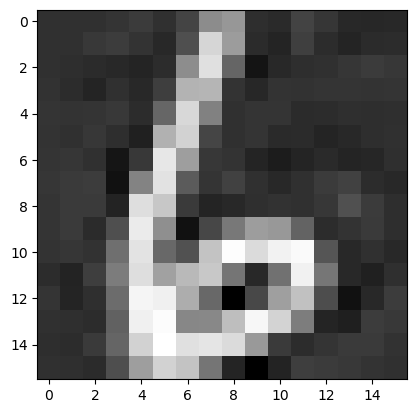

The reconstruction of digit 6 adding  59  principal components


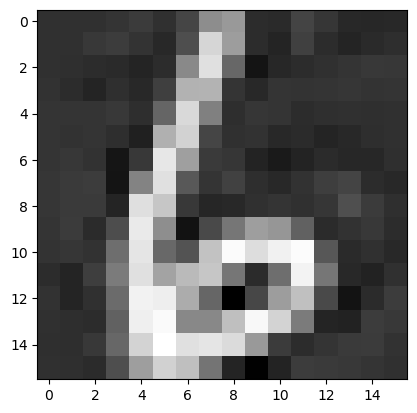

The reconstruction of digit 6 adding  60  principal components


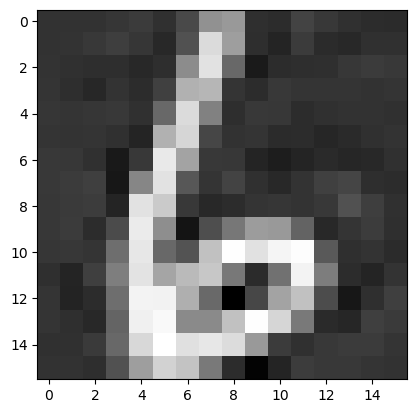

The reconstruction of digit 6 adding  61  principal components


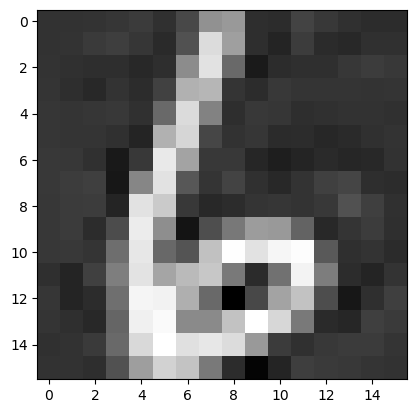

The reconstruction of digit 6 adding  62  principal components


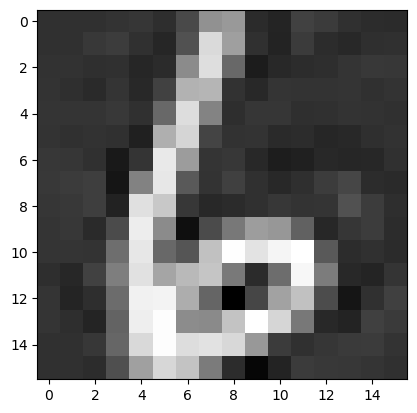

The reconstruction of digit 6 adding  63  principal components


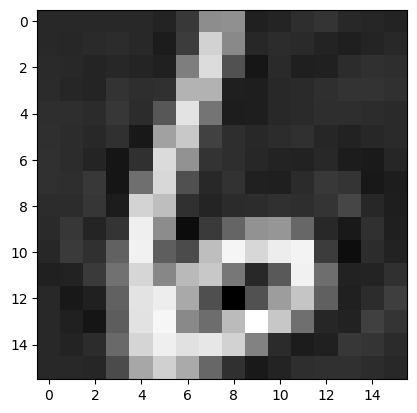

The reconstruction of digit 6 adding  64  principal components


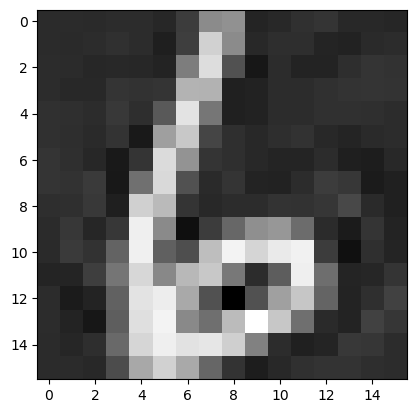

The reconstruction of digit 6 adding  65  principal components


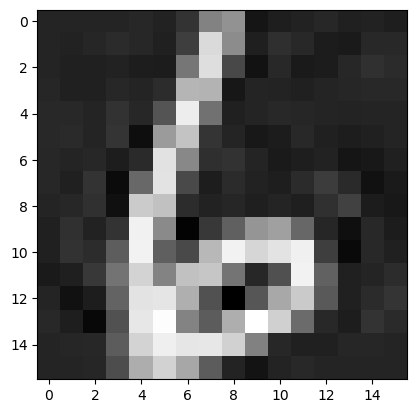

The reconstruction of digit 6 adding  66  principal components


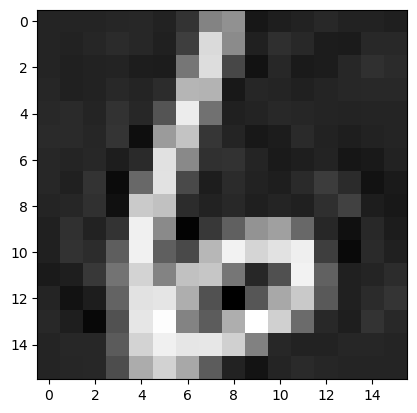

The reconstruction of digit 6 adding  67  principal components


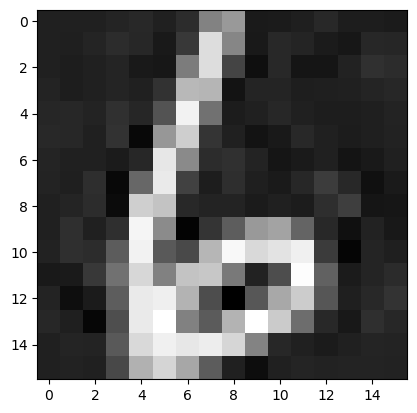

The reconstruction of digit 6 adding  68  principal components


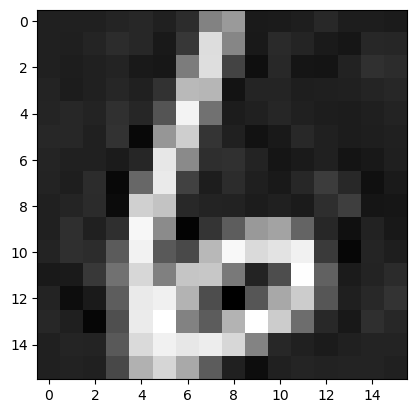

The reconstruction of digit 6 adding  69  principal components


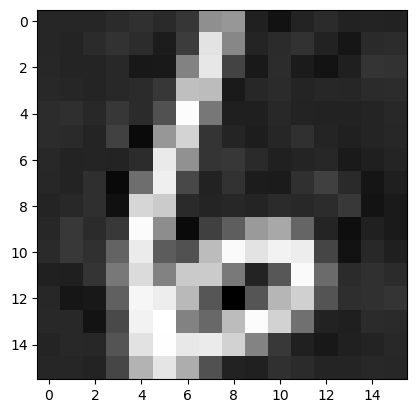

The reconstruction of digit 6 adding  70  principal components


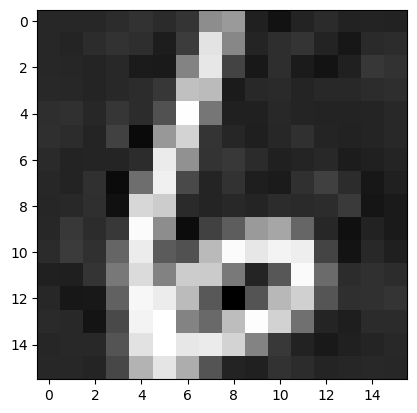

The reconstruction of digit 6 adding  71  principal components


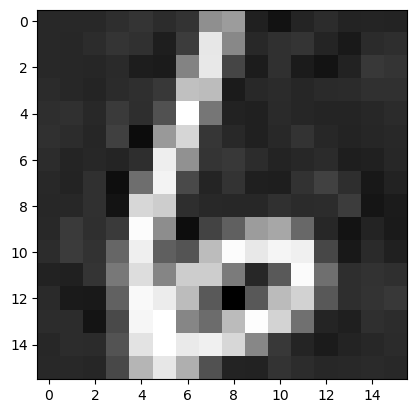

The reconstruction of digit 6 adding  72  principal components


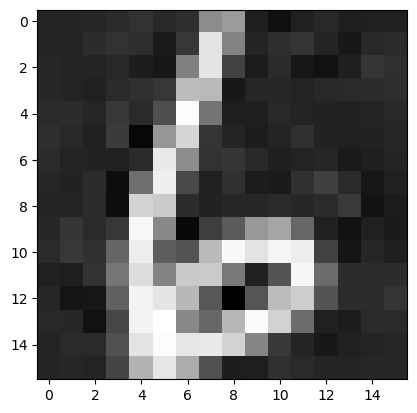

The reconstruction of digit 6 adding  73  principal components


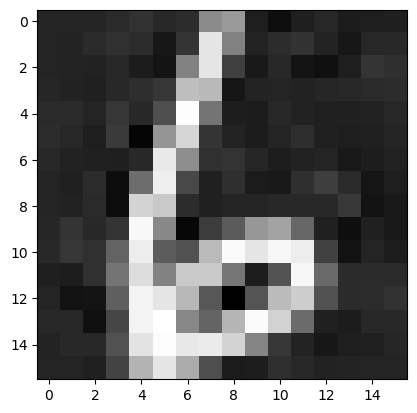

The reconstruction of digit 6 adding  74  principal components


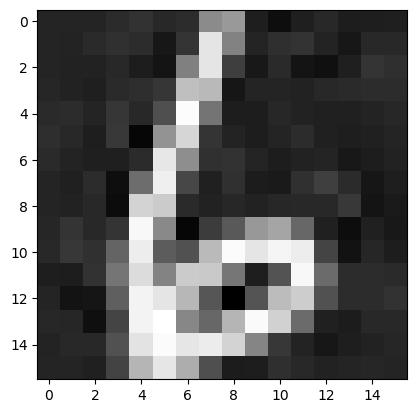

The reconstruction of digit 6 adding  75  principal components


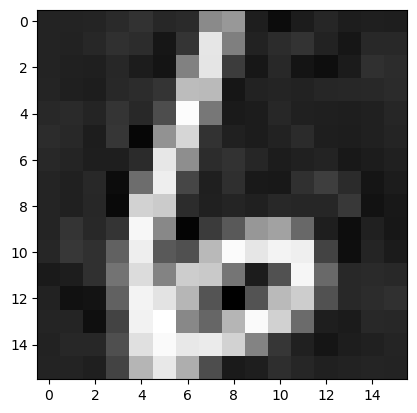

The reconstruction of digit 6 adding  76  principal components


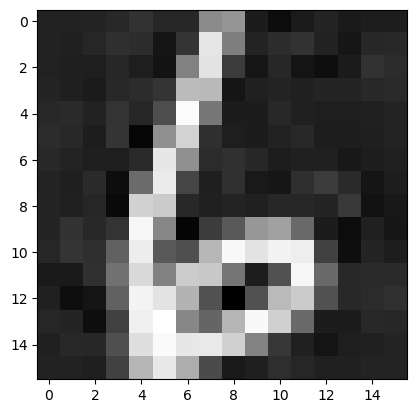

The reconstruction of digit 6 adding  77  principal components


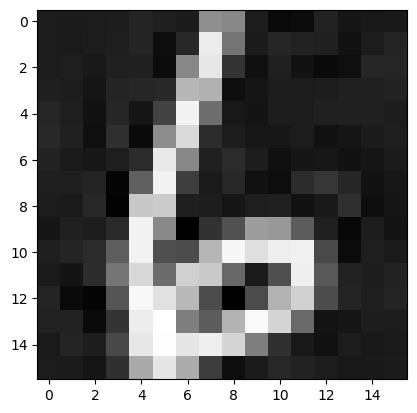

The reconstruction of digit 6 adding  78  principal components


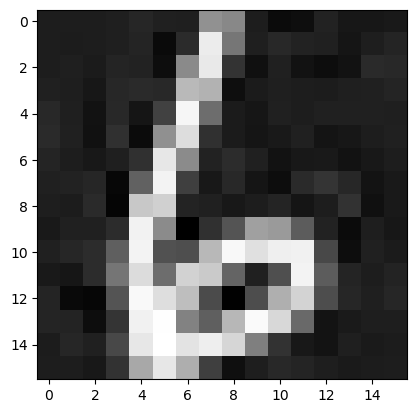

The reconstruction of digit 6 adding  79  principal components


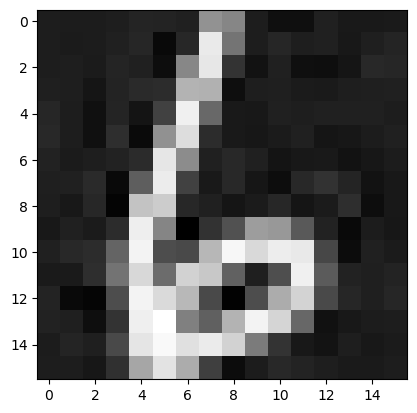

The reconstruction of digit 6 adding  80  principal components


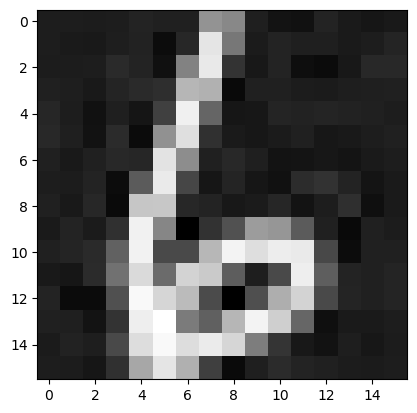

The reconstruction of digit 6 adding  81  principal components


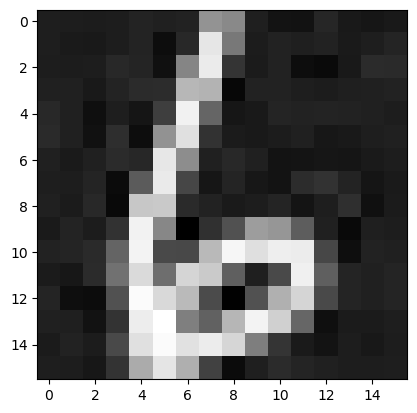

The reconstruction of digit 6 adding  82  principal components


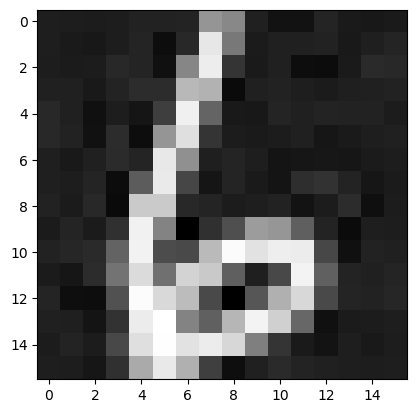

The reconstruction of digit 6 adding  83  principal components


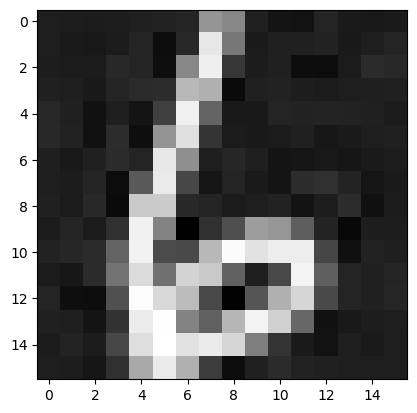

The reconstruction of digit 6 adding  84  principal components


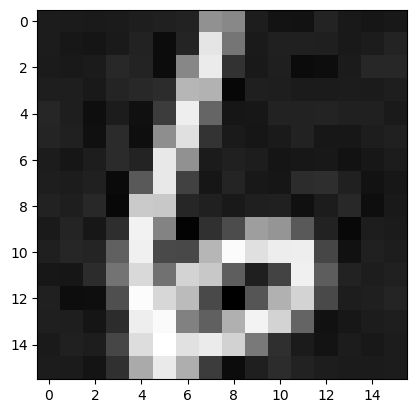

The reconstruction of digit 6 adding  85  principal components


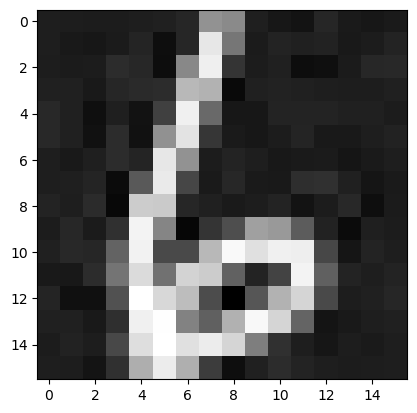

The reconstruction of digit 6 adding  86  principal components


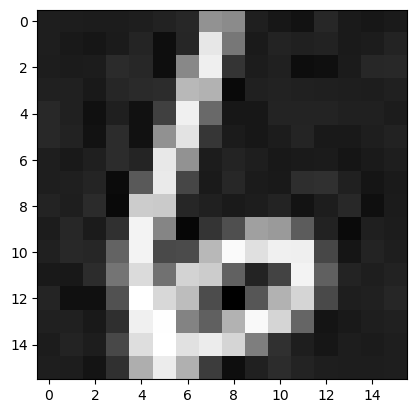

The reconstruction of digit 6 adding  87  principal components


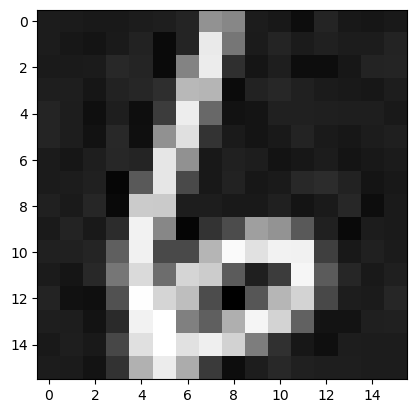

The reconstruction of digit 6 adding  88  principal components


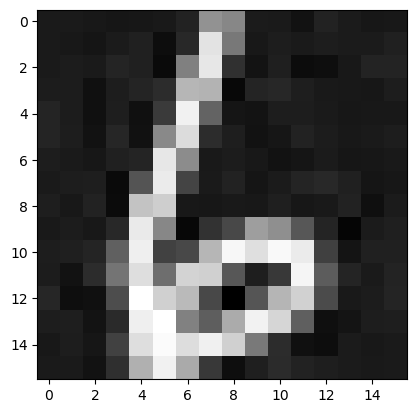

The reconstruction of digit 6 adding  89  principal components


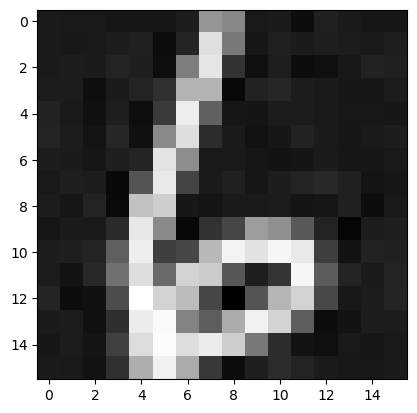

The reconstruction of digit 6 adding  90  principal components


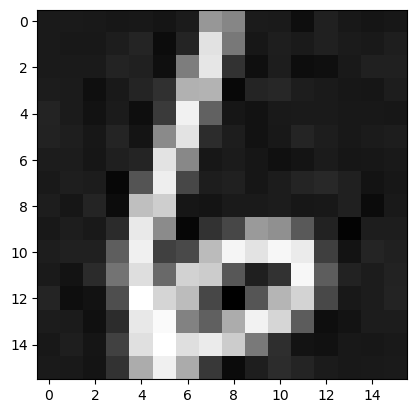

The reconstruction of digit 6 adding  91  principal components


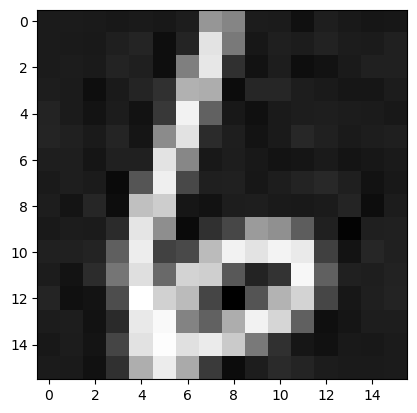

The reconstruction of digit 6 adding  92  principal components


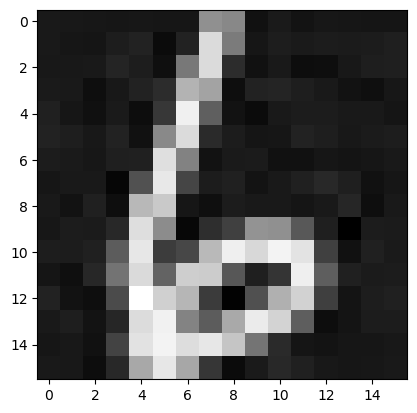

The reconstruction of digit 6 adding  93  principal components


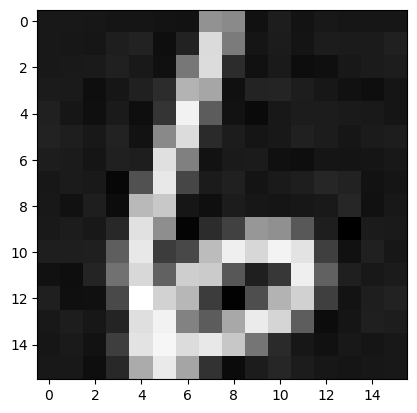

The reconstruction of digit 6 adding  94  principal components


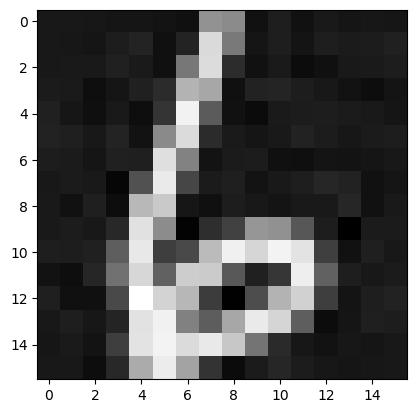

The reconstruction of digit 6 adding  95  principal components


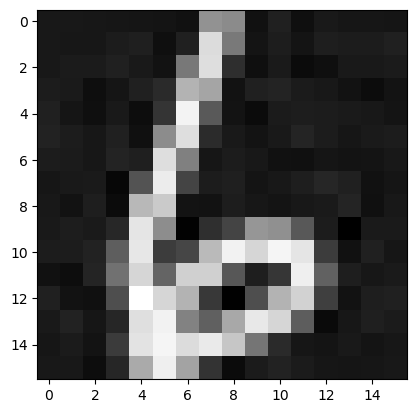

The reconstruction of digit 6 adding  96  principal components


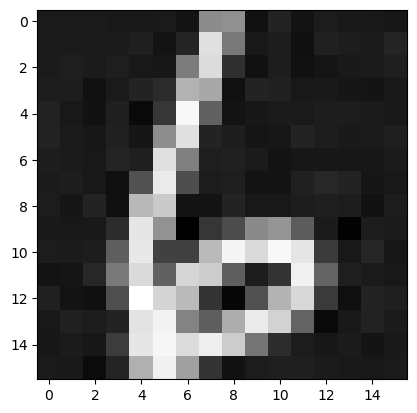

The reconstruction of digit 6 adding  97  principal components


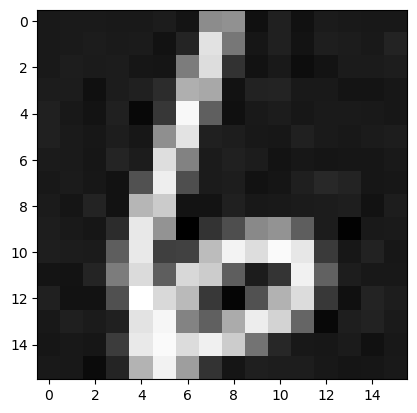

The reconstruction of digit 6 adding  98  principal components


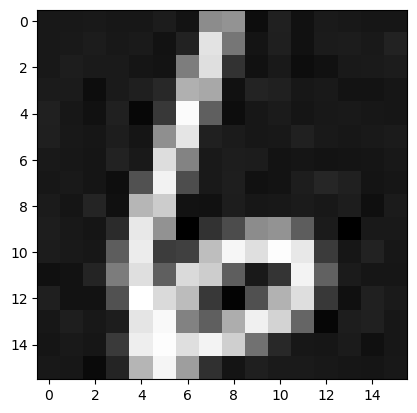

The reconstruction of digit 6 adding  99  principal components


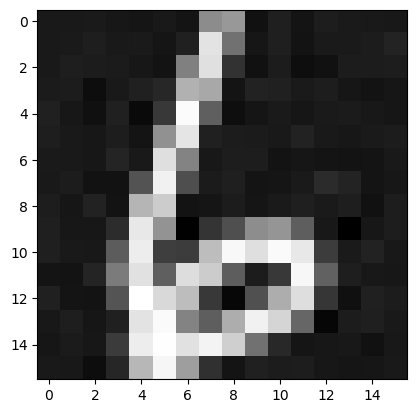

The reconstruction of digit 6 adding  100  principal components


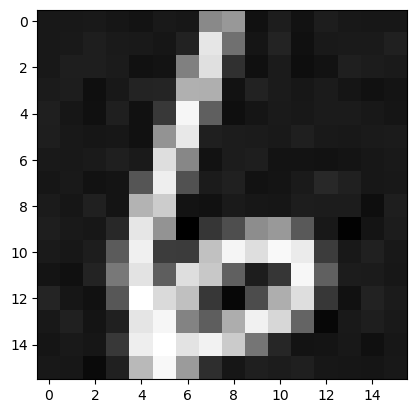

The reconstruction of digit 6 adding  101  principal components


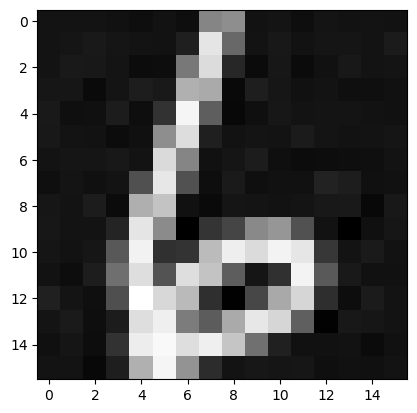

The reconstruction of digit 6 adding  102  principal components


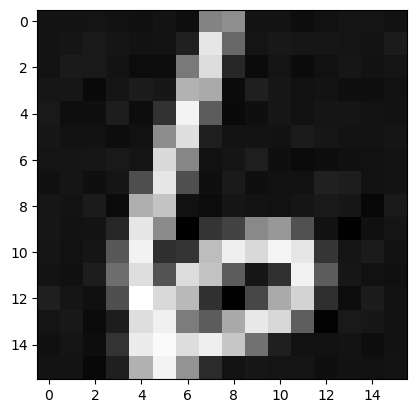

The reconstruction of digit 6 adding  103  principal components


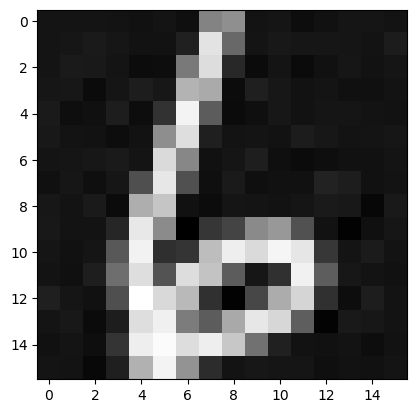

The reconstruction of digit 6 adding  104  principal components


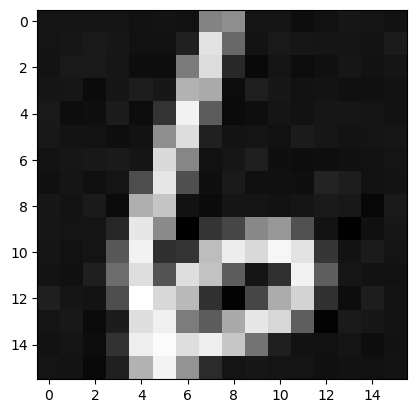

The reconstruction of digit 6 adding  105  principal components


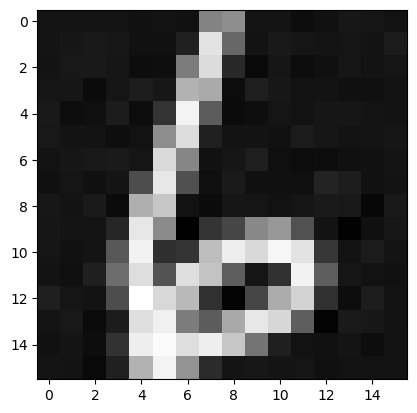

The reconstruction of digit 6 adding  106  principal components


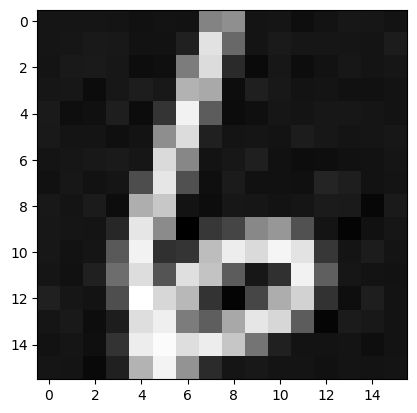

The reconstruction of digit 6 adding  107  principal components


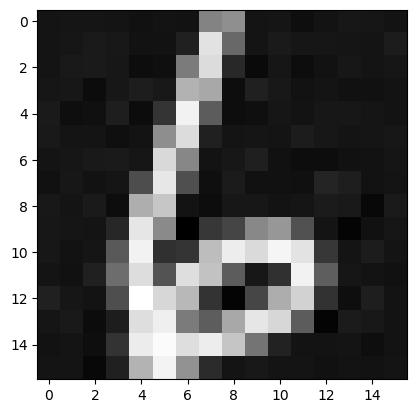

The reconstruction of digit 6 adding  108  principal components


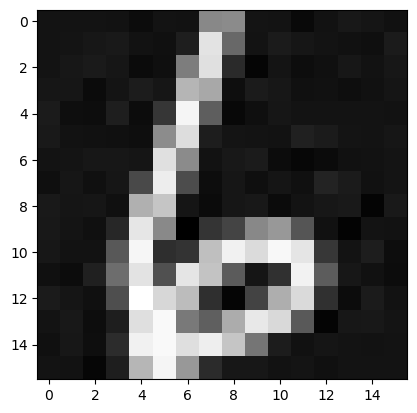

The reconstruction of digit 6 adding  109  principal components


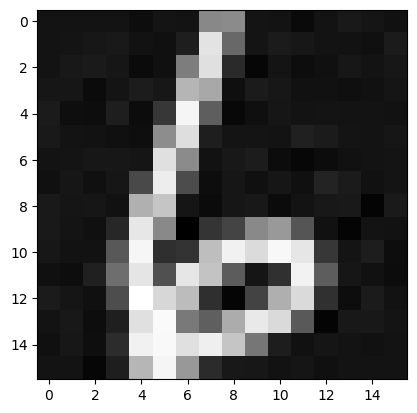

The reconstruction of digit 6 adding  110  principal components


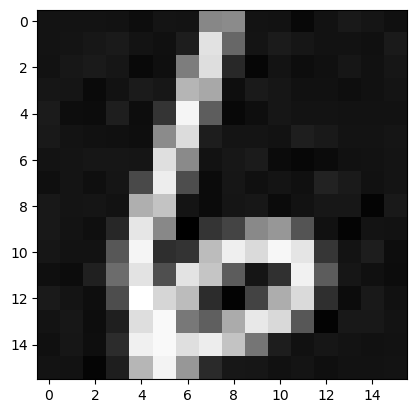

The reconstruction of digit 6 adding  111  principal components


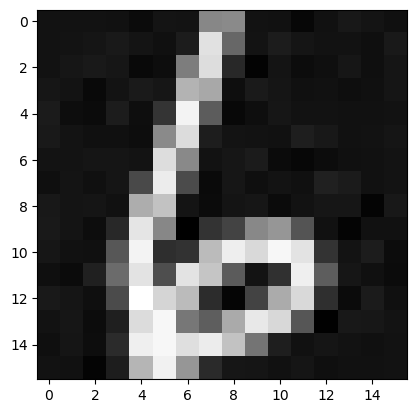

The reconstruction of digit 6 adding  112  principal components


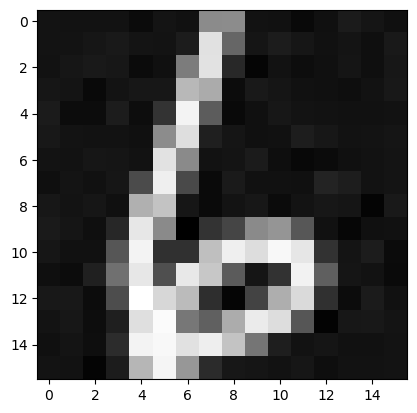

The reconstruction of digit 6 adding  113  principal components


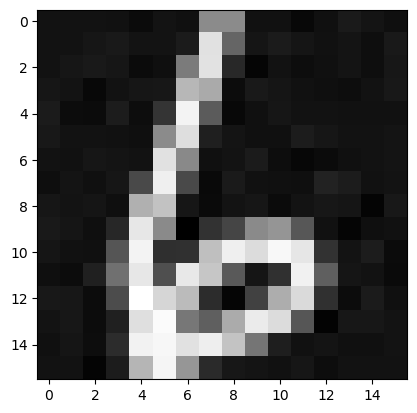

The reconstruction of digit 6 adding  114  principal components


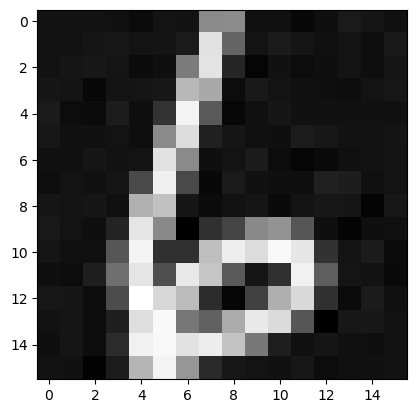

The reconstruction of digit 6 adding  115  principal components


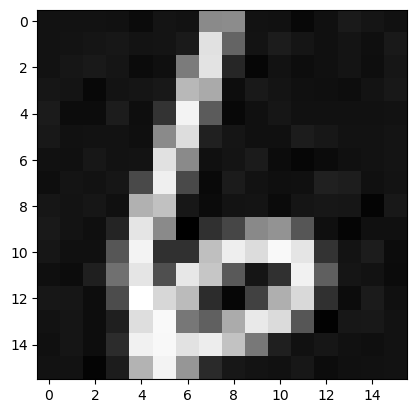

The reconstruction of digit 6 adding  116  principal components


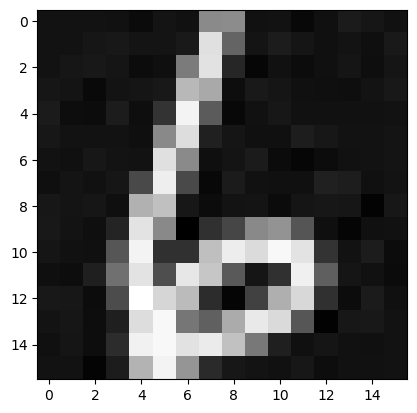

The reconstruction of digit 6 adding  117  principal components


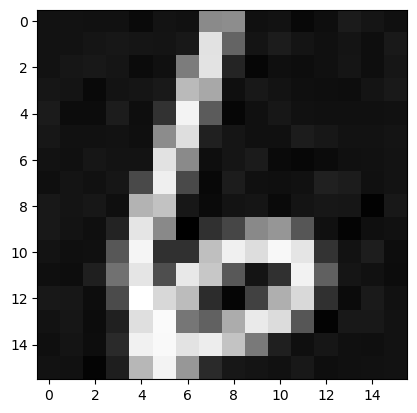

The reconstruction of digit 6 adding  118  principal components


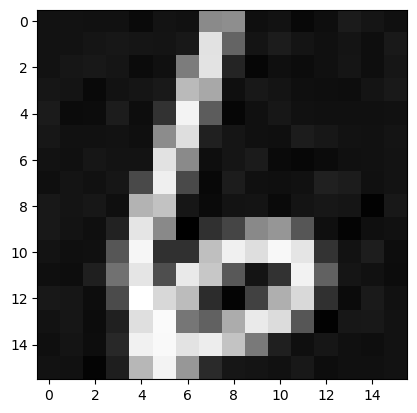

The reconstruction of digit 6 adding  119  principal components


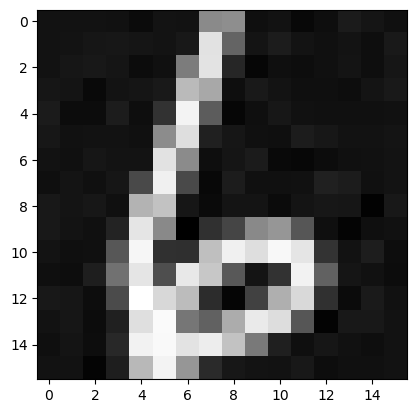

The reconstruction of digit 6 adding  120  principal components


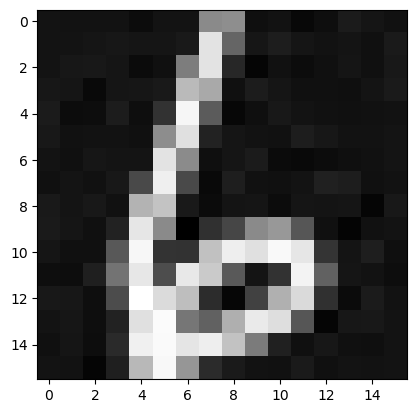

The reconstruction of digit 6 adding  121  principal components


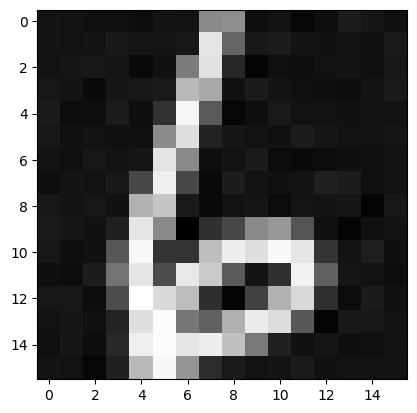

The reconstruction of digit 6 adding  122  principal components


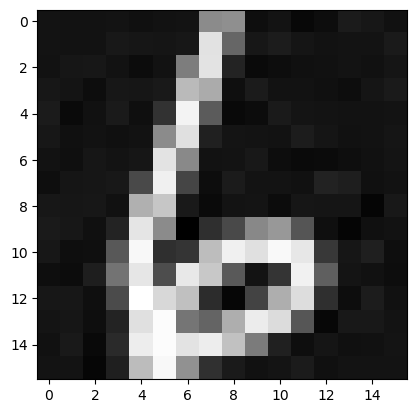

The reconstruction of digit 6 adding  123  principal components


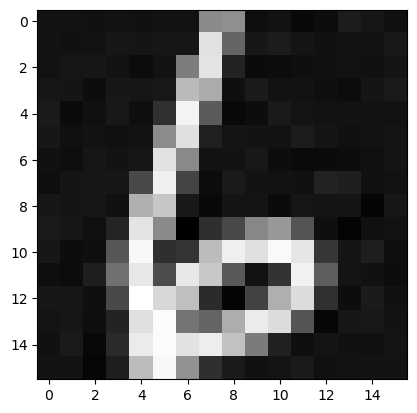

The reconstruction of digit 6 adding  124  principal components


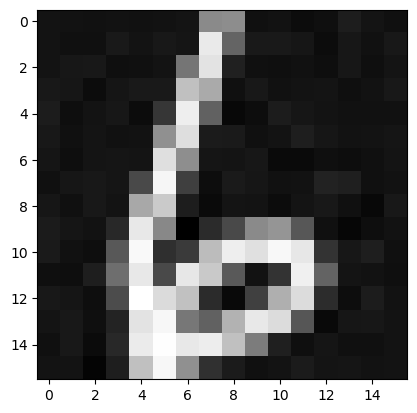

The reconstruction of digit 6 adding  125  principal components


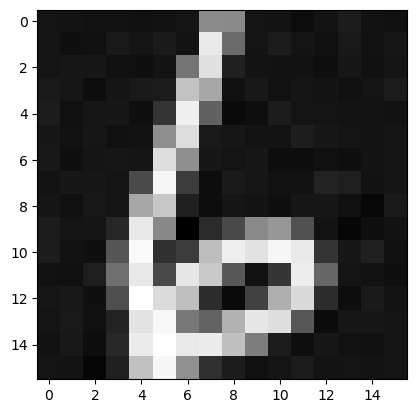

The reconstruction of digit 6 adding  126  principal components


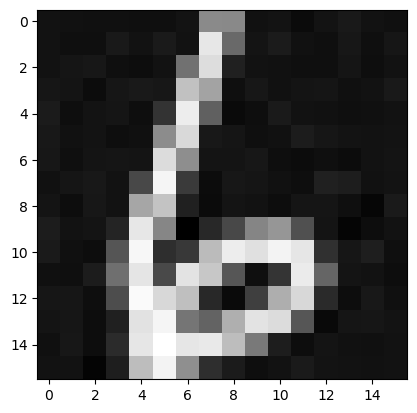

The reconstruction of digit 6 adding  127  principal components


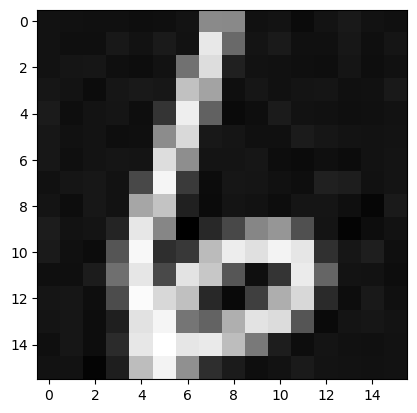

The reconstruction of digit 6 adding  128  principal components


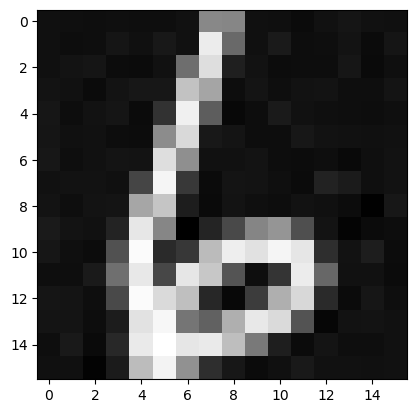

The reconstruction of digit 6 adding  129  principal components


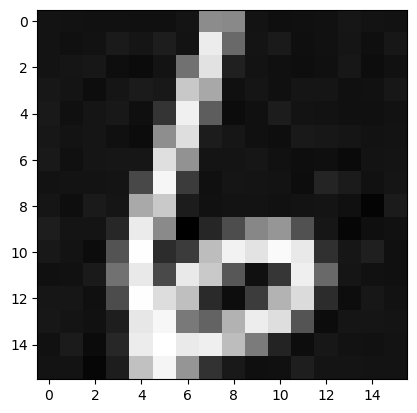

The reconstruction of digit 6 adding  130  principal components


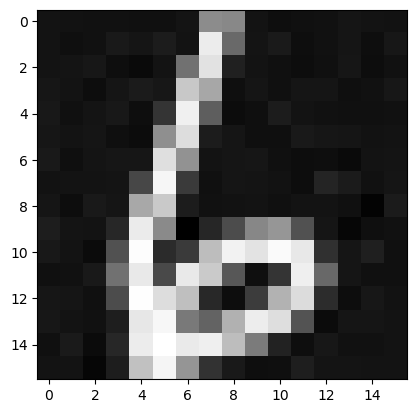

The reconstruction of digit 6 adding  131  principal components


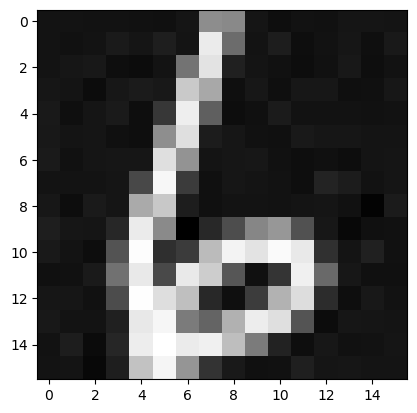

The reconstruction of digit 6 adding  132  principal components


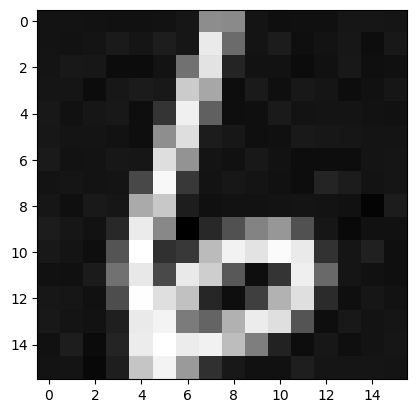

The reconstruction of digit 6 adding  133  principal components


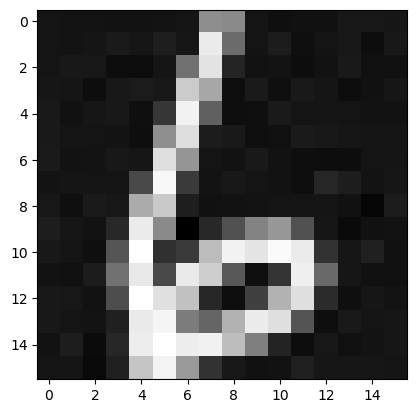

The reconstruction of digit 6 adding  134  principal components


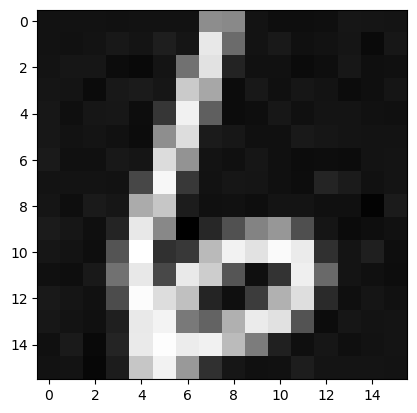

The reconstruction of digit 6 adding  135  principal components


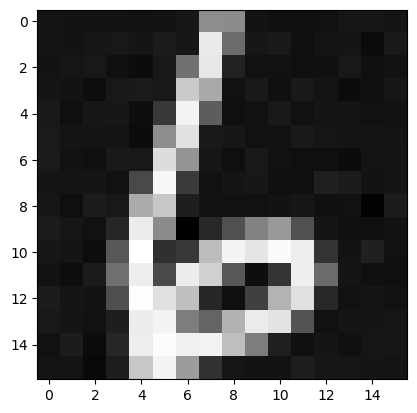

The reconstruction of digit 6 adding  136  principal components


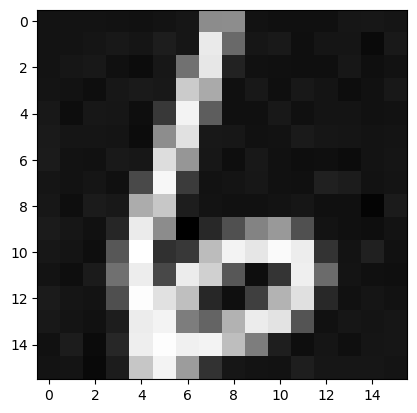

The reconstruction of digit 6 adding  137  principal components


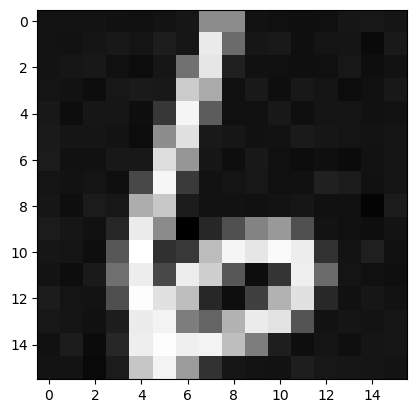

The reconstruction of digit 6 adding  138  principal components


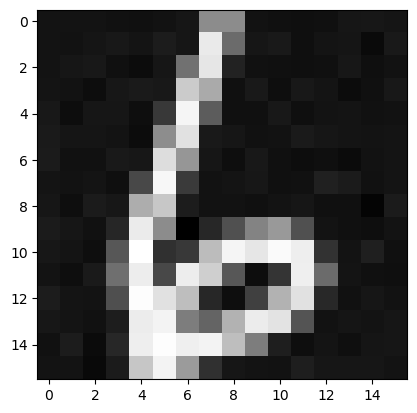

The reconstruction of digit 6 adding  139  principal components


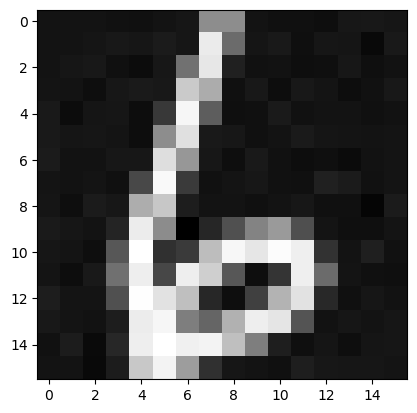

The reconstruction of digit 6 adding  140  principal components


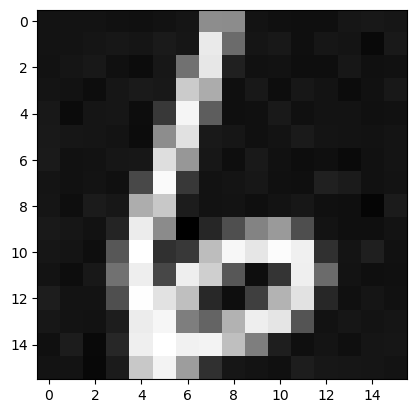

The reconstruction of digit 6 adding  141  principal components


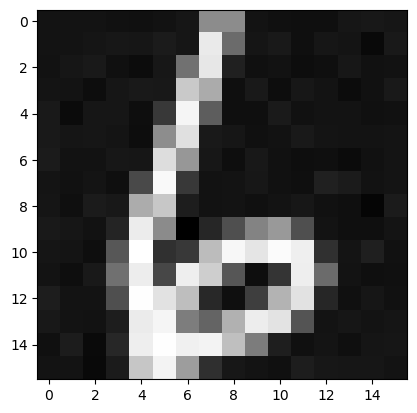

The reconstruction of digit 6 adding  142  principal components


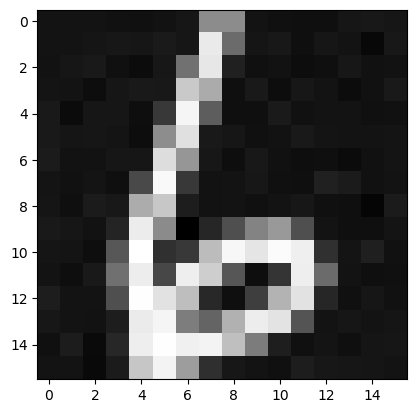

The reconstruction of digit 6 adding  143  principal components


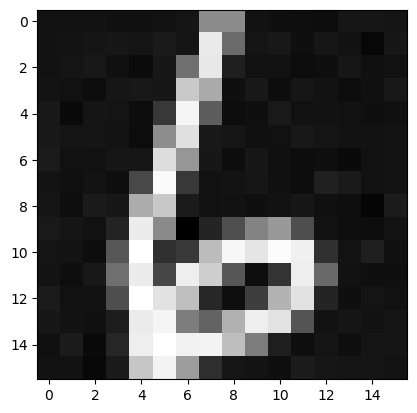

The reconstruction of digit 6 adding  144  principal components


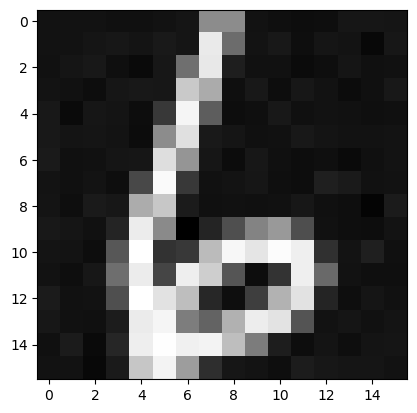

The reconstruction of digit 6 adding  145  principal components


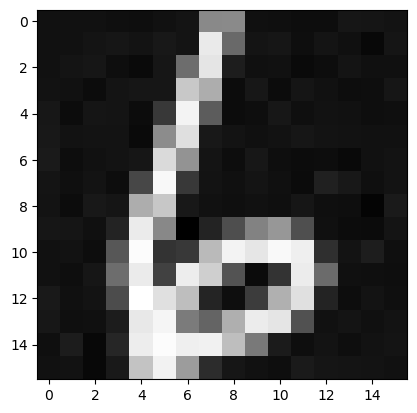

The reconstruction of digit 6 adding  146  principal components


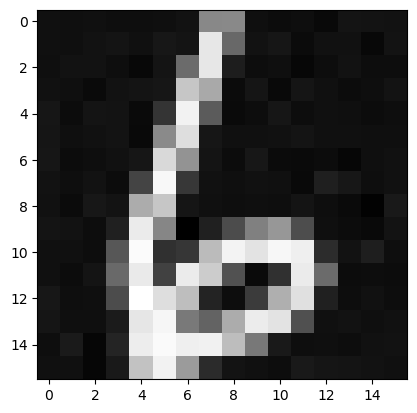

The reconstruction of digit 6 adding  147  principal components


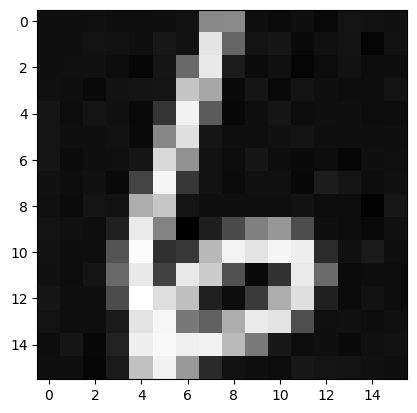

The reconstruction of digit 6 adding  148  principal components


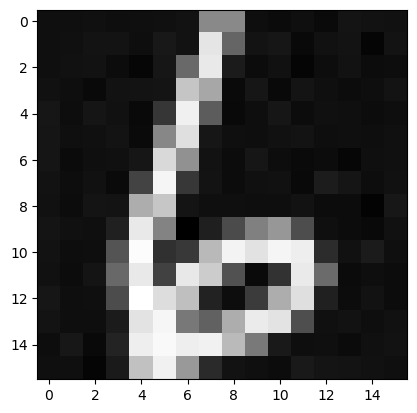

The reconstruction of digit 6 adding  149  principal components


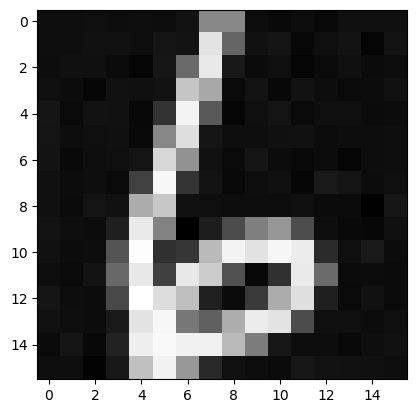

The reconstruction of digit 6 adding  150  principal components


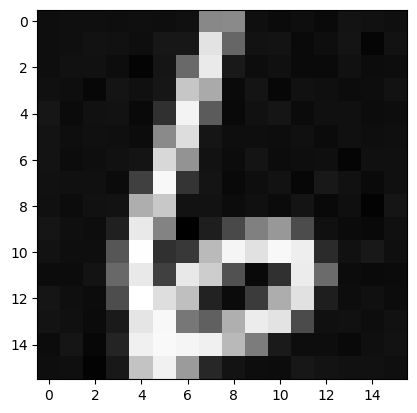

The reconstruction of digit 6 adding  151  principal components


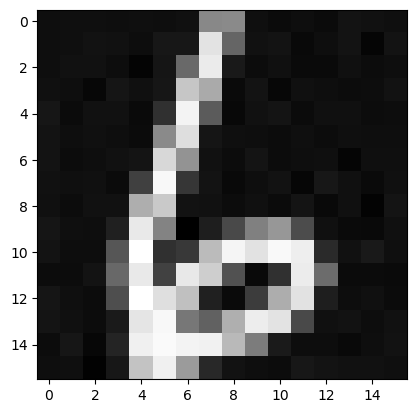

The reconstruction of digit 6 adding  152  principal components


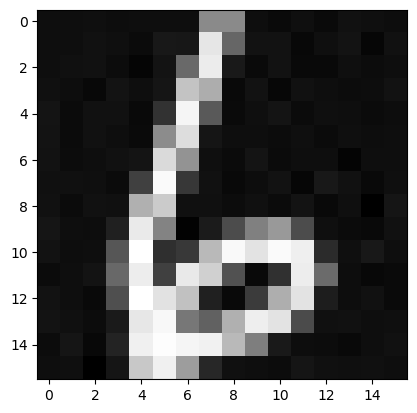

The reconstruction of digit 6 adding  153  principal components


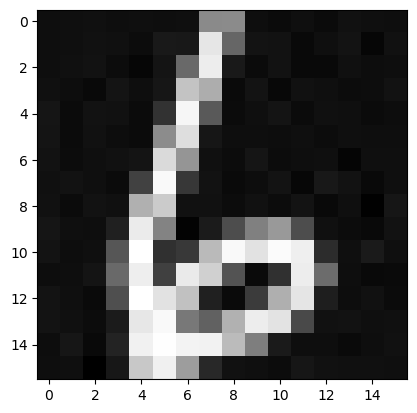

The reconstruction of digit 6 adding  154  principal components


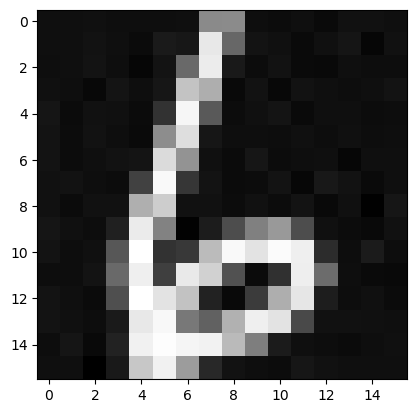

The reconstruction of digit 6 adding  155  principal components


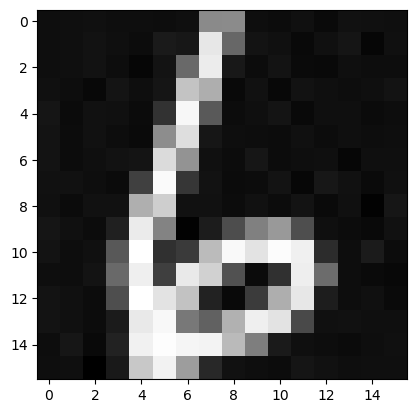

The reconstruction of digit 6 adding  156  principal components


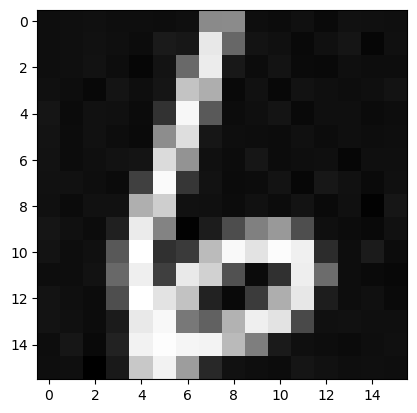

The reconstruction of digit 6 adding  157  principal components


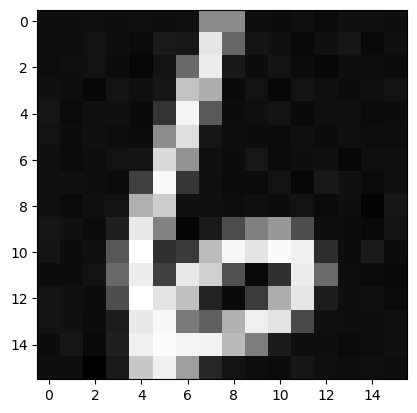

The reconstruction of digit 6 adding  158  principal components


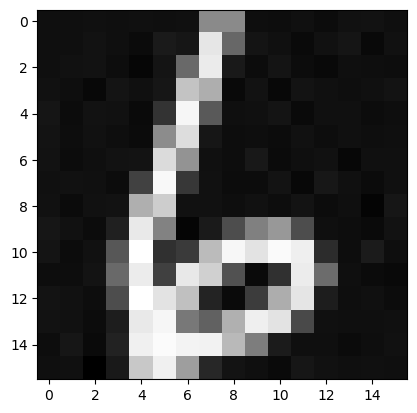

The reconstruction of digit 6 adding  159  principal components


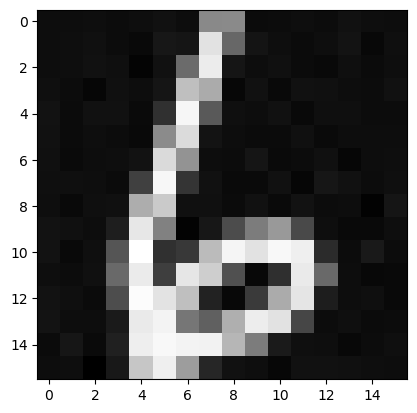

The reconstruction of digit 6 adding  160  principal components


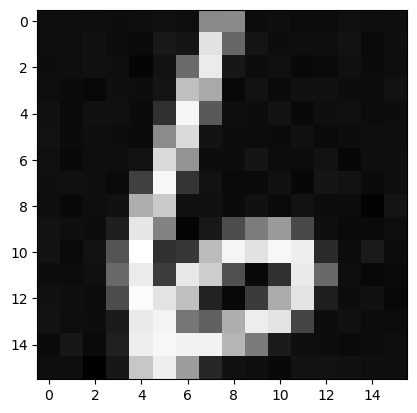

The reconstruction of digit 6 adding  161  principal components


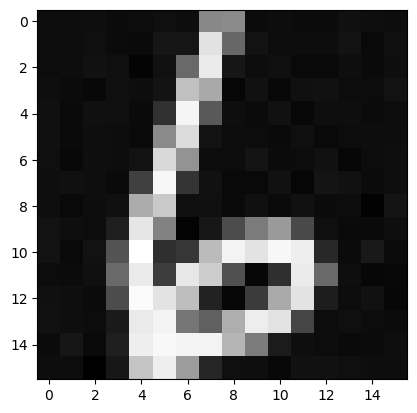

The reconstruction of digit 6 adding  162  principal components


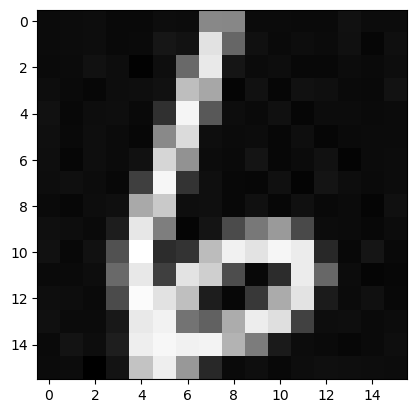

The reconstruction of digit 6 adding  163  principal components


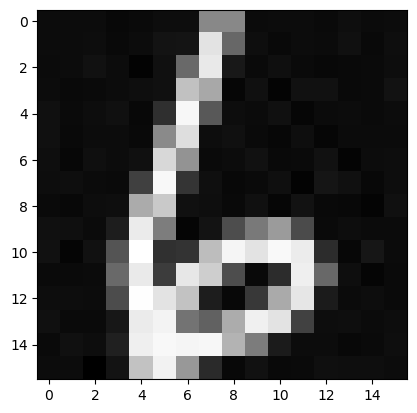

The reconstruction of digit 6 adding  164  principal components


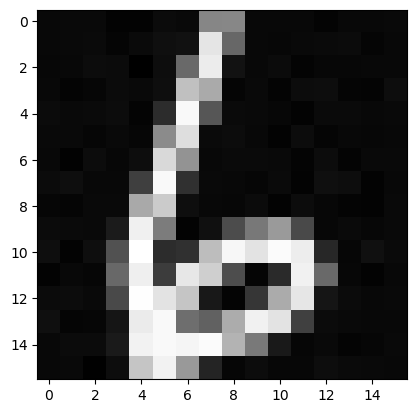

The reconstruction of digit 6 adding  165  principal components


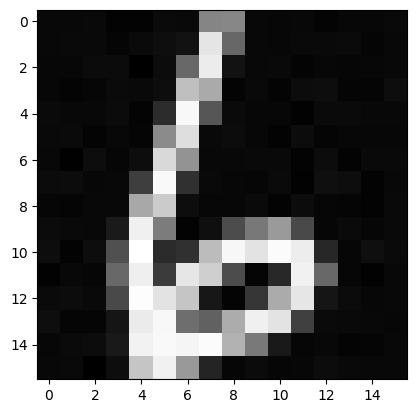

The reconstruction of digit 6 adding  166  principal components


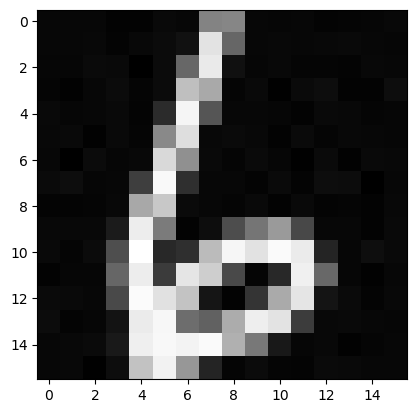

The reconstruction of digit 6 adding  167  principal components


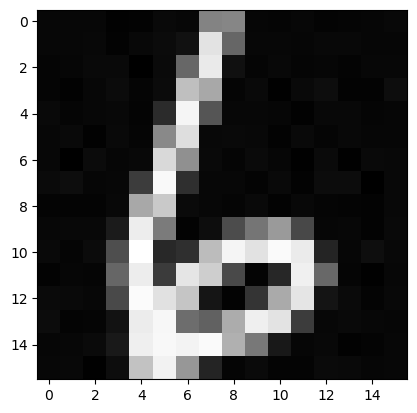

The reconstruction of digit 6 adding  168  principal components


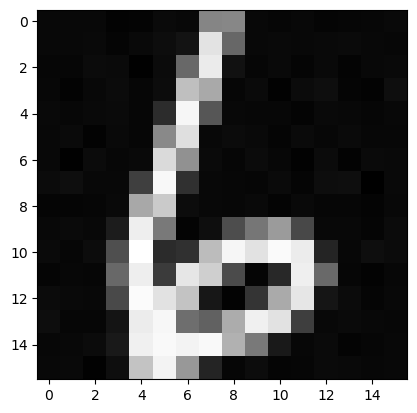

The reconstruction of digit 6 adding  169  principal components


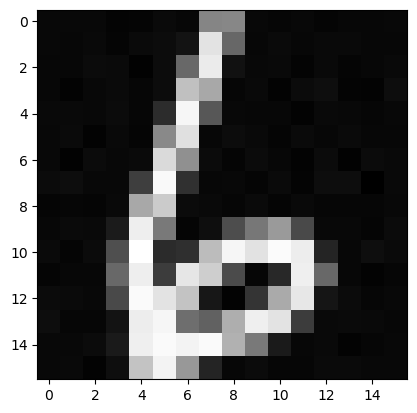

The reconstruction of digit 6 adding  170  principal components


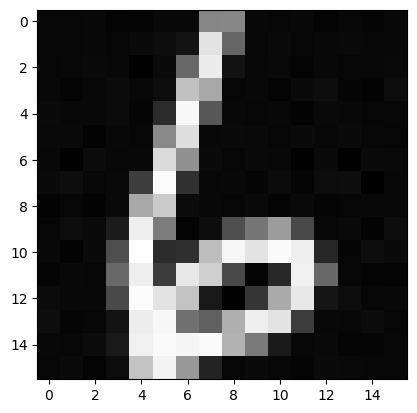

The reconstruction of digit 6 adding  171  principal components


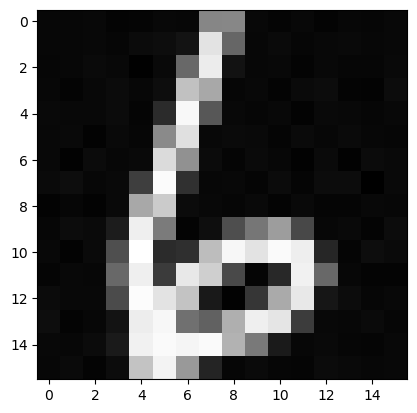

The reconstruction of digit 6 adding  172  principal components


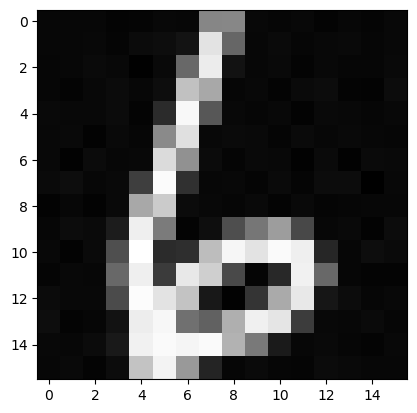

The reconstruction of digit 6 adding  173  principal components


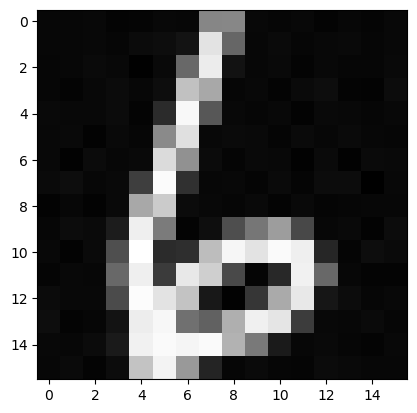

The reconstruction of digit 6 adding  174  principal components


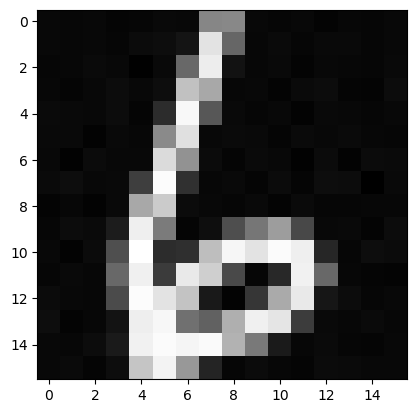

The reconstruction of digit 6 adding  175  principal components


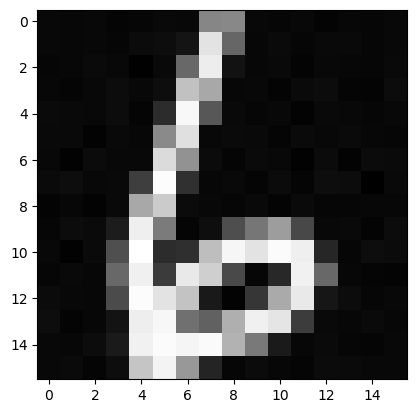

The reconstruction of digit 6 adding  176  principal components


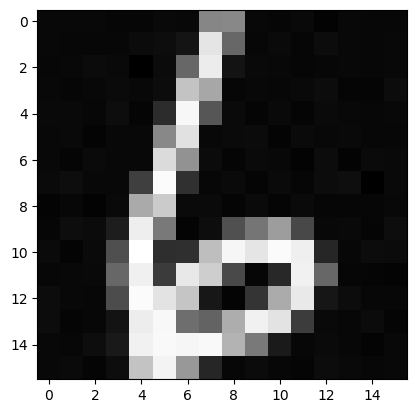

The reconstruction of digit 6 adding  177  principal components


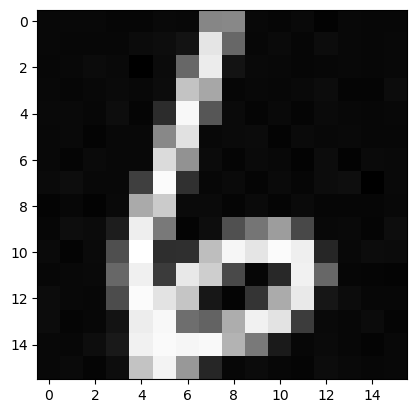

The reconstruction of digit 6 adding  178  principal components


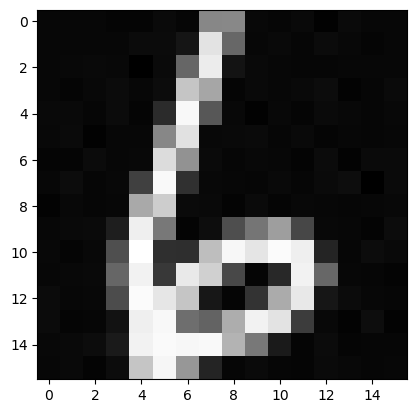

The reconstruction of digit 6 adding  179  principal components


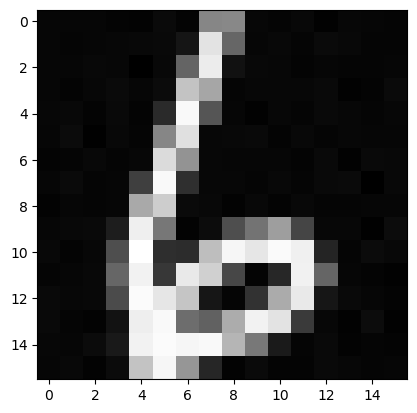

The reconstruction of digit 6 adding  180  principal components


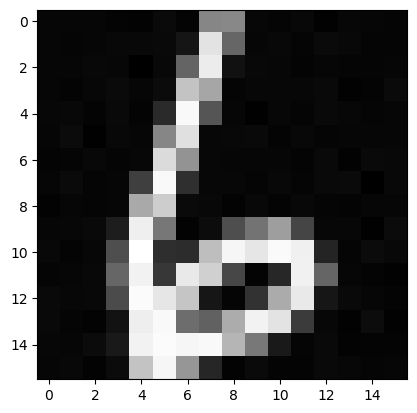

The reconstruction of digit 6 adding  181  principal components


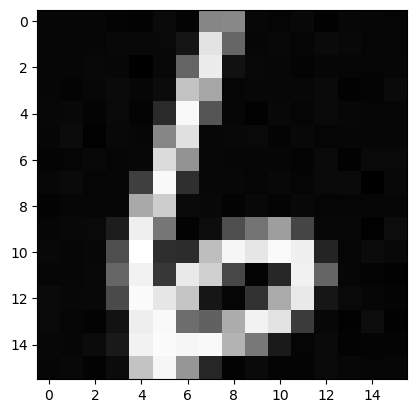

The reconstruction of digit 6 adding  182  principal components


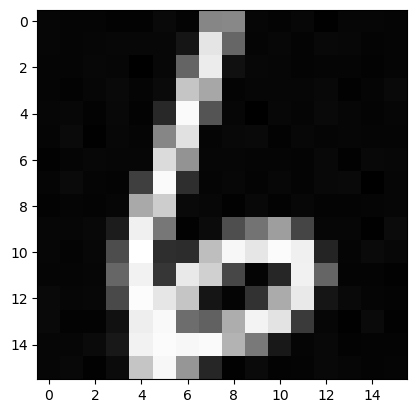

The reconstruction of digit 6 adding  183  principal components


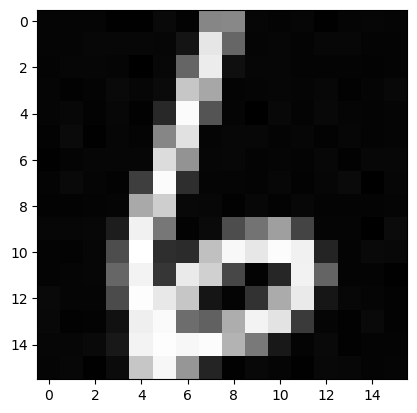

The reconstruction of digit 6 adding  184  principal components


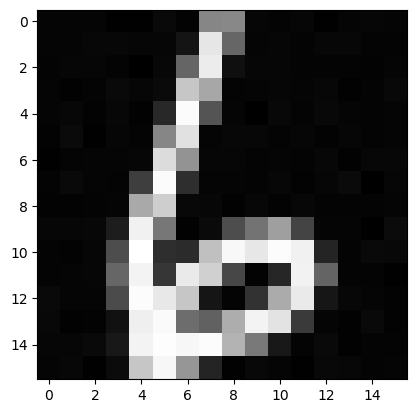

The reconstruction of digit 6 adding  185  principal components


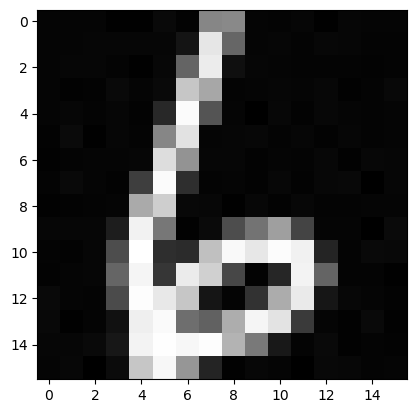

The reconstruction of digit 6 adding  186  principal components


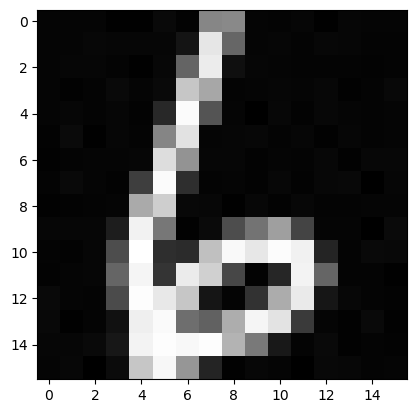

The reconstruction of digit 6 adding  187  principal components


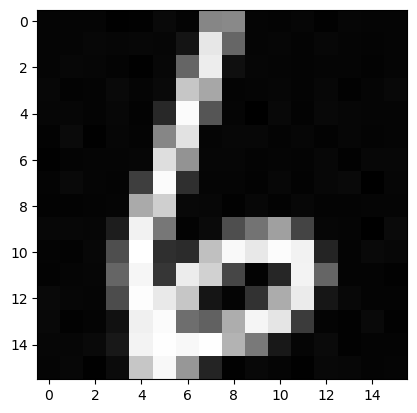

The reconstruction of digit 6 adding  188  principal components


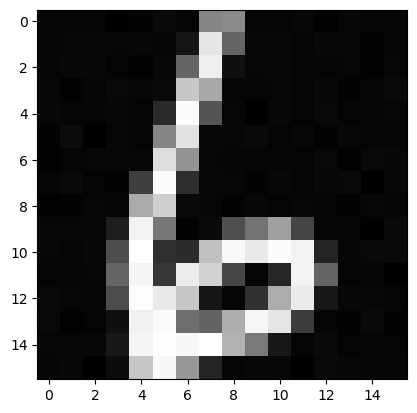

The reconstruction of digit 6 adding  189  principal components


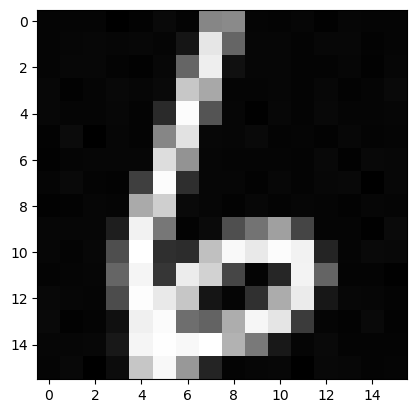

The reconstruction of digit 6 adding  190  principal components


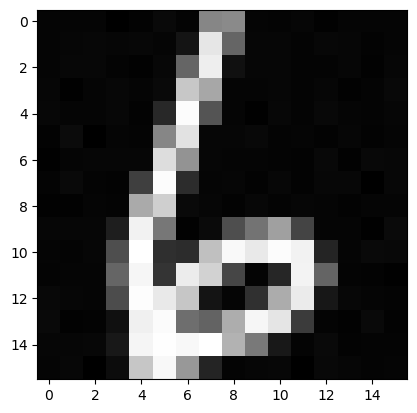

The reconstruction of digit 6 adding  191  principal components


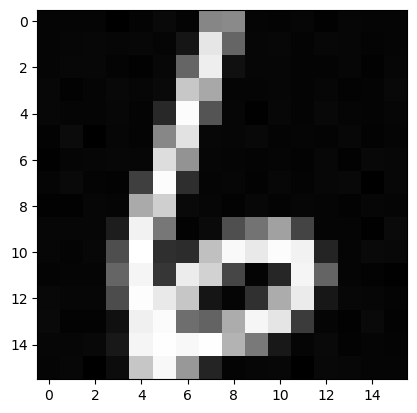

The reconstruction of digit 6 adding  192  principal components


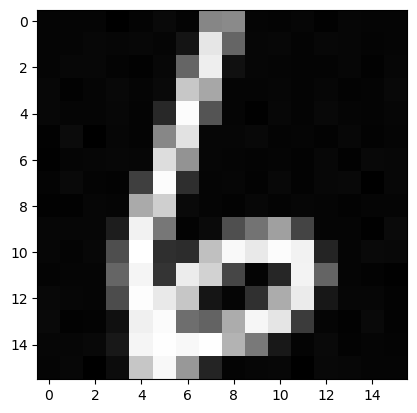

The reconstruction of digit 6 adding  193  principal components


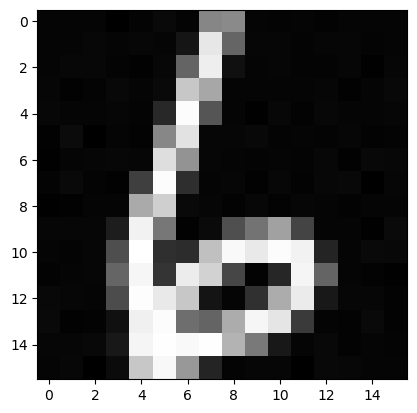

The reconstruction of digit 6 adding  194  principal components


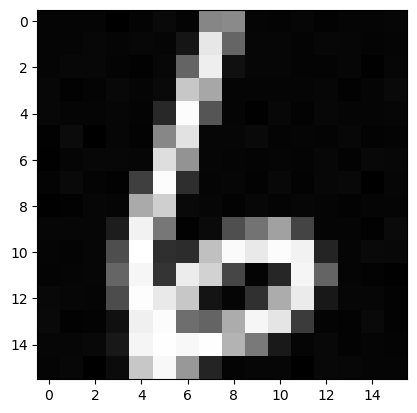

The reconstruction of digit 6 adding  195  principal components


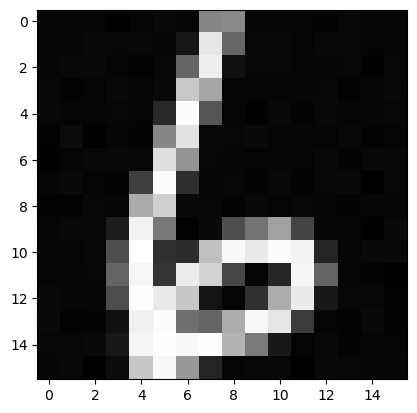

The reconstruction of digit 6 adding  196  principal components


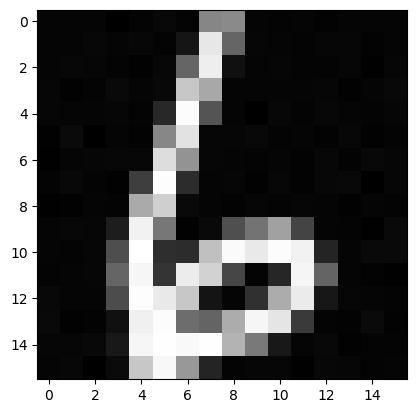

The reconstruction of digit 6 adding  197  principal components


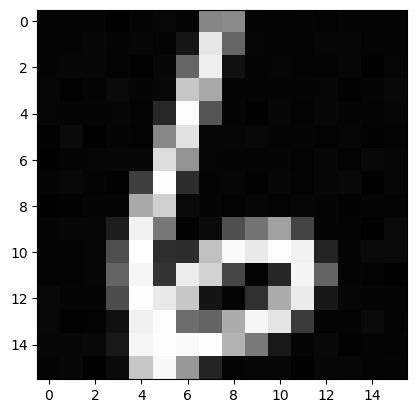

The reconstruction of digit 6 adding  198  principal components


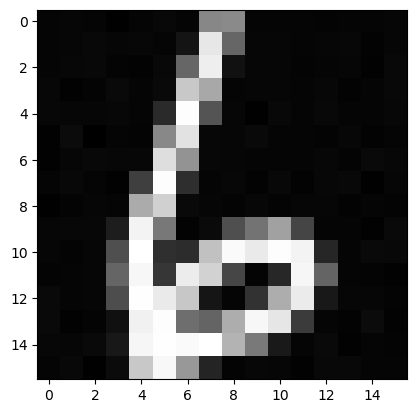

The reconstruction of digit 6 adding  199  principal components


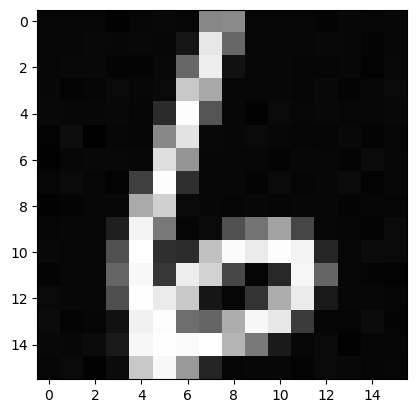

The reconstruction of digit 6 adding  200  principal components


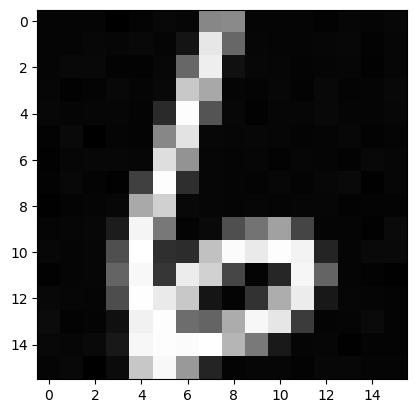

The reconstruction of digit 6 adding  201  principal components


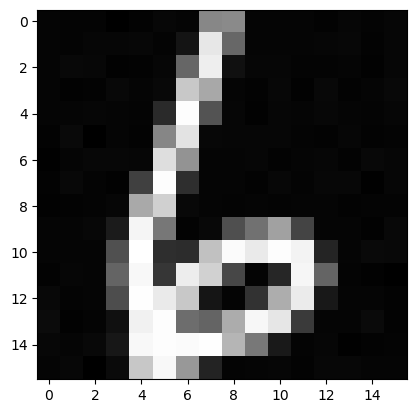

The reconstruction of digit 6 adding  202  principal components


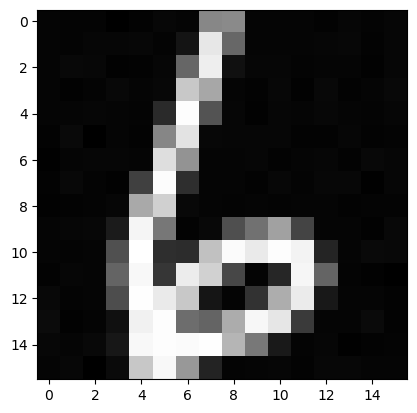

The reconstruction of digit 6 adding  203  principal components


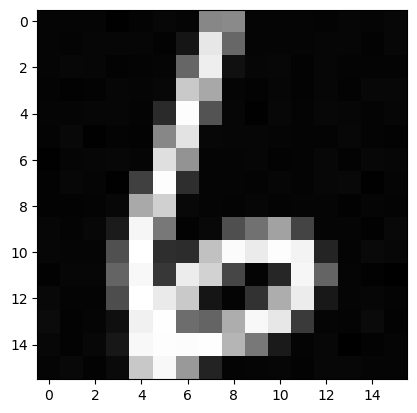

The reconstruction of digit 6 adding  204  principal components


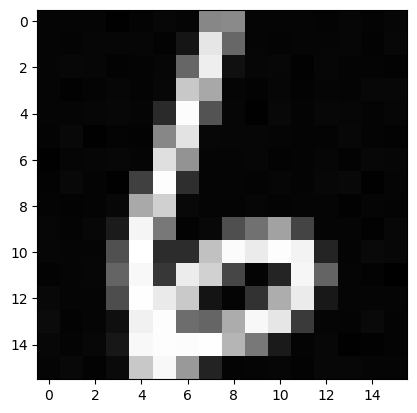

The reconstruction of digit 6 adding  205  principal components


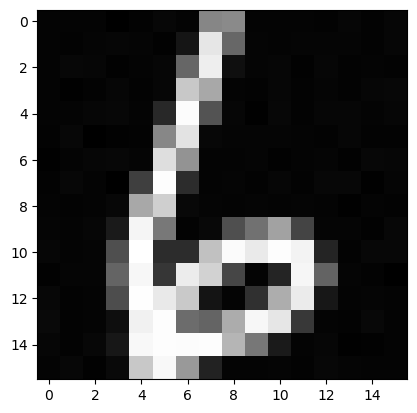

The reconstruction of digit 6 adding  206  principal components


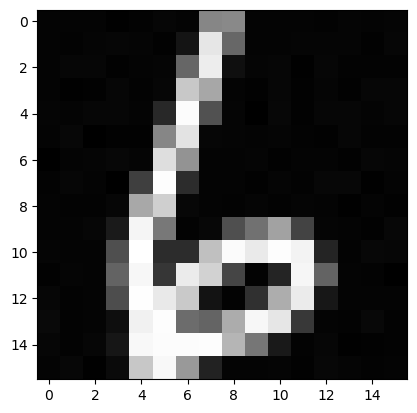

The reconstruction of digit 6 adding  207  principal components


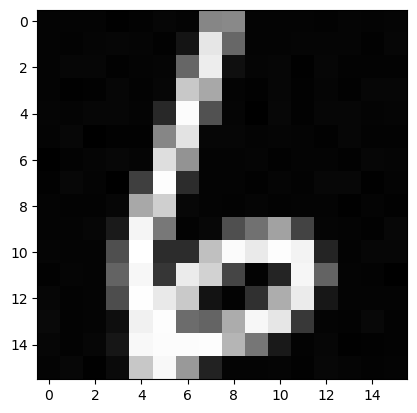

The reconstruction of digit 6 adding  208  principal components


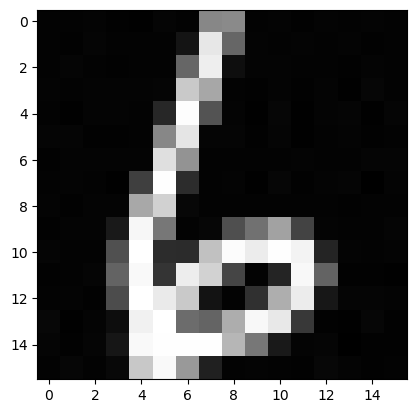

The reconstruction of digit 6 adding  209  principal components


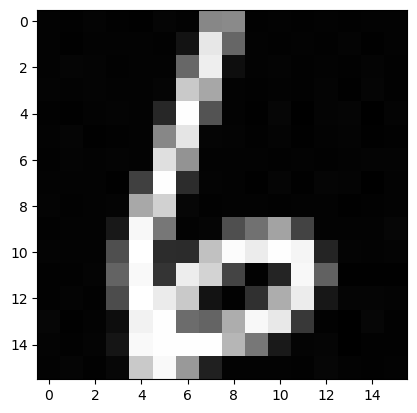

The reconstruction of digit 6 adding  210  principal components


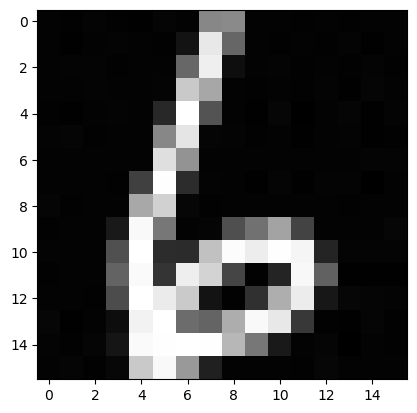

The reconstruction of digit 6 adding  211  principal components


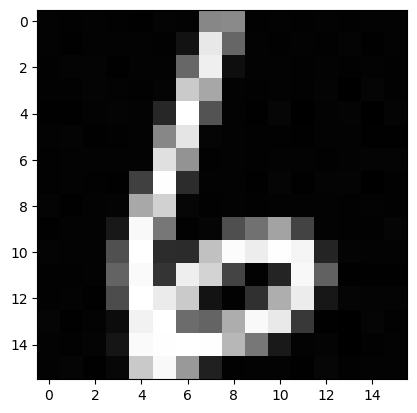

The reconstruction of digit 6 adding  212  principal components


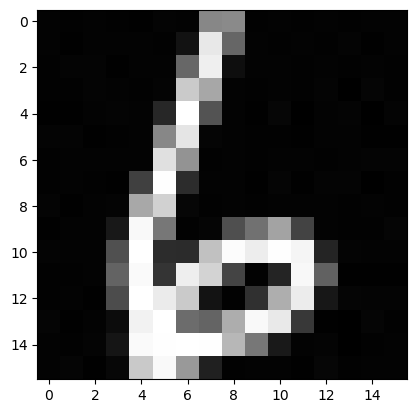

The reconstruction of digit 6 adding  213  principal components


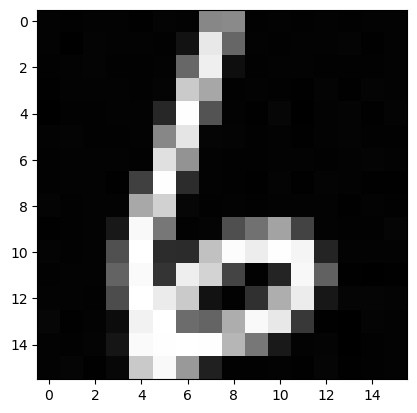

The reconstruction of digit 6 adding  214  principal components


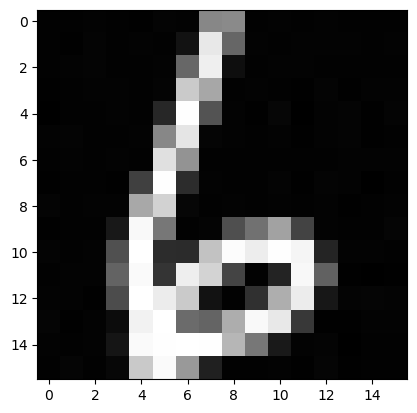

The reconstruction of digit 6 adding  215  principal components


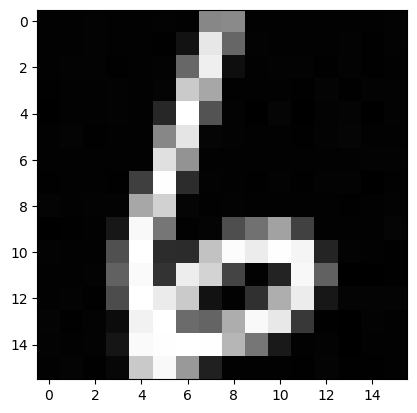

The reconstruction of digit 6 adding  216  principal components


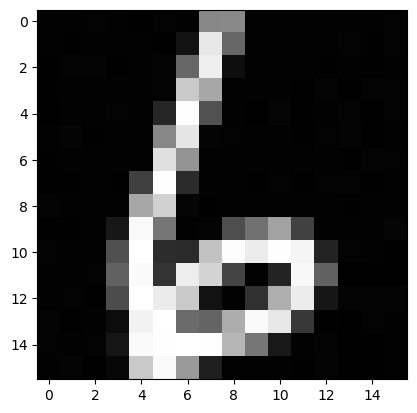

The reconstruction of digit 6 adding  217  principal components


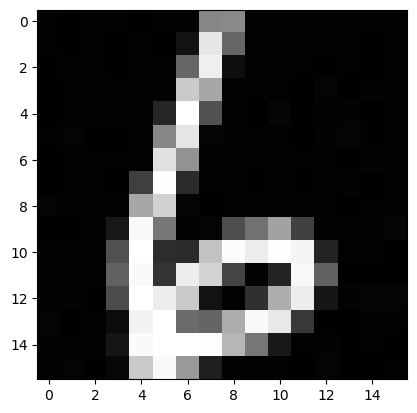

The reconstruction of digit 6 adding  218  principal components


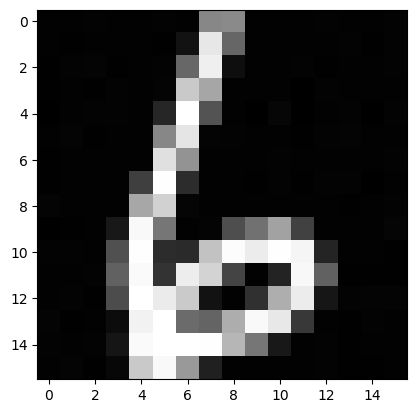

The reconstruction of digit 6 adding  219  principal components


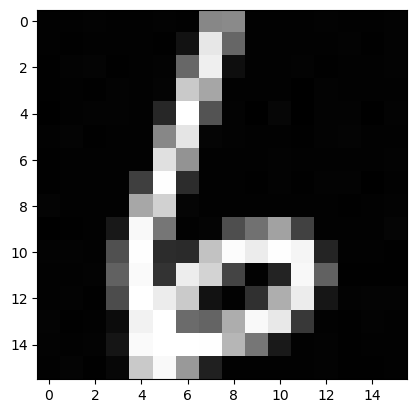

The reconstruction of digit 6 adding  220  principal components


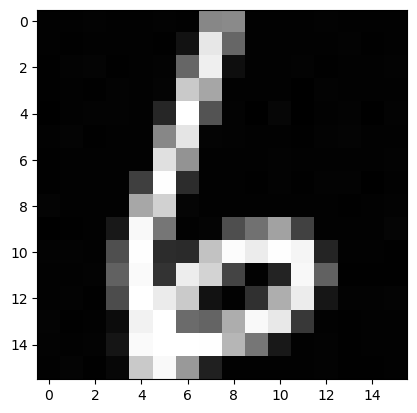

The reconstruction of digit 6 adding  221  principal components


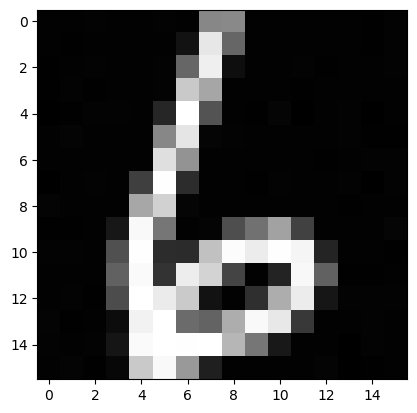

The reconstruction of digit 6 adding  222  principal components


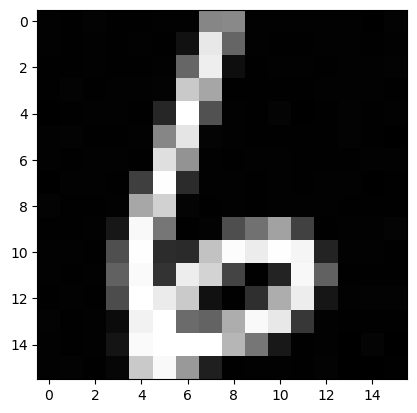

The reconstruction of digit 6 adding  223  principal components


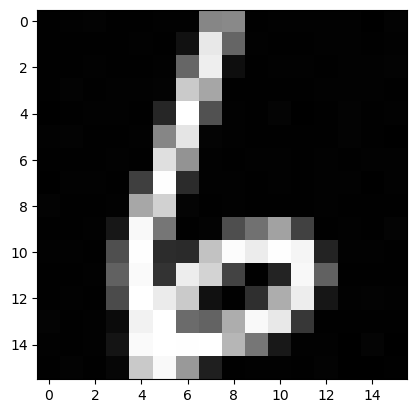

The reconstruction of digit 6 adding  224  principal components


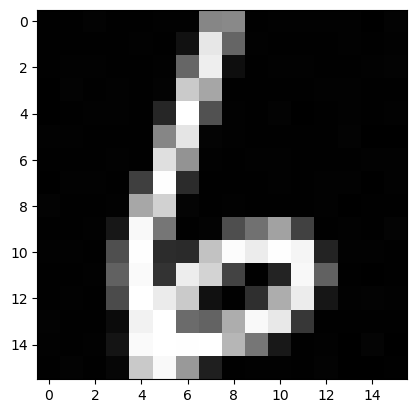

The reconstruction of digit 6 adding  225  principal components


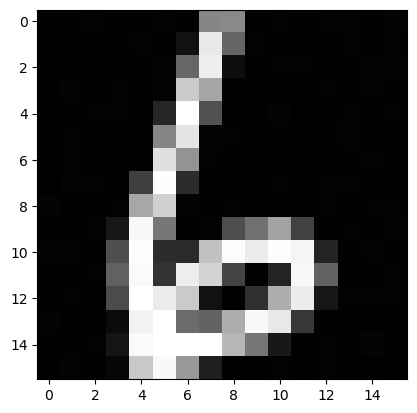

The reconstruction of digit 6 adding  226  principal components


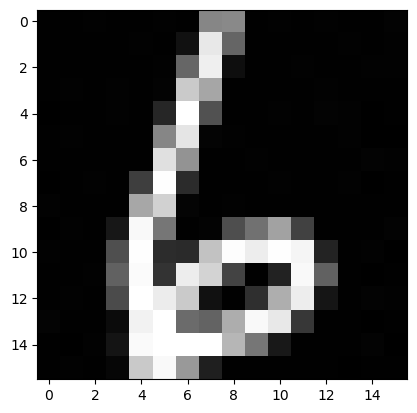

The reconstruction of digit 6 adding  227  principal components


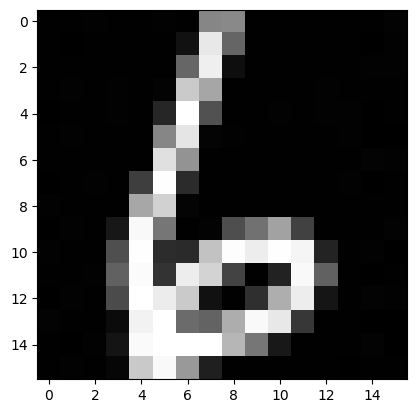

The reconstruction of digit 6 adding  228  principal components


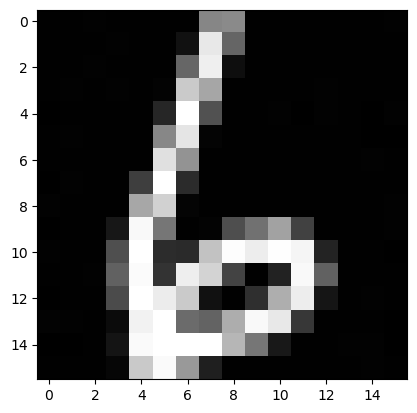

The reconstruction of digit 6 adding  229  principal components


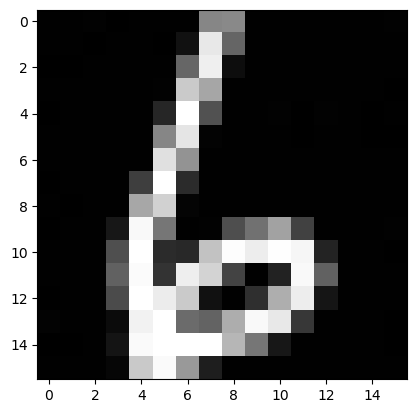

The reconstruction of digit 6 adding  230  principal components


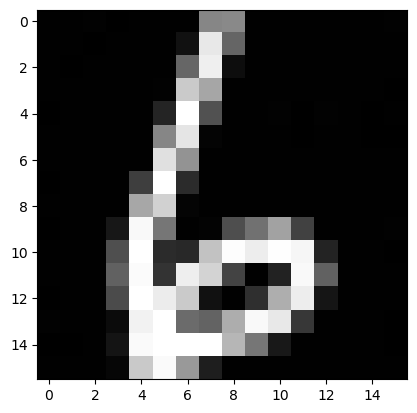

The reconstruction of digit 6 adding  231  principal components


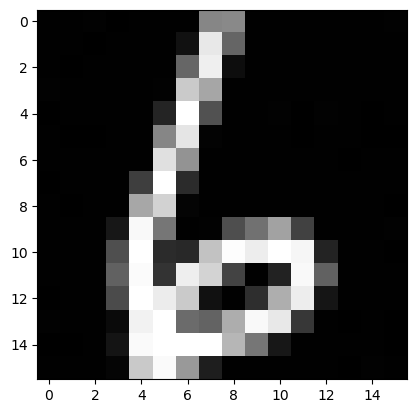

The reconstruction of digit 6 adding  232  principal components


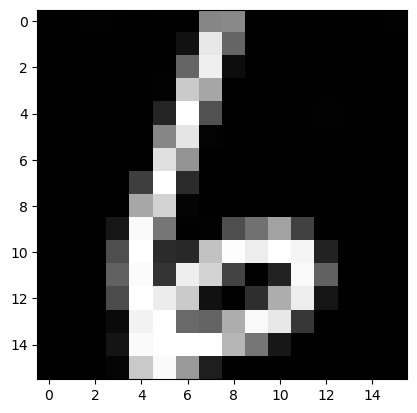

The reconstruction of digit 6 adding  233  principal components


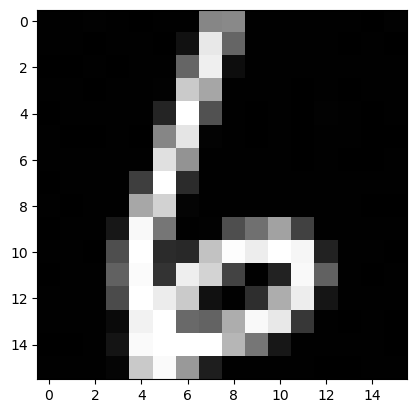

The reconstruction of digit 6 adding  234  principal components


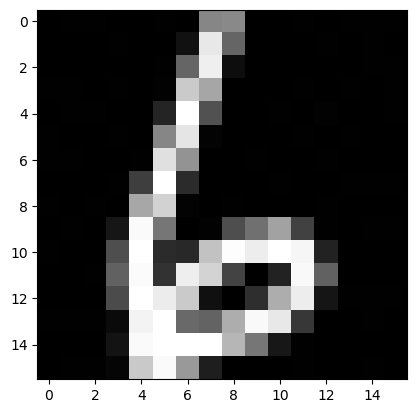

The reconstruction of digit 6 adding  235  principal components


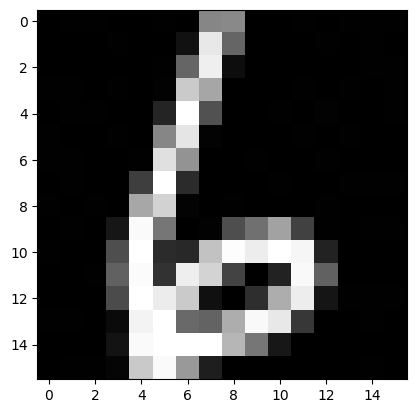

The reconstruction of digit 6 adding  236  principal components


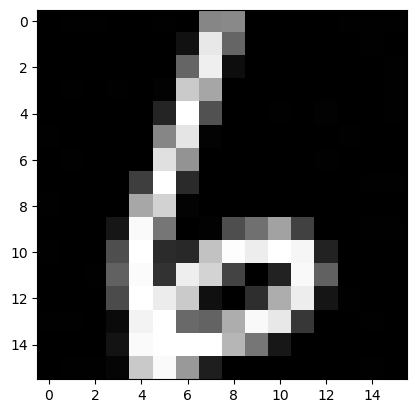

The reconstruction of digit 6 adding  237  principal components


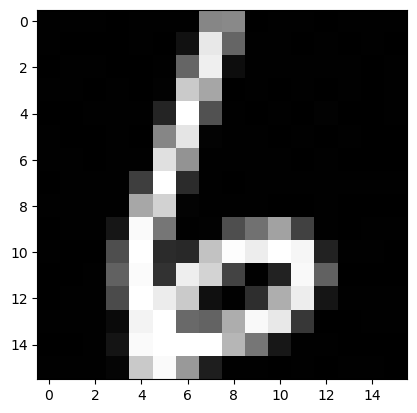

The reconstruction of digit 6 adding  238  principal components


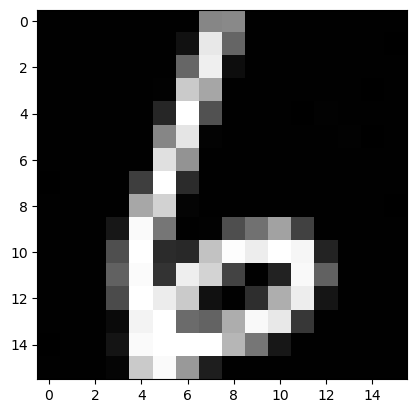

The reconstruction of digit 6 adding  239  principal components


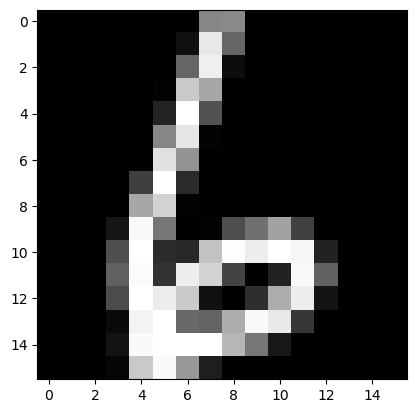

The reconstruction of digit 6 adding  240  principal components


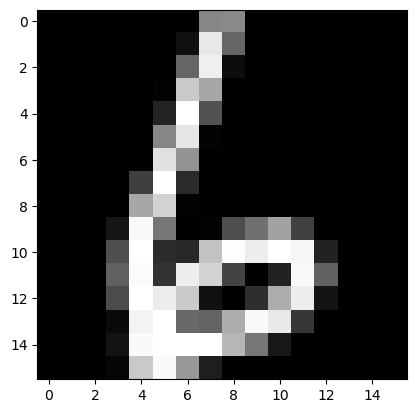

The reconstruction of digit 6 adding  241  principal components


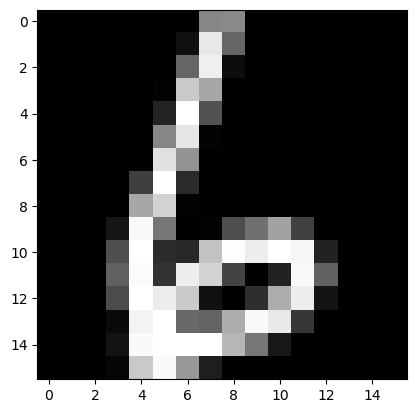

The reconstruction of digit 6 adding  242  principal components


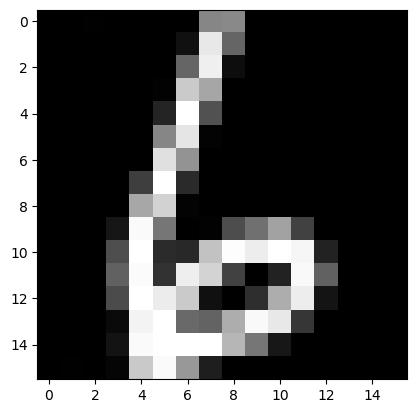

The reconstruction of digit 6 adding  243  principal components


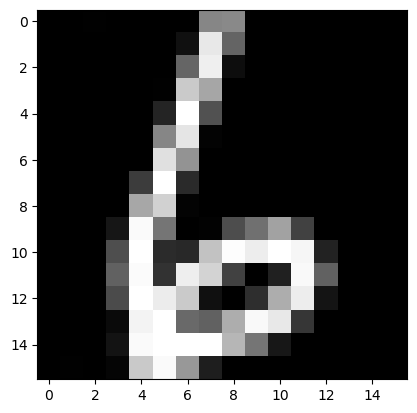

The reconstruction of digit 6 adding  244  principal components


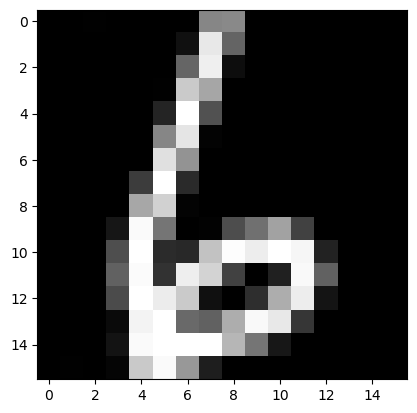

The reconstruction of digit 6 adding  245  principal components


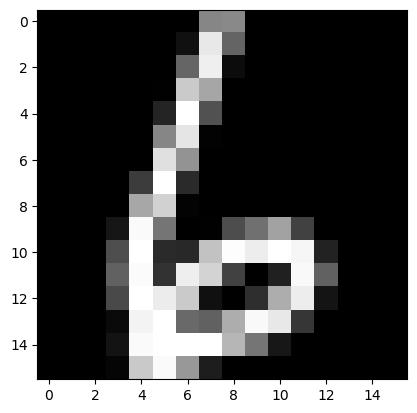

The reconstruction of digit 6 adding  246  principal components


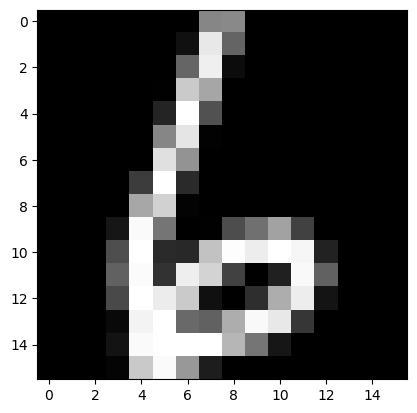

The reconstruction of digit 6 adding  247  principal components


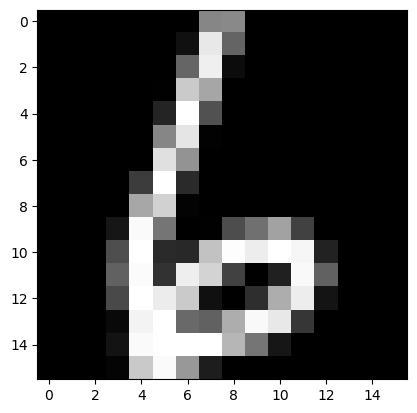

The reconstruction of digit 6 adding  248  principal components


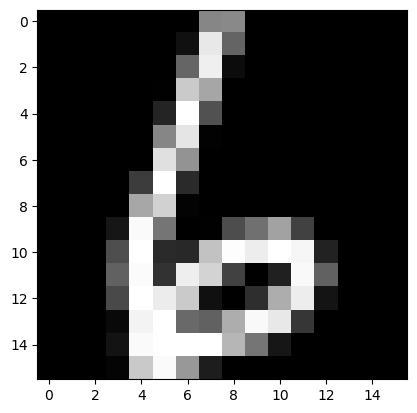

The reconstruction of digit 6 adding  249  principal components


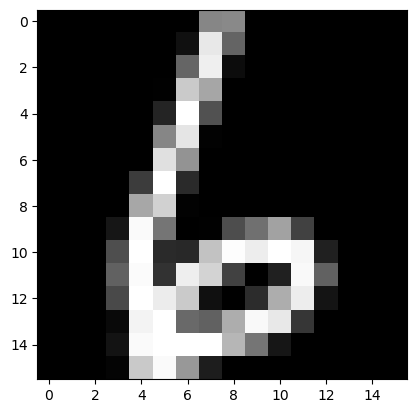

The reconstruction of digit 6 adding  250  principal components


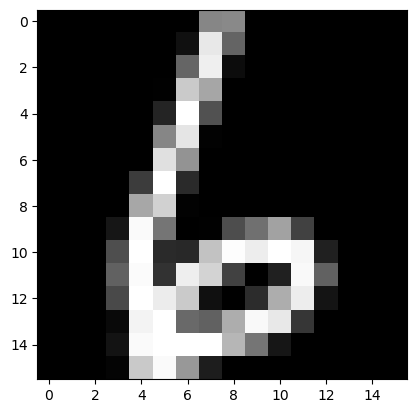

The reconstruction of digit 6 adding  251  principal components


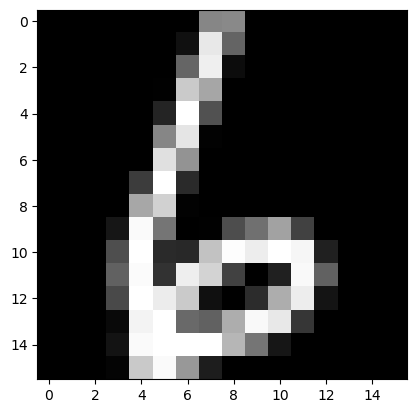

The reconstruction of digit 6 adding  252  principal components


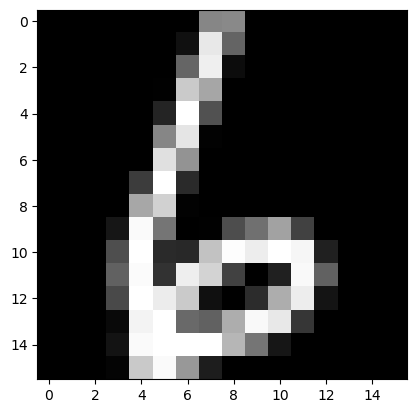

The reconstruction of digit 6 adding  253  principal components


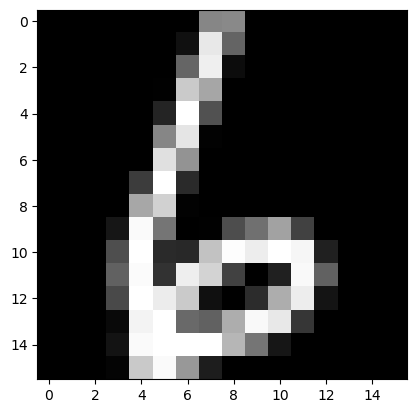

The reconstruction of digit 6 adding  254  principal components


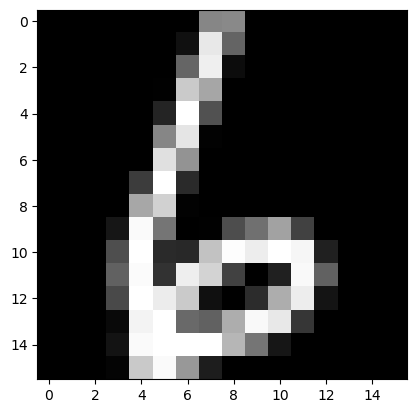

The reconstruction of digit 6 adding  255  principal components


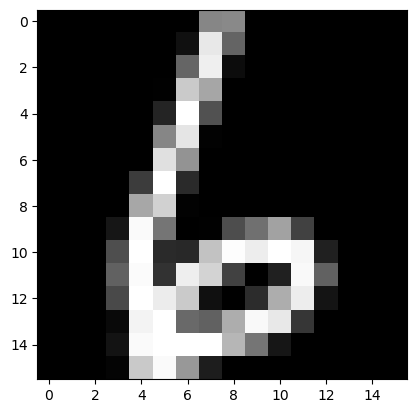

The reconstruction of digit 6 adding  256  principal components


In [16]:
n=200   # choice of image no 200 (because it is between 145 and 345)
kmax= 255  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax+1):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
    plt.imshow(I_moy + update,cmap='gray')
    plt.show()
    print("The reconstruction of digit 6 adding ", k+1," principal components")

#### 4.2. How many components are necessary to obtain a reconstruction considered as acceptable?

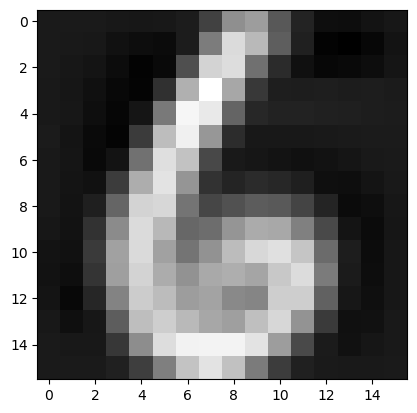

The reconstruction of digit 6 adding  1  principal components


'\nAdding 1 principal components is already giving  an acceptable of the digit 6.\n'

In [17]:
n=200   # choice of image no 200
kmax= 1  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 6 adding ", k+1," principal components")
    
"""
Adding 1 principal components is already giving  an acceptable of the digit 6.
"""

#### 4.3. How many components are necessary to obtain a reconstruction considered as nice?

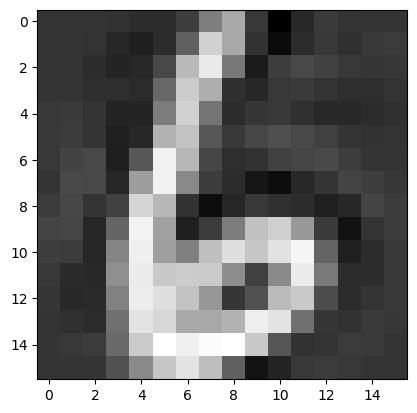

The reconstruction of digit 6 adding  25  principal components


'\nAdding 25 principal components is already giving  a nice reconstruction of the digit 6.\n'

In [18]:
n=200   # choice of image no 200
kmax= 25  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 6 adding ", k+1," principal components")
    
"""
Adding 25 principal components is already giving  a nice reconstruction of the digit 6.
"""

#### 4.4. How many components are necessary to obtain a reconstruction considered as very nice?

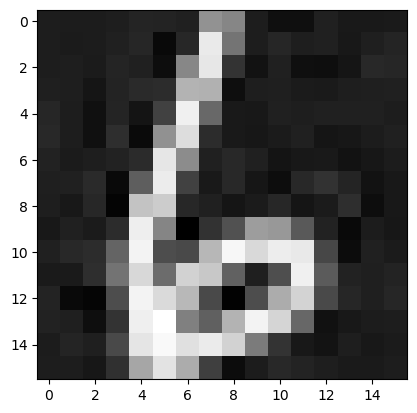

The reconstruction of digit 6 adding  80  principal components


'\nAdding 80 principal components is already giving  a nice reconstruction of the digit 6.\n'

In [19]:
n=200   # choice of image no n=200 or any other
kmax= 80  # Number of principal components to add successively
update = np.zeros([16,16])

for k in range(0,kmax):
    update = update + proj[n,k]*np.reshape(comp[k,:],(16,16)) # adding the PCA components
plt.imshow(I_moy + update,cmap='gray')
plt.show()
print("The reconstruction of digit 6 adding ", k+1," principal components")
    
"""
Adding 80 principal components is already giving  a nice reconstruction of the digit 6.
"""

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


#### 1. Display the cloud of points associated to digits 5 and 6 by using 2 different colors.

In [30]:
import matplotlib.pyplot as plt

# Separate the x and y coordinates
x_coords_5 = proj[0:145,0]
y_coords_5 = proj[0:145,1]

x_coords_6 = proj[145:345,0]
y_coords_6 = proj[145:345,1]

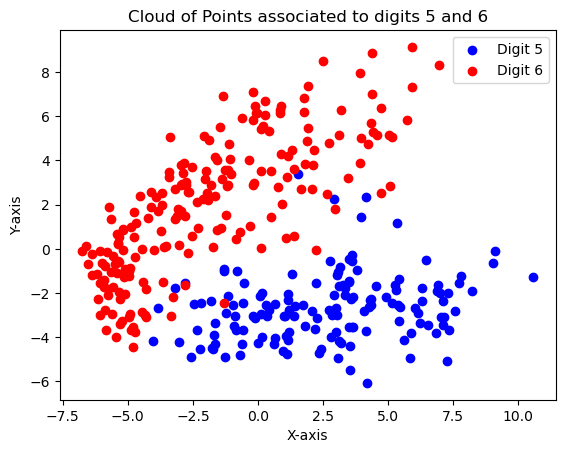

In [31]:
# Plot points with two different colors
plt.scatter(x_coords_5, y_coords_5, color='blue', label='Digit 5')
plt.scatter(x_coords_6, y_coords_6, color='red', label='Digit 6')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cloud of Points associated to digits 5 and 6')
plt.legend()
plt.show()

#### 2. Comment on the repartition of points in the plane.

In [22]:
"""
By selecting to plot only the 2 first components of PCA, we could visualize the diffirence of vaiances between the
5 and 6 digits.
The two clouds of points of digits 5 and 6 are therefore linearly separable from this scatter plot.
"""

'\nIt is noticeable that clouds of points for both digits 5 and 6 are centered around the point (0,0) of coordinantes.\nAnd the two clouds of points are not linearly separable.\n'

#### 3.1. Do you see how this PCA step makes possible the use of a much simpler classification?

In [ ]:
"""
YES. PCA step makes possible the use of much simpler classification since it gathers the most variations of the data in the
first components of the projection.
"""

#### 3.1. What would you propose as an alternative to logistic regression of TP3 then?

In [ ]:
"""
We can use PCA in combination with LDA.
Using only the 2 components of PCA, we can linearly separate the digits 5 from 6.

Note that LDA is more sentive to outliers than logistic regression. In practice, we will advise to use logistic regression
for this task.
"""

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    